# Comparing different datasets, T-cells

- Raw data is used in comparisons in this notebook
- focusing on T-cells 

Datasets:

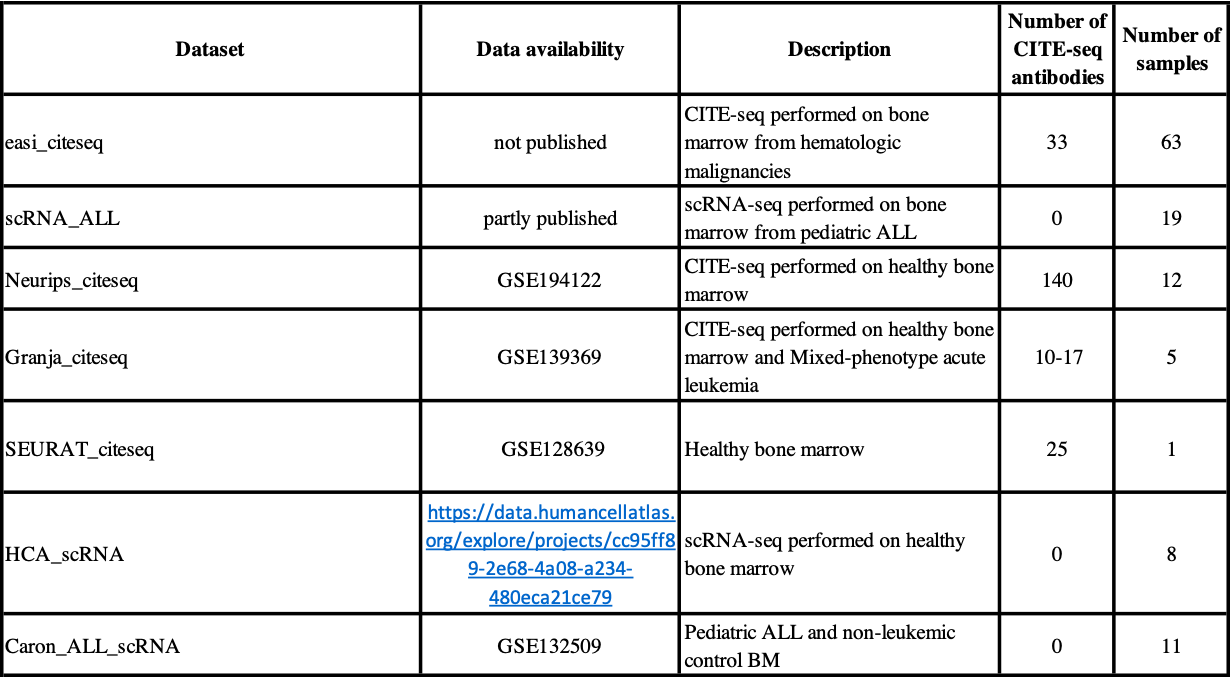

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')



Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [ ]:
#raw protein data, all datasets

adata = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/healthy_malig_!m.h5ad')


In [2]:
adata_caron=adata[adata.obs['SAMPLE_SET'].unique()

## Caron

In [3]:
adata_caron=adata[adata.obs['SAMPLE_SET'] == 'Caron' ]

adata_caron

View of AnnData object with n_obs × n_vars = 42893 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [10]:
#cell type annotations

adata_caron.obs['new_cell_type'].unique()

['B', 'T', 'DC', 'Myel', 'Prog', 'E', 'NK', 'Stromal', 'Megakaryocyte']
Categories (9, object): ['B', 'DC', 'E', 'Megakaryocyte', ..., 'NK', 'Prog', 'Stromal', 'T']

In [13]:
#Select only T-cells

caron_tcell=adata_caron[adata_caron.obs['new_cell_type'] == 'T' ]

In [14]:
caron_tcell

View of AnnData object with n_obs × n_vars = 8092 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [15]:
#selecting NK-cells

caron_nk=adata_caron[adata_caron.obs['new_cell_type'] == 'NK' ]

In [16]:
caron_nk

View of AnnData object with n_obs × n_vars = 353 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [78]:
caron_nk_prot=caron_nk.obsm['protein_expression']

In [79]:
caron_nk_prot

CD86  CD274  CD270  CD155  CD112  CD47  CD48  CD40  \
ACGCAGCAGAGAGCTC-1-1      0      0      0      0      0     0     0     0   
ACGGAGACAACTTGAC-1-1      0      0      0      0      0     0     0     0   
ACTTGTTTCGGTCTAA-1-1      0      0      0      0      0     0     0     0   
CACCACTTCTTGCAAG-1-1      0      0      0      0      0     0     0     0   
CATCGAACACGTCTCT-1-1      0      0      0      0      0     0     0     0   
...                     ...    ...    ...    ...    ...   ...   ...   ...   
TGTTCCGTCGAATGCT-1-17     0      0      0      0      0     0     0     0   
TTGGAACGTGACAAAT-1-17     0      0      0      0      0     0     0     0   
TTTACTGAGGCATTGG-1-17     0      0      0      0      0     0     0     0   
TTTATGCCACCTGGTG-1-17     0      0      0      0      0     0     0     0   
TTTATGCTCATTATCC-1-17     0      0      0      0      0     0     0     0   

                       CD154  CD52  ...  CD101  CD88  CD224  CD197  CD34  \
ACGCAGCAGAGAGCTC-1-1       0     0  ...      0     0      0      0     0   
ACGGAGACAACTTGAC-1-1       0     0  ...      0     0      0      0     0   
ACTTGTTTCGGTCTAA-1-1       0     0  ...      0     0      0      0     0   
CACCACTTCTTGCAAG-1-1       0     0  ...      0     0      0      0     0   
CATCGAACACGTCTCT-1-1       0     0  ...      0     0      0      0     0   
...                      ...   ...  ...    ...   ...    ...    ...   ...   
TGTTCCGTCGAATGCT-1-17      0     0  ...      0     0      0      0     0   
TTGGAACGTGACAAAT-1-17      0     0  ...      0     0      0      0     0   
TTTACTGAGGCATTGG-1-17      0     0  ...      0     0      0      0     0   
TTTATGCCACCTGGTG-1-17      0     0  ...      0     0      0      0     0   
TTTATGCTCATTATCC-1-17      0     0  ...      0     0      0      0     0   

                       CD10  CD90  CD15  CD117  CD66ace  
ACGCAGCAGAGAGCTC-1-1      0     0     0      0        0  
ACGGAGACAACTTGAC-1-1      0     0     0      0        0  
ACTTGTTTCGGTCTAA-1-1      0     0     0      0        0  
CACCACTTCTTGCAAG-1-1      0     0     0      0        0  
CATCGAACACGTCTCT-1-1      0     0     0      0        0  
...                     ...   ...   ...    ...      ...  
TGTTCCGTCGAATGCT-1-17     0     0     0      0        0  
TTGGAACGTGACAAAT-1-17     0     0     0      0        0  
TTTACTGAGGCATTGG-1-17     0     0     0      0        0  
TTTATGCCACCTGGTG-1-17     0     0     0      0        0  
TTTATGCTCATTATCC-1-17     0     0     0      0        0  

[353 rows x 141 columns]

In [80]:
caron_tcell_prot=caron_tcell.obsm['protein_expression']

In [82]:
caron_tcell_prot

CD86  CD274  CD270  CD155  CD112  CD47  CD48  CD40  \
AAACCTGGTGATGTCT-1-1      0      0      0      0      0     0     0     0   
AAACGGGCATCGGTTA-1-1      0      0      0      0      0     0     0     0   
AAAGATGCACATTCGA-1-1      0      0      0      0      0     0     0     0   
AAAGATGCATGTTCCC-1-1      0      0      0      0      0     0     0     0   
AAATGCCAGACCCACC-1-1      0      0      0      0      0     0     0     0   
...                     ...    ...    ...    ...    ...   ...   ...   ...   
TTTGGTTGTAAGTAGT-1-17     0      0      0      0      0     0     0     0   
TTTGTCAGTACGCTGC-1-17     0      0      0      0      0     0     0     0   
TTTGTCAGTGCTTCTC-1-17     0      0      0      0      0     0     0     0   
TTTGTCAGTGGACGAT-1-17     0      0      0      0      0     0     0     0   
TTTGTCATCTAACTGG-1-17     0      0      0      0      0     0     0     0   

                       CD154  CD52  ...  CD101  CD88  CD224  CD197  CD34  \
AAACCTGGTGATGTCT-1-1       0     0  ...      0     0      0      0     0   
AAACGGGCATCGGTTA-1-1       0     0  ...      0     0      0      0     0   
AAAGATGCACATTCGA-1-1       0     0  ...      0     0      0      0     0   
AAAGATGCATGTTCCC-1-1       0     0  ...      0     0      0      0     0   
AAATGCCAGACCCACC-1-1       0     0  ...      0     0      0      0     0   
...                      ...   ...  ...    ...   ...    ...    ...   ...   
TTTGGTTGTAAGTAGT-1-17      0     0  ...      0     0      0      0     0   
TTTGTCAGTACGCTGC-1-17      0     0  ...      0     0      0      0     0   
TTTGTCAGTGCTTCTC-1-17      0     0  ...      0     0      0      0     0   
TTTGTCAGTGGACGAT-1-17      0     0  ...      0     0      0      0     0   
TTTGTCATCTAACTGG-1-17      0     0  ...      0     0      0      0     0   

                       CD10  CD90  CD15  CD117  CD66ace  
AAACCTGGTGATGTCT-1-1      0     0     0      0        0  
AAACGGGCATCGGTTA-1-1      0     0     0      0        0  
AAAGATGCACATTCGA-1-1      0     0     0      0        0  
AAAGATGCATGTTCCC-1-1      0     0     0      0        0  
AAATGCCAGACCCACC-1-1      0     0     0      0        0  
...                     ...   ...   ...    ...      ...  
TTTGGTTGTAAGTAGT-1-17     0     0     0      0        0  
TTTGTCAGTACGCTGC-1-17     0     0     0      0        0  
TTTGTCAGTGCTTCTC-1-17     0     0     0      0        0  
TTTGTCAGTGGACGAT-1-17     0     0     0      0        0  
TTTGTCATCTAACTGG-1-17     0     0     0      0        0  

[8092 rows x 141 columns]

### Comments:

- For Caron dataset, there is no CITE-seq results

## Neurips (?)

In [66]:
#Neurips? 

adata_n=adata[adata.obs['SAMPLE_SET'] == 'N' ]

adata_n

View of AnnData object with n_obs × n_vars = 80998 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [67]:
adata_n.obs['DIAGNOSIS'] 

GTAGTACCAATCCTTT-1-s4d1    healthy
CTCAAGAGTCACAGAG-1-s4d1    healthy
CTGTGGGTCATGCGGC-1-s4d1    healthy
CGTGATAGTTATCTGG-1-s4d1    healthy
AGATCCAAGATCGGTG-1-s4d1    healthy
                            ...   
GTGGTTAGTCGAGTTT-1-s1d3    healthy
GCTACAACAGTGCGCT-1-s1d3    healthy
AACAAAGGTTGGTACT-1-s1d3    healthy
TGACAGTCATGGCTGC-1-s1d3    healthy
CTGGCAGGTCTCACGG-1-s1d3    healthy
Name: DIAGNOSIS, Length: 80998, dtype: category
Categories (1, object): ['healthy']

In [69]:
adata_n.obs['new_cell_type'].unique()

['NK', 'T', 'Prog', 'Myel', 'B', 'DC', 'E', 'Normoblast']
Categories (8, object): ['B', 'DC', 'E', 'Myel', 'NK', 'Normoblast', 'Prog', 'T']

In [70]:
#Select only T-cells

neurips_tcell=adata_n[adata_n.obs['new_cell_type'] == 'T' ]

In [71]:
neurips_tcell

View of AnnData object with n_obs × n_vars = 26775 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [87]:
neurips_tcell_prot=neurips_tcell.obsm['protein_expression']

In [88]:
neurips_tcell_prot

CD86  CD274  CD270  CD155  CD112  CD47  CD48  CD40  \
CTCAAGAGTCACAGAG-1-s4d1     2     10     47      4     18    73   146     9   
AAGCCATCATAATCCG-1-s4d1     2     16     38      5     19   171   124     9   
TAGATCGCAGCCTTCT-1-s4d1     0     14     36      5     14    48    75     9   
TGGAGGACAAGATCCT-1-s4d1     6      5     41      4     15    85    95     8   
ATCTTCATCCCTCGAT-1-s4d1     1     12     27      7     10   135   152    10   
...                       ...    ...    ...    ...    ...   ...   ...   ...   
GTGGTTAGTCGAGTTT-1-s1d3     0      1     12      0      4    70    66     3   
GCTACAACAGTGCGCT-1-s1d3     1      3     16      0      7    54    97     3   
AACAAAGGTTGGTACT-1-s1d3     1      2     22      1      3   180   205     3   
TGACAGTCATGGCTGC-1-s1d3     1      6     13      1      1    83   128     1   
CTGGCAGGTCTCACGG-1-s1d3     0      4     18      0      3   112   159     5   

                         CD154  CD52  ...  CD101  CD88  CD224  CD197  CD34  \
CTCAAGAGTCACAGAG-1-s4d1     52    23  ...     51    11     19      0     0   
AAGCCATCATAATCCG-1-s4d1     55   120  ...     21    31     80      0     0   
TAGATCGCAGCCTTCT-1-s4d1     42    17  ...     42    18     13      0     0   
TGGAGGACAAGATCCT-1-s4d1     48    28  ...     15    22     20      0     0   
ATCTTCATCCCTCGAT-1-s4d1     68    68  ...     14    19     22      0     0   
...                        ...   ...  ...    ...   ...    ...    ...   ...   
GTGGTTAGTCGAGTTT-1-s1d3      9    58  ...      7     6      6      0     0   
GCTACAACAGTGCGCT-1-s1d3     13    58  ...     32    13      7      0     0   
AACAAAGGTTGGTACT-1-s1d3     18   120  ...     28     8      4      0     0   
TGACAGTCATGGCTGC-1-s1d3     11    44  ...     21     9     15      0     0   
CTGGCAGGTCTCACGG-1-s1d3     14    87  ...     16     6      4      0     0   

                         CD10  CD90  CD15  CD117  CD66ace  
CTCAAGAGTCACAGAG-1-s4d1     0     0     0      0        0  
AAGCCATCATAATCCG-1-s4d1     0     0     0      0        0  
TAGATCGCAGCCTTCT-1-s4d1     0     0     0      0        0  
TGGAGGACAAGATCCT-1-s4d1     0     0     0      0        0  
ATCTTCATCCCTCGAT-1-s4d1     0     0     0      0        0  
...                       ...   ...   ...    ...      ...  
GTGGTTAGTCGAGTTT-1-s1d3     0     0     0      0        0  
GCTACAACAGTGCGCT-1-s1d3     0     0     0      0        0  
AACAAAGGTTGGTACT-1-s1d3     0     0     0      0        0  
TGACAGTCATGGCTGC-1-s1d3     0     0     0      0        0  
CTGGCAGGTCTCACGG-1-s1d3     0     0     0      0        0  

[26775 rows x 141 columns]

In [89]:
#To exclude columns that contain only zeros

neurips_tcell_prot = pd.DataFrame(neurips_tcell_prot)
neurips_tcell_prot != 0
(neurips_tcell_prot != 0).any(axis=0)
neurips_tcell_prot.loc[:, (neurips_tcell_prot != 0).any(axis=0)]
neurips_tcell_prot = neurips_tcell_prot.loc[:, (neurips_tcell_prot != 0).any(axis=0)]

for col in neurips_tcell_prot:
    print(col)

CD86
CD274
CD270
CD155
CD112
CD47
CD48
CD40
CD154
CD52
CD3
CD8
CD56
CD19
CD33
CD11c
HLA-A-B-C
CD45RA
CD123
CD7
CD105
CD49f
CD194
CD4
CD44
CD14
CD16
CD25
CD45RO
CD279
TIGIT
CD20
CD335
CD31
Podoplanin
CD146
IgM
CD5
CD195
CD32
CD196
CD185
CD103
CD69
CD62L
CD161
CD152
CD223
KLRG1
CD27
CD107a
CD95
CD134
HLA-DR
CD1c
CD11b
CD64
CD141
CD1d
CD314
CD35
CD57
CD272
CD278
CD58
CD39
CX3CR1
CD24
CD21
CD11a
CD79b
CD244
CD169
integrinB7
CD268
CD42b
CD54
CD62P
CD119
TCR
CD192
CD122
FceRIa
CD41
CD137
CD163
CD83
CD124
CD13
CD2
CD226
CD29
CD303
CD49b
CD81
IgD
CD18
CD28
CD38
CD127
CD45
CD22
CD71
CD26
CD115
CD63
CD304
CD36
CD172a
CD72
CD158
CD93
CD49a
CD49d
CD73
CD9
TCRVa7.2
TCRVd2
LOX-1
CD158b
CD158e1
CD142
CD319
CD352
CD94
CD162
CD85j
CD23
CD328
HLA-E
CD82
CD101
CD88
CD224


In [72]:
#Select only NK-cells

neurips_nk=adata_n[adata_n.obs['new_cell_type'] == 'NK' ]

In [73]:
neurips_nk

View of AnnData object with n_obs × n_vars = 7388 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [90]:
neurips_nk_prot=neurips_nk.obsm['protein_expression']

In [92]:
neurips_nk_prot

CD86  CD274  CD270  CD155  CD112  CD47  CD48  CD40  \
GTAGTACCAATCCTTT-1-s4d1     2     17     38      4     16   181   125     6   
CTGTGGGTCATGCGGC-1-s4d1     1     11     24      3     14   106    53    10   
GCAACATTCGCAAGAG-1-s4d1     1     12     26      0     20    53    75     4   
TCACGGGTCGCACGAC-1-s4d1     0      7     41      3     22   160   118    11   
CGCCAGAAGACCATTC-1-s4d1     2     13     34      1     19   123    83    12   
...                       ...    ...    ...    ...    ...   ...   ...   ...   
ATCATTCGTCCAATCA-1-s1d3     0      4     23      5      5   185   117     5   
ACATTTCCAGCAGTGA-1-s1d3     0      5     15      0      2    58    34     1   
TGAGACTTCCTTCAGC-1-s1d3     0      5     12      1      2    72    60     5   
GAGATGGTCCGCCTAT-1-s1d3     0      8     19      2      5   138   275     8   
ACCTGTCTCACAGTGT-1-s1d3     2      1     15      0      2    66    37     3   

                         CD154  CD52  ...  CD101  CD88  CD224  CD197  CD34  \
GTAGTACCAATCCTTT-1-s4d1     50    12  ...     15    29     14      0     0   
CTGTGGGTCATGCGGC-1-s4d1     37    21  ...     14    16     20      0     0   
GCAACATTCGCAAGAG-1-s4d1     40    23  ...      4    25      9      0     0   
TCACGGGTCGCACGAC-1-s4d1     70    15  ...      8    22     16      0     0   
CGCCAGAAGACCATTC-1-s4d1     59    16  ...     10    30     10      0     0   
...                        ...   ...  ...    ...   ...    ...    ...   ...   
ATCATTCGTCCAATCA-1-s1d3     10     4  ...      7    12      4      0     0   
ACATTTCCAGCAGTGA-1-s1d3      5    11  ...      7     7      2      0     0   
TGAGACTTCCTTCAGC-1-s1d3     12     6  ...      5     5      0      0     0   
GAGATGGTCCGCCTAT-1-s1d3     14     6  ...      8     7      5      0     0   
ACCTGTCTCACAGTGT-1-s1d3      8    14  ...      5     5     11      0     0   

                         CD10  CD90  CD15  CD117  CD66ace  
GTAGTACCAATCCTTT-1-s4d1     0     0     0      0        0  
CTGTGGGTCATGCGGC-1-s4d1     0     0     0      0        0  
GCAACATTCGCAAGAG-1-s4d1     0     0     0      0        0  
TCACGGGTCGCACGAC-1-s4d1     0     0     0      0        0  
CGCCAGAAGACCATTC-1-s4d1     0     0     0      0        0  
...                       ...   ...   ...    ...      ...  
ATCATTCGTCCAATCA-1-s1d3     0     0     0      0        0  
ACATTTCCAGCAGTGA-1-s1d3     0     0     0      0        0  
TGAGACTTCCTTCAGC-1-s1d3     0     0     0      0        0  
GAGATGGTCCGCCTAT-1-s1d3     0     0     0      0        0  
ACCTGTCTCACAGTGT-1-s1d3     0     0     0      0        0  

[7388 rows x 141 columns]

In [93]:
#To exclude columns that contain only zeros

neurips_nk_prot = pd.DataFrame(neurips_nk_prot)
neurips_nk_prot != 0
(neurips_nk_prot != 0).any(axis=0)
neurips_nk_prot.loc[:, (neurips_nk_prot != 0).any(axis=0)]
neurips_nk_prot = neurips_nk_prot.loc[:, (neurips_nk_prot != 0).any(axis=0)]

for col in neurips_nk_prot:
    print(col)

CD86
CD274
CD270
CD155
CD112
CD47
CD48
CD40
CD154
CD52
CD3
CD8
CD56
CD19
CD33
CD11c
HLA-A-B-C
CD45RA
CD123
CD7
CD105
CD49f
CD194
CD4
CD44
CD14
CD16
CD25
CD45RO
CD279
TIGIT
CD20
CD335
CD31
Podoplanin
CD146
IgM
CD5
CD195
CD32
CD196
CD185
CD103
CD69
CD62L
CD161
CD152
CD223
KLRG1
CD27
CD107a
CD95
CD134
HLA-DR
CD1c
CD11b
CD64
CD141
CD1d
CD314
CD35
CD57
CD272
CD278
CD58
CD39
CX3CR1
CD24
CD21
CD11a
CD79b
CD244
CD169
integrinB7
CD268
CD42b
CD54
CD62P
CD119
TCR
CD192
CD122
FceRIa
CD41
CD137
CD163
CD83
CD124
CD13
CD2
CD226
CD29
CD303
CD49b
CD81
IgD
CD18
CD28
CD38
CD127
CD45
CD22
CD71
CD26
CD115
CD63
CD304
CD36
CD172a
CD72
CD158
CD93
CD49a
CD49d
CD73
CD9
TCRVa7.2
TCRVd2
LOX-1
CD158b
CD158e1
CD142
CD319
CD352
CD94
CD162
CD85j
CD23
CD328
HLA-E
CD82
CD101
CD88
CD224


## "A"

### Comments: 

- No CITE-seq results available

In [18]:
#

adata_a=adata[adata.obs['SAMPLE_SET'] == 'A' ]

adata_a

View of AnnData object with n_obs × n_vars = 18386 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [19]:
adata_a.obs['DIAGNOSIS'] 

AAACCTGAGCACCGTC-1-110    B-ALL
AAACCTGAGGCCCTCA-1-110    B-ALL
AAACCTGAGTGCAAGC-1-110    B-ALL
AAACCTGCACAACTGT-1-110    B-ALL
AAACCTGGTATATCCG-1-110    B-ALL
                          ...  
TTTACTGTCGGAAACG-1-134    B-ALL
TTTATGCAGAGGTTAT-1-134    B-ALL
TTTGCGCCAGTTCCCT-1-134    B-ALL
TTTGTCAGTTCGGCAC-1-134    B-ALL
TTTGTCATCGTAGGAG-1-134    B-ALL
Name: DIAGNOSIS, Length: 18386, dtype: category
Categories (1, object): ['B-ALL']

In [27]:
adata_a.obs['cell_type'].unique()

['NKT', 'non-leukemic?', 'non-leukemic', 'doublets?', 'leukemic', 'leukemic?']
Categories (6, object): ['NKT', 'doublets?', 'leukemic', 'leukemic?', 'non-leukemic', 'non-leukemic?']

In [25]:
#Select only NK-cells

a_nk=adata_a[adata_a.obs['new_cell_type'] == 'NK' ]

In [26]:
a_nk

View of AnnData object with n_obs × n_vars = 8601 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [28]:
#Select T-cells
#No annotations for only T-cells, here selected NK + T cells using "cell_type" annotations

a_nkt=adata_a[adata_a.obs['cell_type'] == 'NKT' ]

In [29]:
#Seems that same cells are selected! 

a_nkt

View of AnnData object with n_obs × n_vars = 8601 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

## Granja

In [30]:
#
adata_granja=adata[adata.obs['SAMPLE_SET'] == 'Granja' ]

adata_granja

View of AnnData object with n_obs × n_vars = 24204 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [31]:
adata_granja.obs['DIAGNOSIS'] 

BMMC_D1T1:AAACCCAAGATGCAGC-1    healthy
BMMC_D1T1:AAACCCACAAACTCGT-1    healthy
BMMC_D1T1:AAACCCACAGTGTACT-1    healthy
BMMC_D1T1:AAACCCATCGCTATTT-1    healthy
BMMC_D1T1:AAACGAACACCCAATA-1    healthy
                                 ...   
MPAL5_T1:TTTGTCAAGCGTGAGT-1        MPAL
MPAL5_T1:TTTGTCACACGTCAGC-1        MPAL
MPAL5_T1:TTTGTCACATCGTCGG-1        MPAL
MPAL5_T1:TTTGTCACATTTCACT-1        MPAL
MPAL5_T1:TTTGTCATCGTAGGAG-1        MPAL
Name: DIAGNOSIS, Length: 24204, dtype: category
Categories (2, object): ['MPAL', 'healthy']

In [33]:
adata_granja.obs['new_cell_type'].unique()

['T', 'Myel', 'B', 'DC', 'NK', 'E', 'Prog', 'Stromal', 'Megakaryocyte', NaN]
Categories (9, object): ['B', 'DC', 'E', 'Megakaryocyte', ..., 'NK', 'Prog', 'Stromal', 'T']

In [39]:
#Select T-cells
granja_tcell=adata_granja[adata_granja.obs['new_cell_type'] == 'T' ]

In [40]:
granja_tcell

View of AnnData object with n_obs × n_vars = 4489 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [94]:
granja_tcell_prot=granja_tcell.obsm['protein_expression']

granja_tcell_prot

CD86  CD274  CD270  CD155  CD112  CD47  CD48  \
BMMC_D1T1:AAACCCAAGATGCAGC-1     0      0      0      0      0     0     0   
BMMC_D1T1:AAACGAACAGCAGTCC-1     0      0      0      0      0     0     0   
BMMC_D1T1:AAACGAACATGACGAG-1     0      0      0      0      0     0     0   
BMMC_D1T1:AAACGAATCAAGCCAT-1     0      0      0      0      0     0     0   
BMMC_D1T1:AAACGCTAGCCGTAAG-1     0      0      0      0      0     0     0   
...                            ...    ...    ...    ...    ...   ...   ...   
BMMC_D1T2:TTTGGTTGTCTTCATT-1     0      0      0      0      0     0     0   
BMMC_D1T2:TTTGGTTTCACGATCA-1     0      0      0      0      0     0     0   
BMMC_D1T2:TTTGGTTTCCACATAG-1     0      0      0      0      0     0     0   
BMMC_D1T2:TTTGTTGCAGTGGTGA-1     0      0      0      0      0     0     0   
BMMC_D1T2:TTTGTTGCATGTGTCA-1     0      0      0      0      0     0     0   

                              CD40  CD154  CD52  ...  CD101  CD88  CD224  \
BMMC_D1T1:AAACCCAAGATGCAGC-1     0      0     0  ...      0     0      0   
BMMC_D1T1:AAACGAACAGCAGTCC-1     0      0     0  ...      0     0      0   
BMMC_D1T1:AAACGAACATGACGAG-1     0      0     0  ...      0     0      0   
BMMC_D1T1:AAACGAATCAAGCCAT-1     0      0     0  ...      0     0      0   
BMMC_D1T1:AAACGCTAGCCGTAAG-1     0      0     0  ...      0     0      0   
...                            ...    ...   ...  ...    ...   ...    ...   
BMMC_D1T2:TTTGGTTGTCTTCATT-1     0      0     0  ...      0     0      0   
BMMC_D1T2:TTTGGTTTCACGATCA-1     0      0     0  ...      0     0      0   
BMMC_D1T2:TTTGGTTTCCACATAG-1     0      0     0  ...      0     0      0   
BMMC_D1T2:TTTGTTGCAGTGGTGA-1     0      0     0  ...      0     0      0   
BMMC_D1T2:TTTGTTGCATGTGTCA-1     0      0     0  ...      0     0      0   

                              CD197  CD34  CD10  CD90  CD15  CD117  CD66ace  
BMMC_D1T1:AAACCCAAGATGCAGC-1      0     0     0     0    34      0        0  
BMMC_D1T1:AAACGAACAGCAGTCC-1      0     0     0     0    44      0        0  
BMMC_D1T1:AAACGAACATGACGAG-1      0     0     0     0    64      0        0  
BMMC_D1T1:AAACGAATCAAGCCAT-1      0     0     0     0    45      0        0  
BMMC_D1T1:AAACGCTAGCCGTAAG-1      0     0     0     0    58      0        0  
...                             ...   ...   ...   ...   ...    ...      ...  
BMMC_D1T2:TTTGGTTGTCTTCATT-1      0     0     0     0    36      0        0  
BMMC_D1T2:TTTGGTTTCACGATCA-1      0     0     0     0    44      0        0  
BMMC_D1T2:TTTGGTTTCCACATAG-1      0     0     0     0    33      0        0  
BMMC_D1T2:TTTGTTGCAGTGGTGA-1      0     0     0     0    38      0        0  
BMMC_D1T2:TTTGTTGCATGTGTCA-1      0     0     0     0    58      0        0  

[4489 rows x 141 columns]

In [95]:
#To exclude columns that contain only zeros

granja_tcell_prot = pd.DataFrame(granja_tcell_prot)
granja_tcell_prot != 0
(granja_tcell_prot != 0).any(axis=0)
granja_tcell_prot.loc[:, (granja_tcell_prot != 0).any(axis=0)]
granja_tcell_prot = granja_tcell_prot.loc[:, (granja_tcell_prot != 0).any(axis=0)]

for col in granja_tcell_prot:
    print(col)

CD3
CD8
CD56
CD19
CD45RA
CD4
CD14
CD16
CD25
CD45RO
CD279
TIGIT
CD127
CD15


In [41]:
#Select NK-cells
granja_nk=adata_a[adata_a.obs['new_cell_type'] == 'NK' ]

In [42]:
granja_nk

View of AnnData object with n_obs × n_vars = 8601 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [96]:
granja_nk_prot=granja_nk.obsm['protein_expression']

granja_nk_prot

CD86  CD274  CD270  CD155  CD112  CD47  CD48  CD40  \
AAACCTGAGCACCGTC-1-110     0      0      0      0      0     0     0     0   
AAACCTGAGGCCCTCA-1-110     0      0      0      0      0     0     0     0   
AAACCTGGTATATCCG-1-110     0      0      0      0      0     0     0     0   
AAACCTGGTTGAGGTG-1-110     0      0      0      0      0     0     0     0   
AAACCTGTCCCTCTTT-1-110     0      0      0      0      0     0     0     0   
...                      ...    ...    ...    ...    ...   ...   ...   ...   
TTGTAGGAGGTGCTAG-1-134     0      0      0      0      0     0     0     0   
TTTACTGGTCGGATCC-1-134     0      0      0      0      0     0     0     0   
TTTACTGTCGGAAACG-1-134     0      0      0      0      0     0     0     0   
TTTATGCAGAGGTTAT-1-134     0      0      0      0      0     0     0     0   
TTTGCGCCAGTTCCCT-1-134     0      0      0      0      0     0     0     0   

                        CD154  CD52  ...  CD101  CD88  CD224  CD197  CD34  \
AAACCTGAGCACCGTC-1-110      0     0  ...      0     0      0      4     3   
AAACCTGAGGCCCTCA-1-110      0     0  ...      0     0      0      7     1   
AAACCTGGTATATCCG-1-110      0     0  ...      0     0      0      2     2   
AAACCTGGTTGAGGTG-1-110      0     0  ...      0     0      0      2     0   
AAACCTGTCCCTCTTT-1-110      0     0  ...      0     0      0      3     0   
...                       ...   ...  ...    ...   ...    ...    ...   ...   
TTGTAGGAGGTGCTAG-1-134      0     0  ...      0     0      0      2     2   
TTTACTGGTCGGATCC-1-134      0     0  ...      0     0      0      0     5   
TTTACTGTCGGAAACG-1-134      0     0  ...      0     0      0      4     6   
TTTATGCAGAGGTTAT-1-134      0     0  ...      0     0      0      2     2   
TTTGCGCCAGTTCCCT-1-134      0     0  ...      0     0      0      2    16   

                        CD10  CD90  CD15  CD117  CD66ace  
AAACCTGAGCACCGTC-1-110    33     0     4      1        3  
AAACCTGAGGCCCTCA-1-110    23     0     4      6        3  
AAACCTGGTATATCCG-1-110    17     0     5      3        6  
AAACCTGGTTGAGGTG-1-110    45     0     9      7        4  
AAACCTGTCCCTCTTT-1-110    24     0    10      2        2  
...                      ...   ...   ...    ...      ...  
TTGTAGGAGGTGCTAG-1-134    34     0     2      3        0  
TTTACTGGTCGGATCC-1-134    28     0     1      6        2  
TTTACTGTCGGAAACG-1-134    62     0     4      4        1  
TTTATGCAGAGGTTAT-1-134    25     0     2      1        1  
TTTGCGCCAGTTCCCT-1-134    40     0     2      2        1  

[8601 rows x 141 columns]

In [97]:
#To exclude columns that contain only zeros

granja_nk_prot = pd.DataFrame(granja_nk_prot)
granja_nk_prot != 0
(granja_nk_prot != 0).any(axis=0)
granja_nk_prot.loc[:, (granja_nk_prot != 0).any(axis=0)]
granja_nk_prot = granja_nk_prot.loc[:, (granja_nk_prot != 0).any(axis=0)]

for col in granja_nk_prot:
    print(col)

CD3
CD8
CD56
CD19
CD33
CD11c
CD45RA
CD123
CD7
CD4
CD44
CD14
CD45RO
CD20
CD5
HLA-DR
CD11b
CD64
CD58
CD24
CD13
CD2
CD81
CD38
CD127
CD45
CD73
CD197
CD34
CD10
CD15
CD117
CD66ace


## Easigenomics

### Comments:

- Only NKT annotation available (NK- + T-cells)

In [43]:

adata_f=adata[adata.obs['SAMPLE_SET'] == 'F' ]

adata_f

View of AnnData object with n_obs × n_vars = 102954 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [44]:
adata_f.obs['DIAGNOSIS'] 

AAACCTGAGCCCTAAT-1-100    Aplastic anemia
AAACCTGCAAGCCGCT-1-100    Aplastic anemia
AAACCTGCACTGTCGG-1-100    Aplastic anemia
AAACCTGCAGACGCTC-1-100    Aplastic anemia
AAACCTGTCCTTAATC-1-100    Aplastic anemia
                               ...       
TTTGTCAGTACATCCA-1-158              B-ALL
TTTGTCAGTAGGCATG-1-158              B-ALL
TTTGTCAGTATGCTTG-1-158              B-ALL
TTTGTCATCAAACCAC-1-158              B-ALL
TTTGTCATCCATGAAC-1-158              B-ALL
Name: DIAGNOSIS, Length: 102954, dtype: category
Categories (10, object): ['AML', 'Aplastic anemia', 'B-ALL', 'Blastic plasmacytoid dendritic cell leukemia', ..., 'Multiple myeloma', 'Plasma cell leukemia', 'RAEB-2', 'T-ALL']

In [60]:
adata_f.obs['new_cell_type'].unique()

['NK', 'non-leukemic', 'preleukemic', 'non-leukemic?', NaN, ..., 'leukemic?', 'doublets?', 'unknown', '0', 'preleukemic?']
Length: 11
Categories (10, object): ['0', 'NK', 'doublets?', 'leukemic', ..., 'non-leukemic?', 'preleukemic', 'preleukemic?', 'unknown']

In [53]:
#Select NK-cells

easi_nk=adata_f[adata_f.obs['new_cell_type'] == 'NK' ]

In [50]:
easi_nk

View of AnnData object with n_obs × n_vars = 19137 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [54]:
#Select NK + T

easi_nkt=adata_f[adata_f.obs['cell_type'] == 'NKT' ]

In [55]:
easi_nkt

View of AnnData object with n_obs × n_vars = 19137 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [98]:
easi_nkt_prot=easi_nkt.obsm['protein_expression']

easi_nkt_prot

CD86  CD274  CD270  CD155  CD112  CD47  CD48  CD40  \
AAACCTGAGCCCTAAT-1-100     0      0      0      0      0     0     0     0   
AAACCTGCAGACGCTC-1-100     0      0      0      0      0     0     0     0   
AAACCTGTCCTTAATC-1-100     0      0      0      0      0     0     0     0   
AAACGGGGTCTCTCGT-1-100     0      0      0      0      0     0     0     0   
AAAGATGTCCAGTAGT-1-100     0      0      0      0      0     0     0     0   
...                      ...    ...    ...    ...    ...   ...   ...   ...   
TTAGGCACAGAAGCAC-1-158     0      0      0      0      0     0     0     0   
TTCTACAGTGAGCGAT-1-158     0      0      0      0      0     0     0     0   
TTGAACGAGCGGATCA-1-158     0      0      0      0      0     0     0     0   
TTGCCGTAGATCCGAG-1-158     0      0      0      0      0     0     0     0   
TTTGCGCTCTGTCTCG-1-158     0      0      0      0      0     0     0     0   

                        CD154  CD52  ...  CD101  CD88  CD224  CD197  CD34  \
AAACCTGAGCCCTAAT-1-100      0     0  ...      0     0      0     17    25   
AAACCTGCAGACGCTC-1-100      0     0  ...      0     0      0     28    34   
AAACCTGTCCTTAATC-1-100      0     0  ...      0     0      0     20    27   
AAACGGGGTCTCTCGT-1-100      0     0  ...      0     0      0     22    21   
AAAGATGTCCAGTAGT-1-100      0     0  ...      0     0      0     19    22   
...                       ...   ...  ...    ...   ...    ...    ...   ...   
TTAGGCACAGAAGCAC-1-158      0     0  ...      0     0      0      4    15   
TTCTACAGTGAGCGAT-1-158      0     0  ...      0     0      0      4    11   
TTGAACGAGCGGATCA-1-158      0     0  ...      0     0      0      5    10   
TTGCCGTAGATCCGAG-1-158      0     0  ...      0     0      0      4    23   
TTTGCGCTCTGTCTCG-1-158      0     0  ...      0     0      0      6    12   

                        CD10  CD90  CD15  CD117  CD66ace  
AAACCTGAGCCCTAAT-1-100    17     0    43     11       25  
AAACCTGCAGACGCTC-1-100    12     0    51     14       21  
AAACCTGTCCTTAATC-1-100    16     0    30     10       17  
AAACGGGGTCTCTCGT-1-100    19     0    43      7       25  
AAAGATGTCCAGTAGT-1-100     7     0    47     14       15  
...                      ...   ...   ...    ...      ...  
TTAGGCACAGAAGCAC-1-158   105     0     9      4        4  
TTCTACAGTGAGCGAT-1-158    68     0     7      1        7  
TTGAACGAGCGGATCA-1-158    40     0     6      1        9  
TTGCCGTAGATCCGAG-1-158   151     0    11      4        8  
TTTGCGCTCTGTCTCG-1-158    36     0     9      1        2  

[19137 rows x 141 columns]

In [99]:
#To exclude columns that contain only zeros

easi_nkt_prot = pd.DataFrame(easi_nkt_prot)
easi_nkt_prot != 0
(easi_nkt_prot != 0).any(axis=0)
easi_nkt_prot.loc[:, (easi_nkt_prot != 0).any(axis=0)]
easi_nkt_prot = easi_nkt_prot.loc[:, (easi_nkt_prot != 0).any(axis=0)]

for col in easi_nkt_prot:
    print(col)

CD3
CD8
CD56
CD19
CD33
CD11c
CD45RA
CD123
CD7
CD4
CD44
CD14
CD45RO
CD20
CD5
HLA-DR
CD11b
CD64
CD58
CD24
CD13
CD2
CD81
CD38
CD127
CD45
CD73
CD197
CD34
CD10
CD15
CD117
CD66ace


## Seurat (?)

In [56]:
#Seurat?

adata_s=adata[adata.obs['SAMPLE_SET'] == 'S' ]

adata_s

View of AnnData object with n_obs × n_vars = 29556 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [57]:
adata_s.obs['DIAGNOSIS'] 

a_AAACCTGAGCTTATCG-1    healthy
a_AAACCTGAGGTGGGTT-1    healthy
a_AAACCTGAGTACATGA-1    healthy
a_AAACCTGCAAACCTAC-1    healthy
a_AAACCTGCAAGGTGTG-1    healthy
                         ...   
b_TTTGTCATCCGAGCCA-1    healthy
b_TTTGTCATCCGTAGGC-1    healthy
b_TTTGTCATCCTCGCAT-1    healthy
b_TTTGTCATCGCCGTGA-1    healthy
b_TTTGTCATCGTTTGCC-1    healthy
Name: DIAGNOSIS, Length: 29556, dtype: category
Categories (1, object): ['healthy']

In [59]:
adata_s.obs['new_cell_type'].unique()

['Prog', 'T', 'Myel', 'B', 'NK', 'DC']
Categories (6, object): ['B', 'DC', 'Myel', 'NK', 'Prog', 'T']

In [62]:
#Select T-cells

seurat_tcell=adata_s[adata_s.obs['new_cell_type'] == 'T' ]

In [63]:
seurat_tcell

View of AnnData object with n_obs × n_vars = 14664 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [101]:
seurat_tcell_prot=seurat_tcell.obsm['protein_expression']

seurat_tcell_prot

CD86  CD274  CD270  CD155  CD112  CD47  CD48  CD40  \
a_AAACCTGAGGTGGGTT-1     0      0      0      0      0     0     0     0   
a_AAACCTGAGTACATGA-1     0      0      0      0      0     0     0     0   
a_AAACCTGCAAACCTAC-1     0      0      0      0      0     0     0     0   
a_AAACCTGCACTTGGAT-1     0      0      0      0      0     0     0     0   
a_AAACCTGCAGGCAGTA-1     0      0      0      0      0     0     0     0   
...                    ...    ...    ...    ...    ...   ...   ...   ...   
b_TTTGTCATCATAGCAC-1     0      0      0      0      0     0     0     0   
b_TTTGTCATCCGAGCCA-1     0      0      0      0      0     0     0     0   
b_TTTGTCATCCGTAGGC-1     0      0      0      0      0     0     0     0   
b_TTTGTCATCGCCGTGA-1     0      0      0      0      0     0     0     0   
b_TTTGTCATCGTTTGCC-1     0      0      0      0      0     0     0     0   

                      CD154  CD52  ...  CD101  CD88  CD224  CD197  CD34  CD10  \
a_AAACCTGAGGTGGGTT-1      0     0  ...      0     0      0      2     4     0   
a_AAACCTGAGTACATGA-1      0     0  ...      0     0      0      4     4     0   
a_AAACCTGCAAACCTAC-1      0     0  ...      0     0      0     12     7     0   
a_AAACCTGCACTTGGAT-1      0     0  ...      0     0      0     17     1     0   
a_AAACCTGCAGGCAGTA-1      0     0  ...      0     0      0     10     6     0   
...                     ...   ...  ...    ...   ...    ...    ...   ...   ...   
b_TTTGTCATCATAGCAC-1      0     0  ...      0     0      0     17    11     0   
b_TTTGTCATCCGAGCCA-1      0     0  ...      0     0      0     12    11     0   
b_TTTGTCATCCGTAGGC-1      0     0  ...      0     0      0     24    12     0   
b_TTTGTCATCGCCGTGA-1      0     0  ...      0     0      0     40    30     0   
b_TTTGTCATCGTTTGCC-1      0     0  ...      0     0      0     11     6     0   

                      CD90  CD15  CD117  CD66ace  
a_AAACCTGAGGTGGGTT-1     0     0      0        0  
a_AAACCTGAGTACATGA-1     0     0      0        0  
a_AAACCTGCAAACCTAC-1     0     0      0        0  
a_AAACCTGCACTTGGAT-1     0     0      0        0  
a_AAACCTGCAGGCAGTA-1     0     0      0        0  
...                    ...   ...    ...      ...  
b_TTTGTCATCATAGCAC-1     0     0      0        0  
b_TTTGTCATCCGAGCCA-1     0     0      0        0  
b_TTTGTCATCCGTAGGC-1     0     0      0        0  
b_TTTGTCATCGCCGTGA-1     0     0      0        0  
b_TTTGTCATCGTTTGCC-1     0     0      0        0  

[14664 rows x 141 columns]

In [102]:
#To exclude columns that contain only zeros

seurat_tcell_prot = pd.DataFrame(seurat_tcell_prot)
seurat_tcell_prot != 0
(seurat_tcell_prot != 0).any(axis=0)
seurat_tcell_prot.loc[:, (seurat_tcell_prot != 0).any(axis=0)]
seurat_tcell_prot = seurat_tcell_prot.loc[:, (seurat_tcell_prot != 0).any(axis=0)]

for col in seurat_tcell_prot:
    print(col)

CD3
CD8
CD56
CD19
CD11c
CD45RA
CD123
CD4
CD14
CD16
CD25
CD45RO
CD69
CD161
CD27
HLA-DR
CD57
CD278
CD11a
CD79b
CD28
CD38
CD127
CD197
CD34


In [64]:
#Select NK-cells

seurat_nk=adata_s[adata_s.obs['new_cell_type'] == 'NK' ]

In [100]:
seurat_nk

View of AnnData object with n_obs × n_vars = 1355 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [103]:
seurat_nk_prot=seurat_nk.obsm['protein_expression']

seurat_nk_prot

CD86  CD274  CD270  CD155  CD112  CD47  CD48  CD40  \
a_AAACCTGTCTAACGGT-1     0      0      0      0      0     0     0     0   
a_AAACGGGGTTCGGCAC-1     0      0      0      0      0     0     0     0   
a_AAAGCAAAGACCTAGG-1     0      0      0      0      0     0     0     0   
a_AAAGCAAAGCGTCAAG-1     0      0      0      0      0     0     0     0   
a_AAAGCAACAATGTTGC-1     0      0      0      0      0     0     0     0   
...                    ...    ...    ...    ...    ...   ...   ...   ...   
b_TTTATGCTCAACACAC-1     0      0      0      0      0     0     0     0   
b_TTTCCTCAGATCCCGC-1     0      0      0      0      0     0     0     0   
b_TTTCCTCAGTACATGA-1     0      0      0      0      0     0     0     0   
b_TTTGCGCGTGGTCTCG-1     0      0      0      0      0     0     0     0   
b_TTTGGTTTCGAGAGCA-1     0      0      0      0      0     0     0     0   

                      CD154  CD52  ...  CD101  CD88  CD224  CD197  CD34  CD10  \
a_AAACCTGTCTAACGGT-1      0     0  ...      0     0      0     11    11     0   
a_AAACGGGGTTCGGCAC-1      0     0  ...      0     0      0      4     0     0   
a_AAAGCAAAGACCTAGG-1      0     0  ...      0     0      0      7     9     0   
a_AAAGCAAAGCGTCAAG-1      0     0  ...      0     0      0     22    15     0   
a_AAAGCAACAATGTTGC-1      0     0  ...      0     0      0     12    11     0   
...                     ...   ...  ...    ...   ...    ...    ...   ...   ...   
b_TTTATGCTCAACACAC-1      0     0  ...      0     0      0     12     7     0   
b_TTTCCTCAGATCCCGC-1      0     0  ...      0     0      0      3    21     0   
b_TTTCCTCAGTACATGA-1      0     0  ...      0     0      0     11     5     0   
b_TTTGCGCGTGGTCTCG-1      0     0  ...      0     0      0      5     7     0   
b_TTTGGTTTCGAGAGCA-1      0     0  ...      0     0      0      6    11     0   

                      CD90  CD15  CD117  CD66ace  
a_AAACCTGTCTAACGGT-1     0     0      0        0  
a_AAACGGGGTTCGGCAC-1     0     0      0        0  
a_AAAGCAAAGACCTAGG-1     0     0      0        0  
a_AAAGCAAAGCGTCAAG-1     0     0      0        0  
a_AAAGCAACAATGTTGC-1     0     0      0        0  
...                    ...   ...    ...      ...  
b_TTTATGCTCAACACAC-1     0     0      0        0  
b_TTTCCTCAGATCCCGC-1     0     0      0        0  
b_TTTCCTCAGTACATGA-1     0     0      0        0  
b_TTTGCGCGTGGTCTCG-1     0     0      0        0  
b_TTTGGTTTCGAGAGCA-1     0     0      0        0  

[1355 rows x 141 columns]

In [104]:
#To exclude columns that contain only zeros

seurat_nk_prot = pd.DataFrame(seurat_nk_prot)
seurat_nk_prot != 0
(seurat_nk_prot != 0).any(axis=0)
seurat_nk_prot.loc[:, (seurat_nk_prot != 0).any(axis=0)]
seurat_nk_prot = seurat_nk_prot.loc[:, (seurat_nk_prot != 0).any(axis=0)]

for col in seurat_nk_prot:
    print(col)

CD3
CD8
CD56
CD19
CD11c
CD45RA
CD123
CD4
CD14
CD16
CD25
CD45RO
CD69
CD161
CD27
HLA-DR
CD57
CD278
CD11a
CD79b
CD28
CD38
CD127
CD197
CD34


## Comparisons

Comparisons of datasets that contain CITE-seq data:  
- Neurips, Granja, Easigenomics and Seurat

## T-cells

In [152]:
#sorting by mean, Neurips

index_sort = neurips_tcell_prot.mean().sort_values().index
df_sorted_neurips = neurips_tcell_prot[index_sort]

In [154]:
#sorting by mean, Granja

index_sort = granja_tcell_prot.mean().sort_values().index
df_sorted_granja = granja_tcell_prot[index_sort]

In [155]:
#sorting by mean, Easigenomics

index_sort = easi_nkt_prot.mean().sort_values().index
df_sorted_easi = easi_nkt_prot[index_sort]

In [156]:
#sorting by mean, Seurat

index_sort = seurat_tcell_prot.mean().sort_values().index
df_sorted_seurat = seurat_tcell_prot[index_sort]

In [171]:
df_sorted_neurips

CD86  CD33  CD22  CD62P  CD64  IgD  CD11c  CD1c  \
CTCAAGAGTCACAGAG-1-s4d1     2     0     5      1     2    3      1     1   
AAGCCATCATAATCCG-1-s4d1     2     4     1      4     7    1      1     6   
TAGATCGCAGCCTTCT-1-s4d1     0     0     0      1     1    2      0     2   
TGGAGGACAAGATCCT-1-s4d1     6     1     2      1     1    3      1     3   
ATCTTCATCCCTCGAT-1-s4d1     1     0     0      1     0    1      1     0   
...                       ...   ...   ...    ...   ...  ...    ...   ...   
GTGGTTAGTCGAGTTT-1-s1d3     0     1     0      1     0    2      0     1   
GCTACAACAGTGCGCT-1-s1d3     1     2     1      1     1    0      0     2   
AACAAAGGTTGGTACT-1-s1d3     1     1     2      1     0    2      0     0   
TGACAGTCATGGCTGC-1-s1d3     1     0     0      2     1    0      0     1   
CTGGCAGGTCTCACGG-1-s1d3     0     1     1      1     1    0      1     5   

                         CD21  CD268  ...  CD3  CD47  CD7  CD2  CD48  CD44  \
CTCAAGAGTCACAGAG-1-s4d1     4      3  ...  113    73    2  122   146   182   
AAGCCATCATAATCCG-1-s4d1     1      7  ...  118   171   16  136   124   189   
TAGATCGCAGCCTTCT-1-s4d1     1      1  ...   97    48   50   78    75   164   
TGGAGGACAAGATCCT-1-s4d1     4      1  ...   73    85   21   80    95   105   
ATCTTCATCCCTCGAT-1-s4d1     1      5  ...  161   135  185   51   152   160   
...                       ...    ...  ...  ...   ...  ...  ...   ...   ...   
GTGGTTAGTCGAGTTT-1-s1d3     0      2  ...  101    70   44   74    66    48   
GCTACAACAGTGCGCT-1-s1d3     3      2  ...  123    54   42  206    97   167   
AACAAAGGTTGGTACT-1-s1d3     0      5  ...  109   180  493  194   205   201   
TGACAGTCATGGCTGC-1-s1d3     1      2  ...  102    83   35  110   128   196   
CTGGCAGGTCTCACGG-1-s1d3     2      0  ...  133   112  594  200   159   177   

                         CD45RA  CD11a  CD5  CD45  
CTCAAGAGTCACAGAG-1-s4d1      92    356  151   340  
AAGCCATCATAATCCG-1-s4d1      11    272  577   271  
TAGATCGCAGCCTTCT-1-s4d1      22    333   93   284  
TGGAGGACAAGATCCT-1-s4d1      11    155  127   219  
ATCTTCATCCCTCGAT-1-s4d1      95     70  224   199  
...                         ...    ...  ...   ...  
GTGGTTAGTCGAGTTT-1-s1d3     239     39  154   161  
GCTACAACAGTGCGCT-1-s1d3     488    254  175   258  
AACAAAGGTTGGTACT-1-s1d3     640    108  402   418  
TGACAGTCATGGCTGC-1-s1d3      92    219   40   266  
CTGGCAGGTCTCACGG-1-s1d3     975    103  282   331  

[26775 rows x 134 columns]

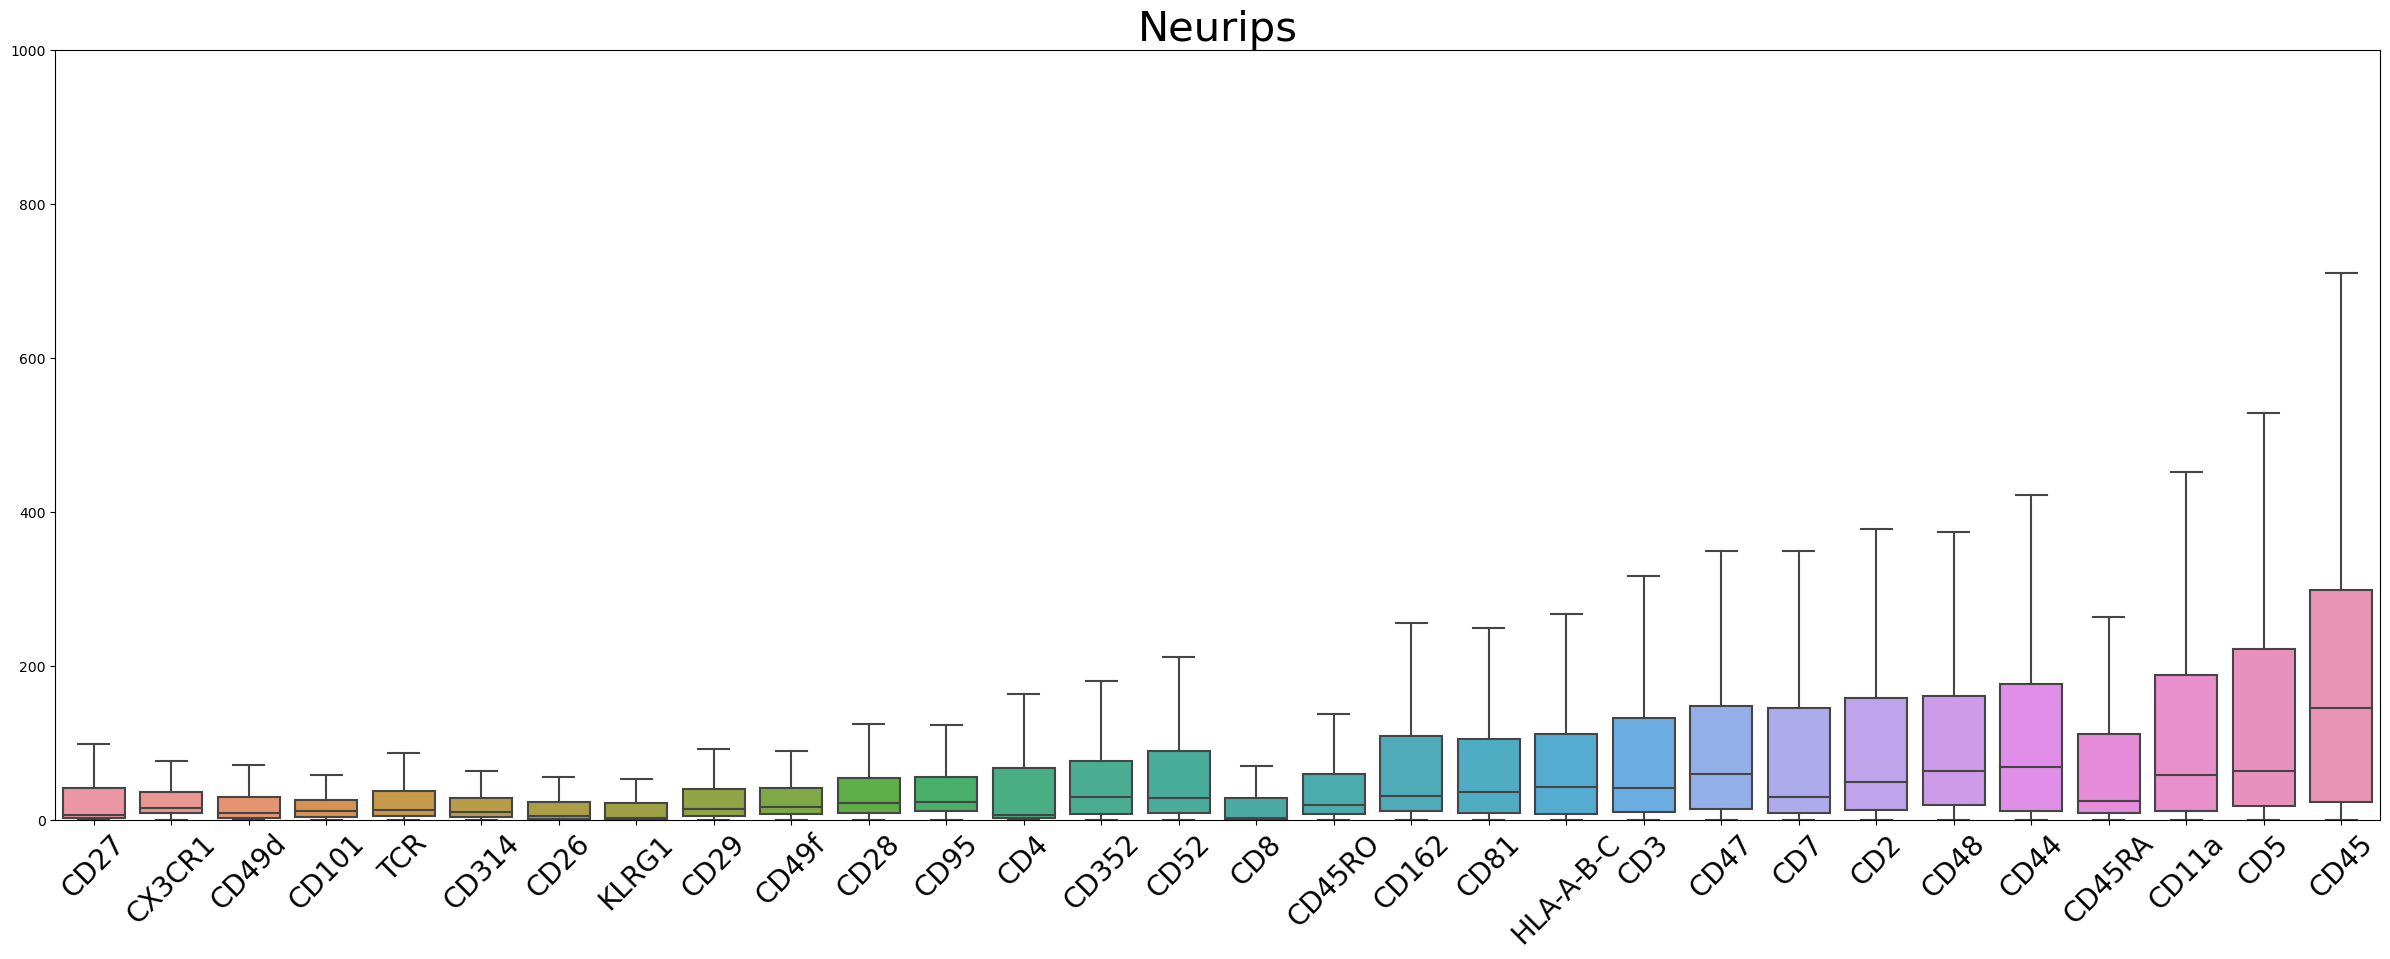

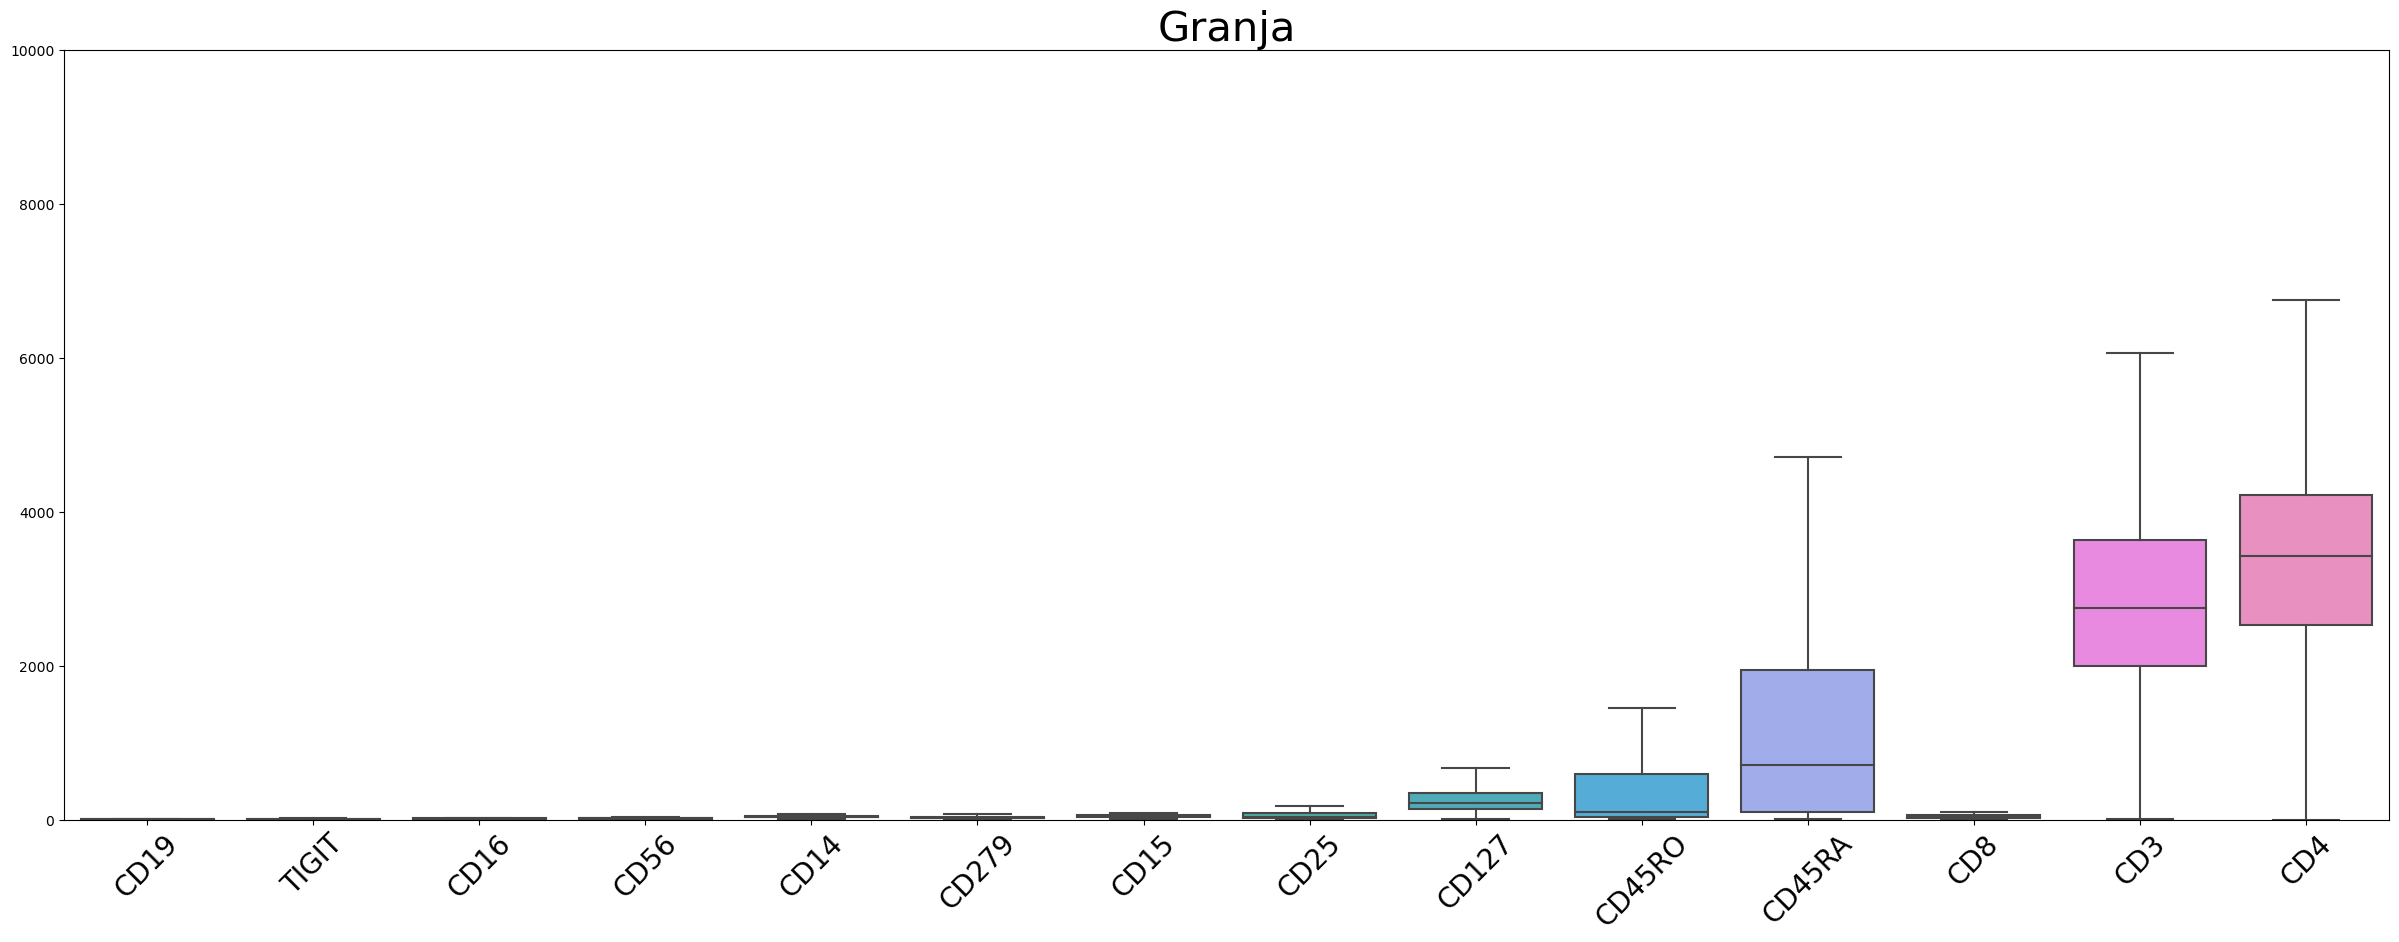

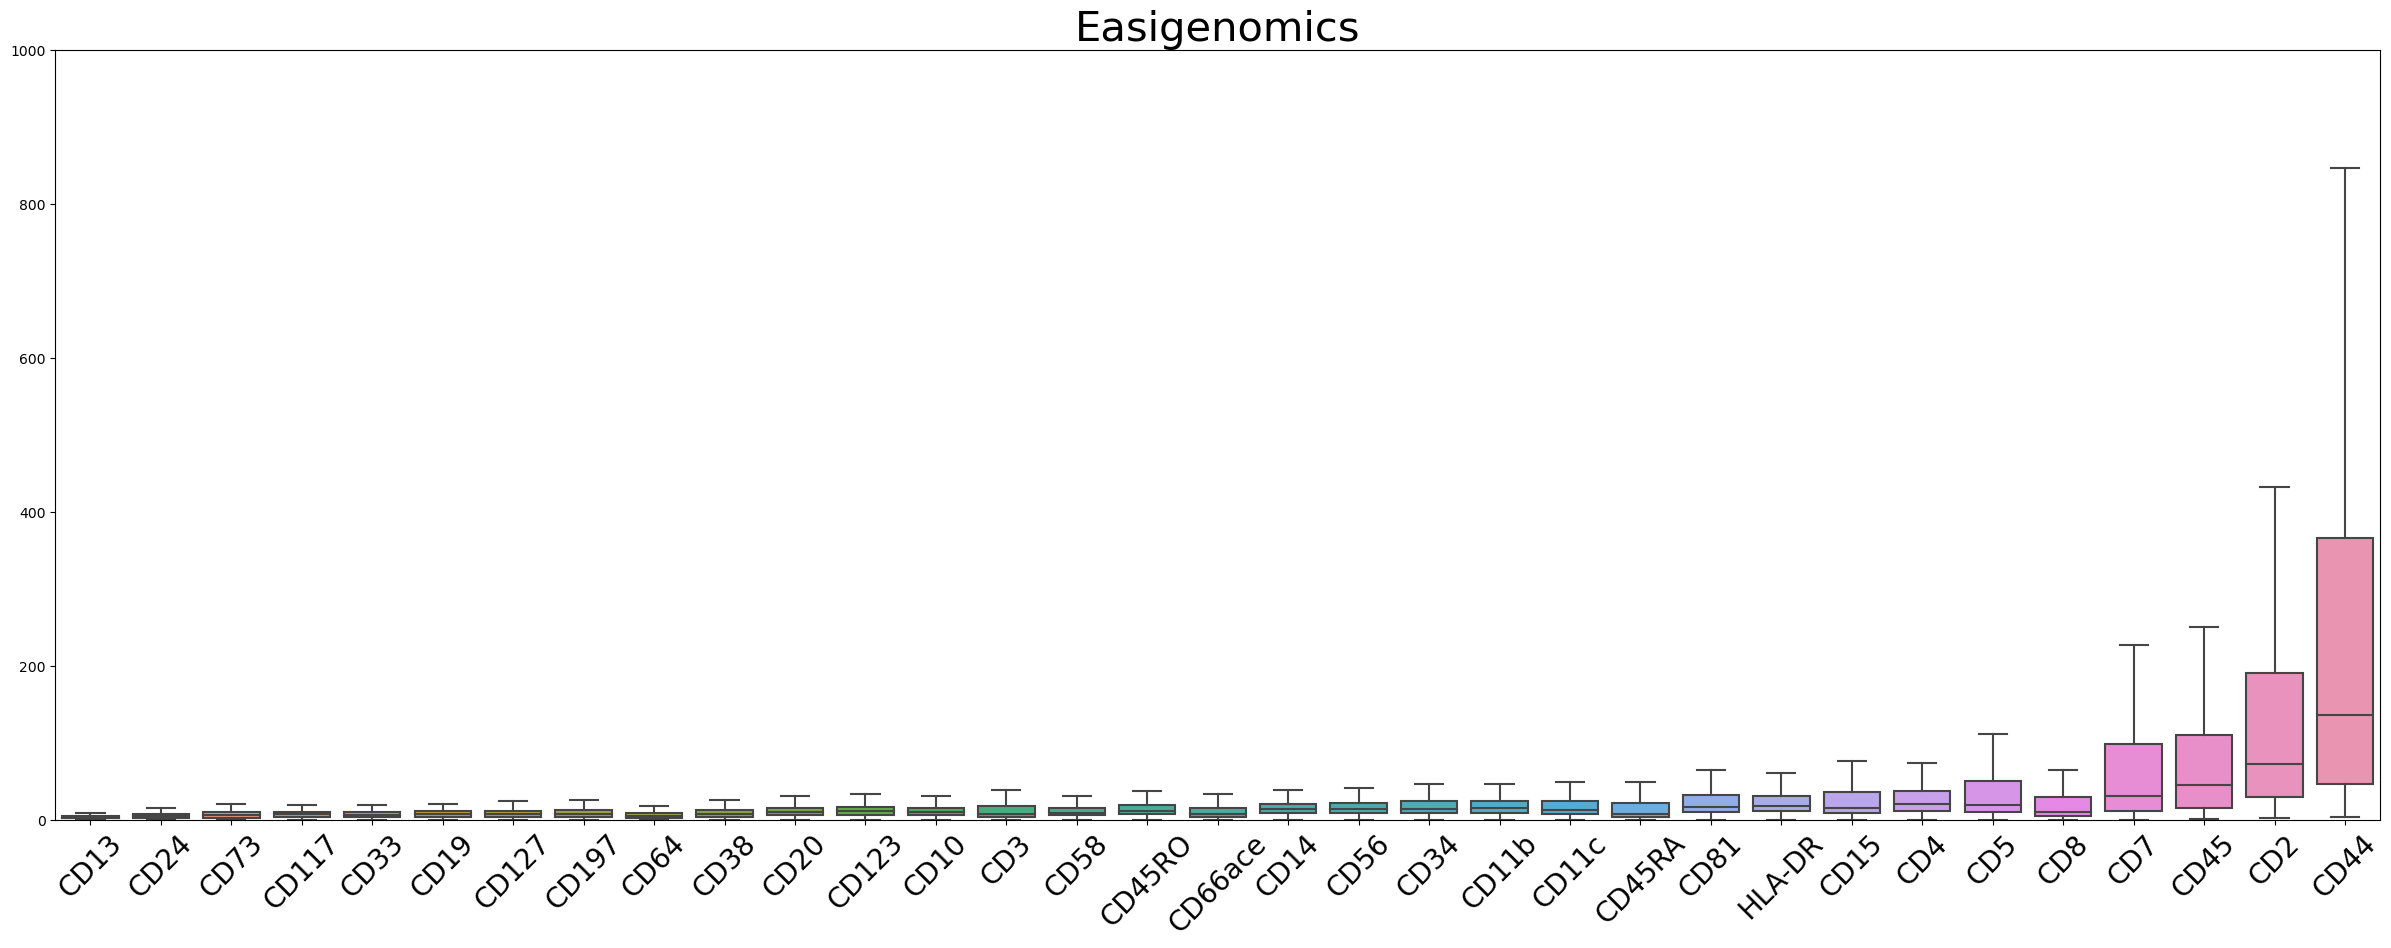

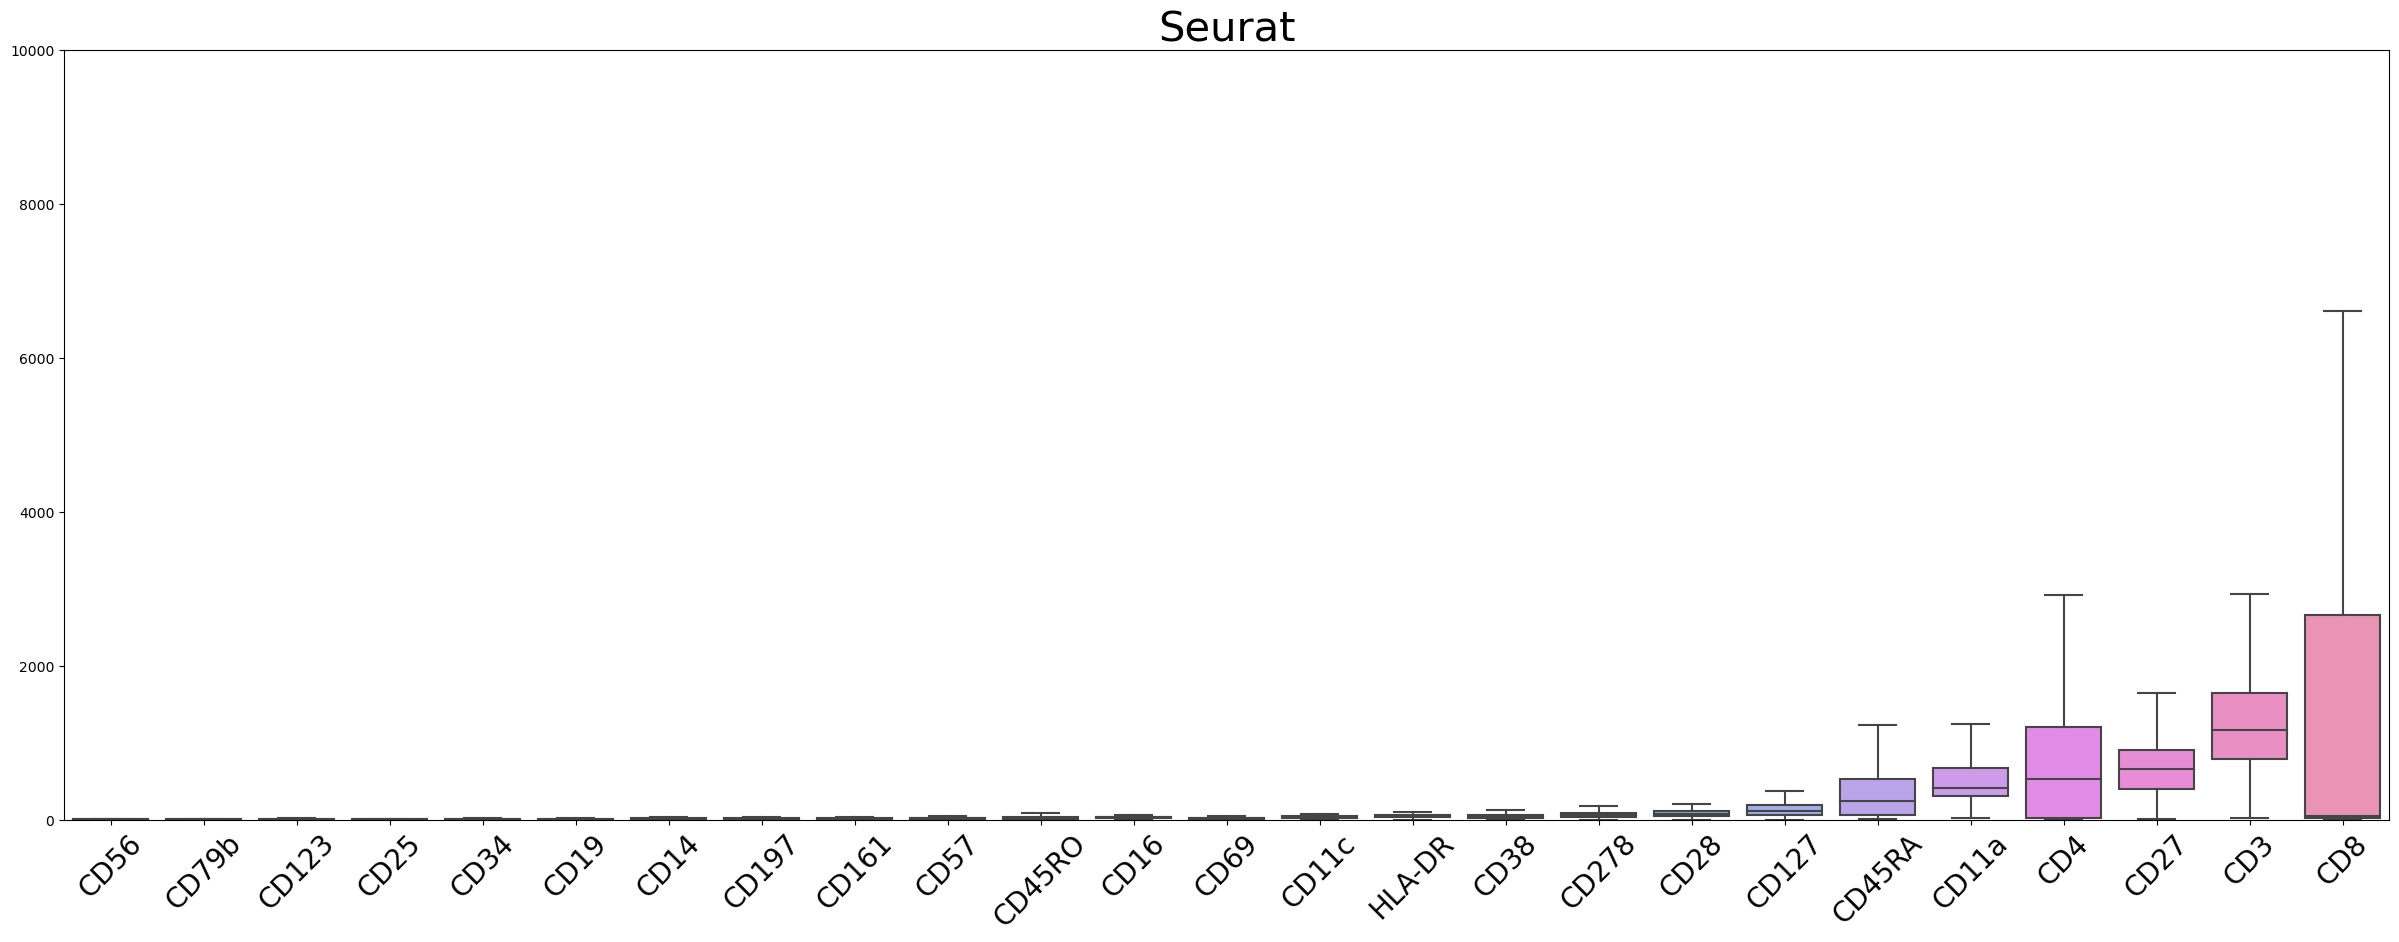

In [183]:
#Neurips top 30
plt.figure(figsize=(30,10))
plt.ylim(0, 1000)
a=sns.boxplot(data=df_sorted_neurips.iloc[0:26775,104:134],  fliersize=0)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
plt.title("Neurips", fontsize=30)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)

#Granja
plt.figure(figsize=(30,10))
plt.ylim(0, 10000)
b=sns.boxplot(data=df_sorted_granja,  fliersize=0)

b.set_xticklabels(b.get_xticklabels(),rotation=45)
b.tick_params(axis='x', labelsize=20) 
plt.title("Granja", fontsize=30)

#Easigenomics
plt.figure(figsize=(30,10))
plt.ylim(0, 1000)
c=sns.boxplot(data=df_sorted_easi,  fliersize=0)

c.set_xticklabels(c.get_xticklabels(),rotation=45) 
c.tick_params(axis='x', labelsize=20)
plt.title("Easigenomics", fontsize=30)

#Seurat
plt.figure(figsize=(30,10))
plt.ylim(0, 10000)
d=sns.boxplot(data=df_sorted_seurat,  fliersize=0)

d.set_xticklabels(d.get_xticklabels(),rotation=45) 
d.tick_params(axis='x', labelsize=20)
plt.title("Seurat", fontsize=30) ;

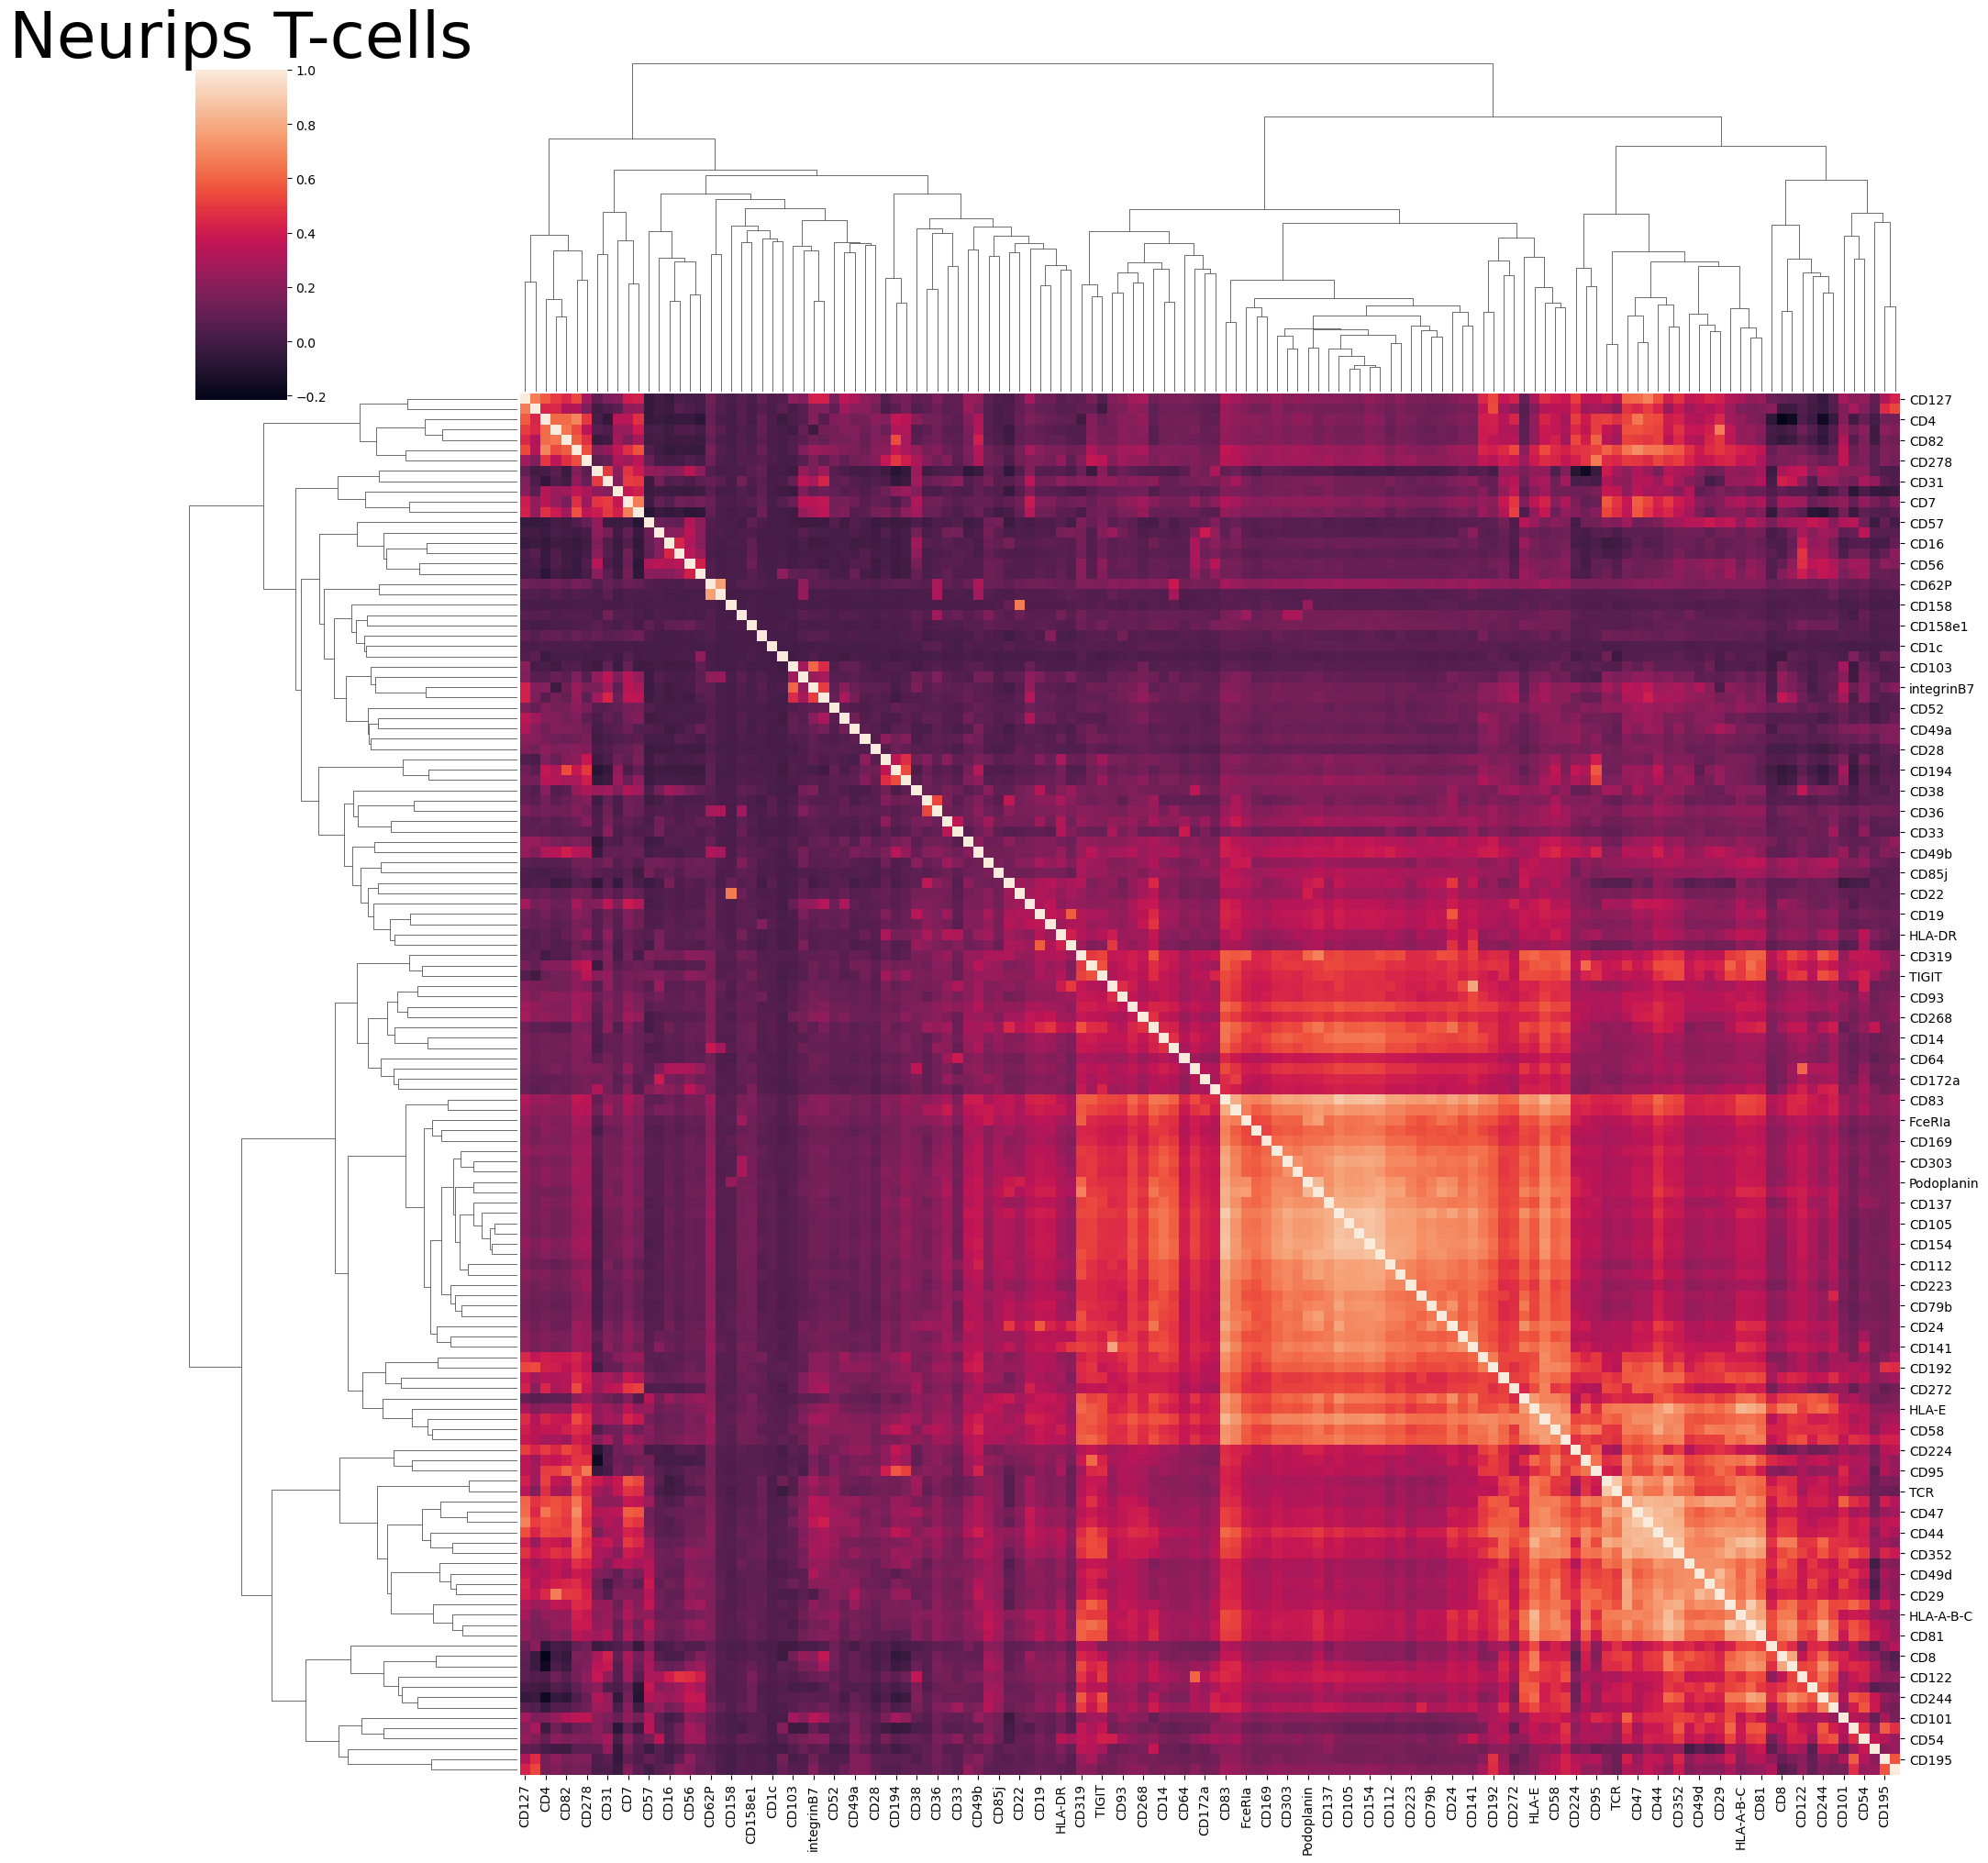

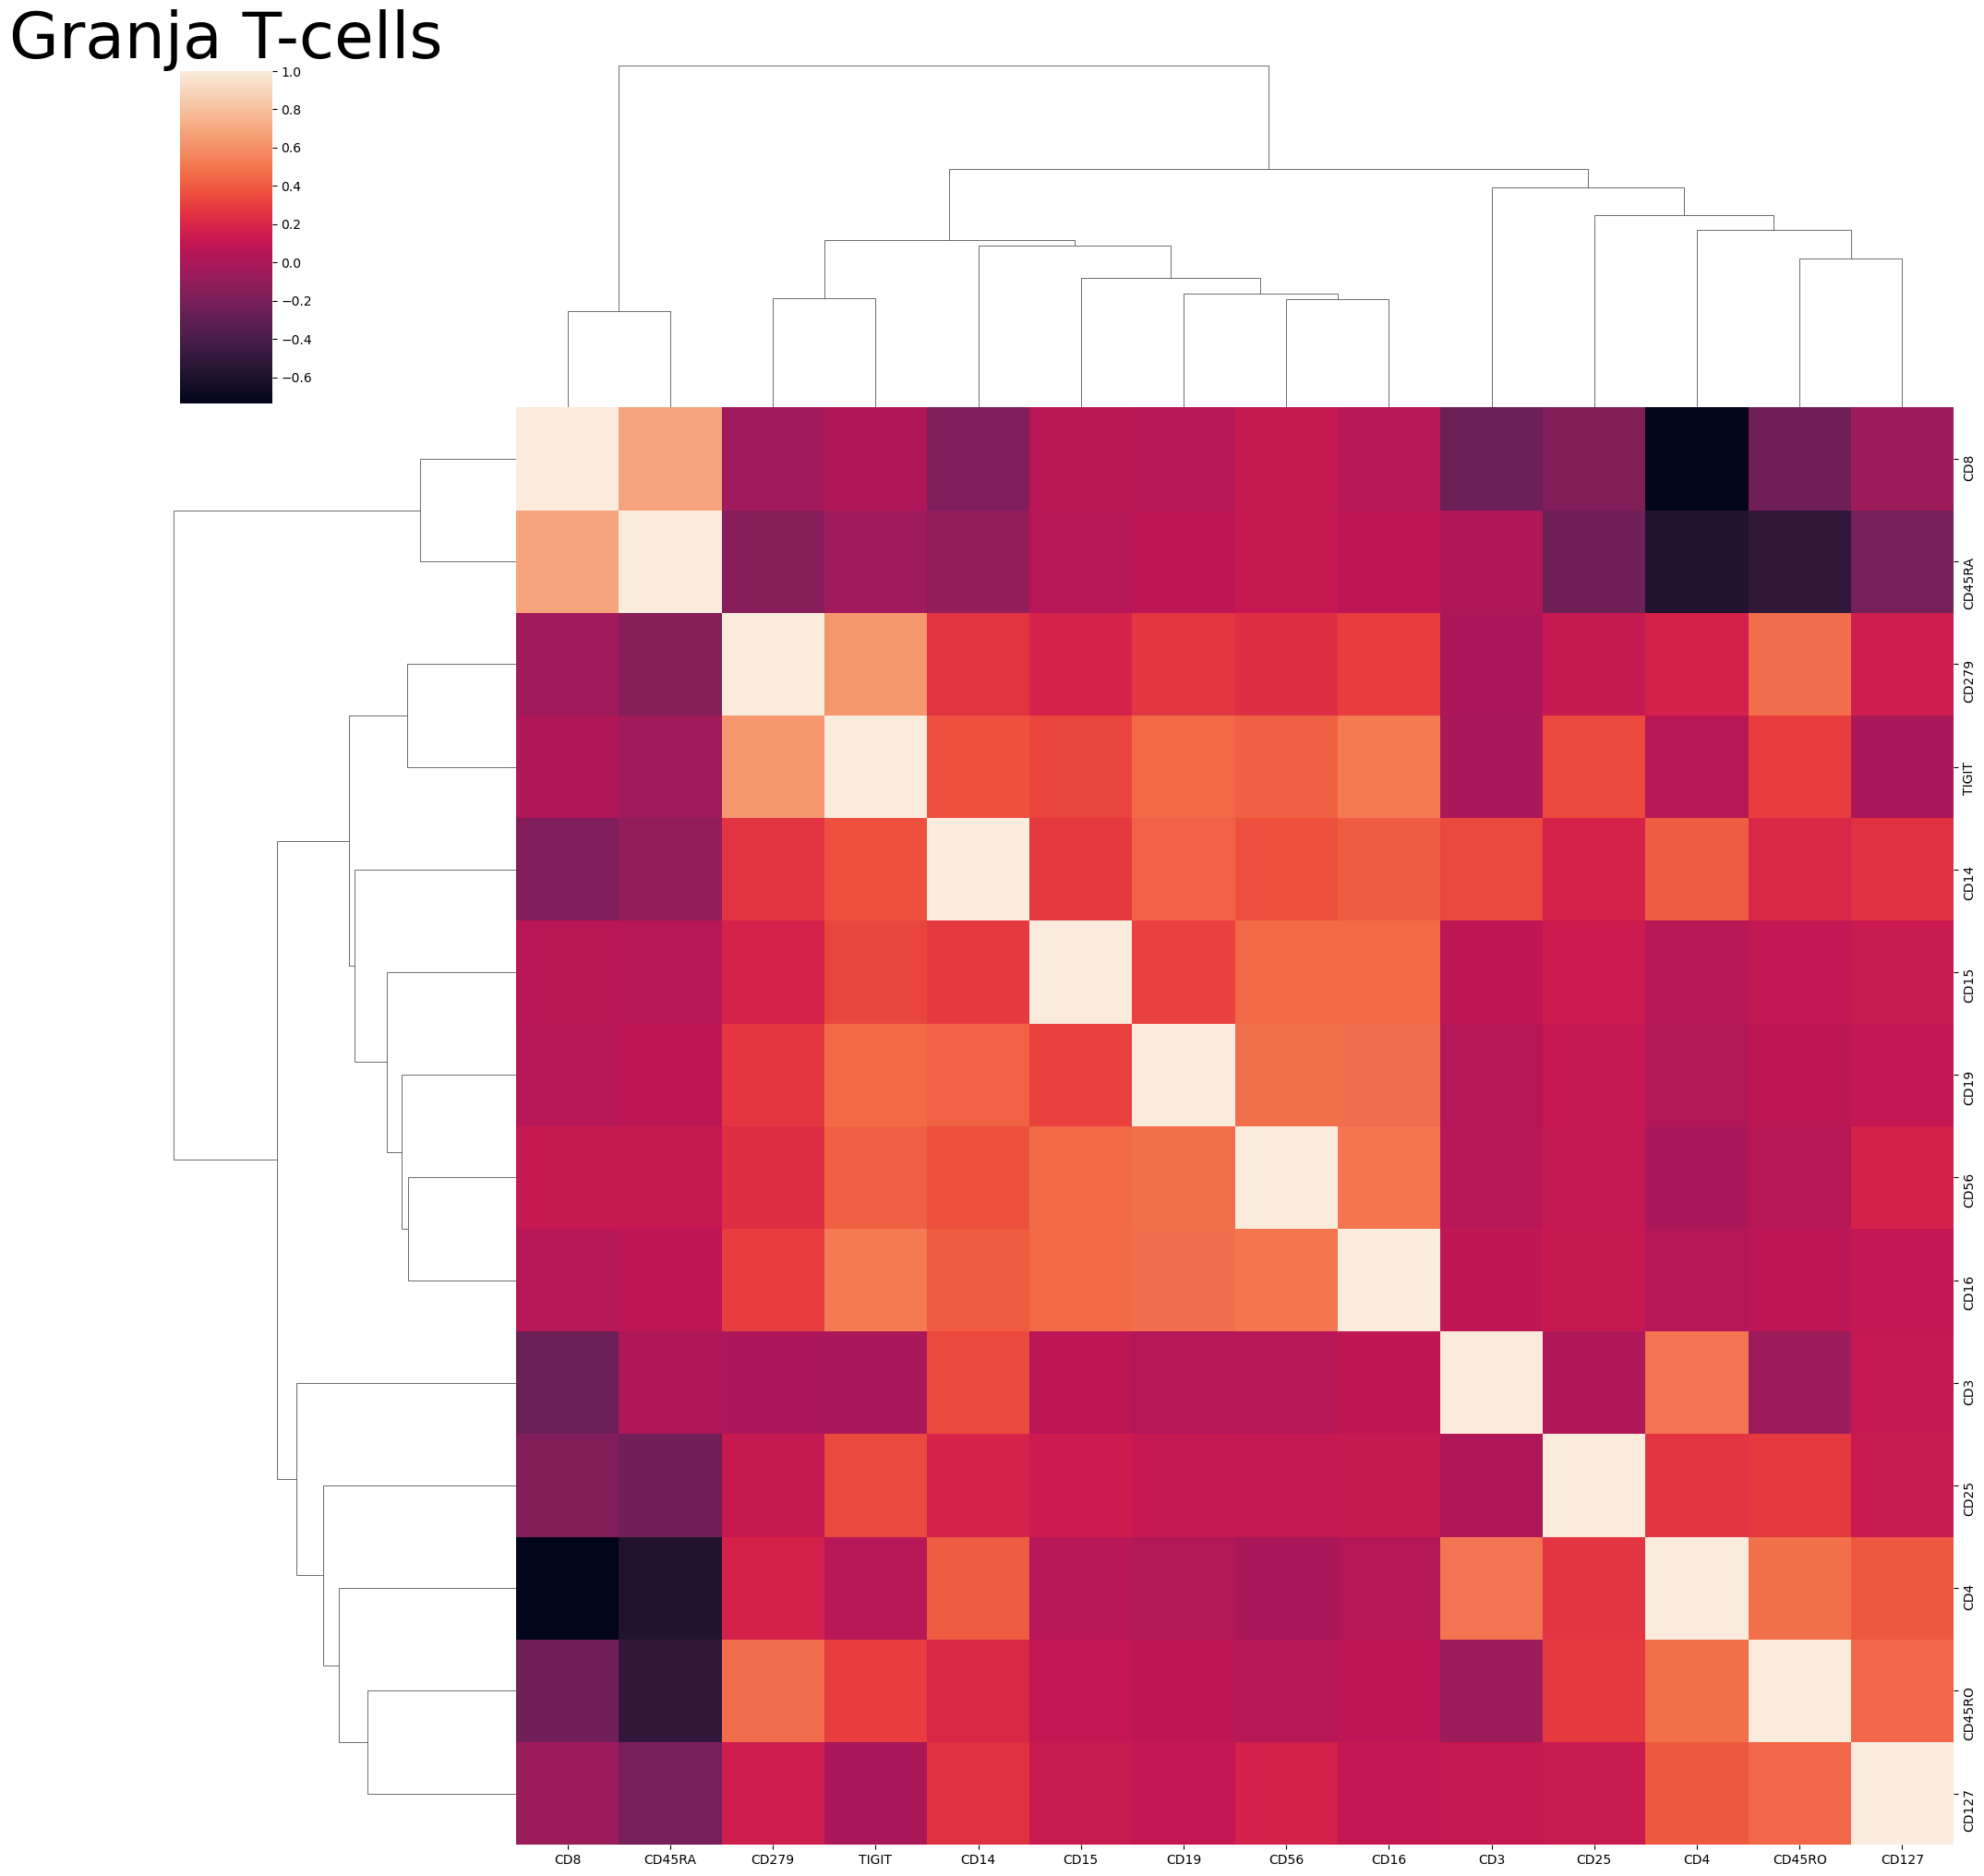

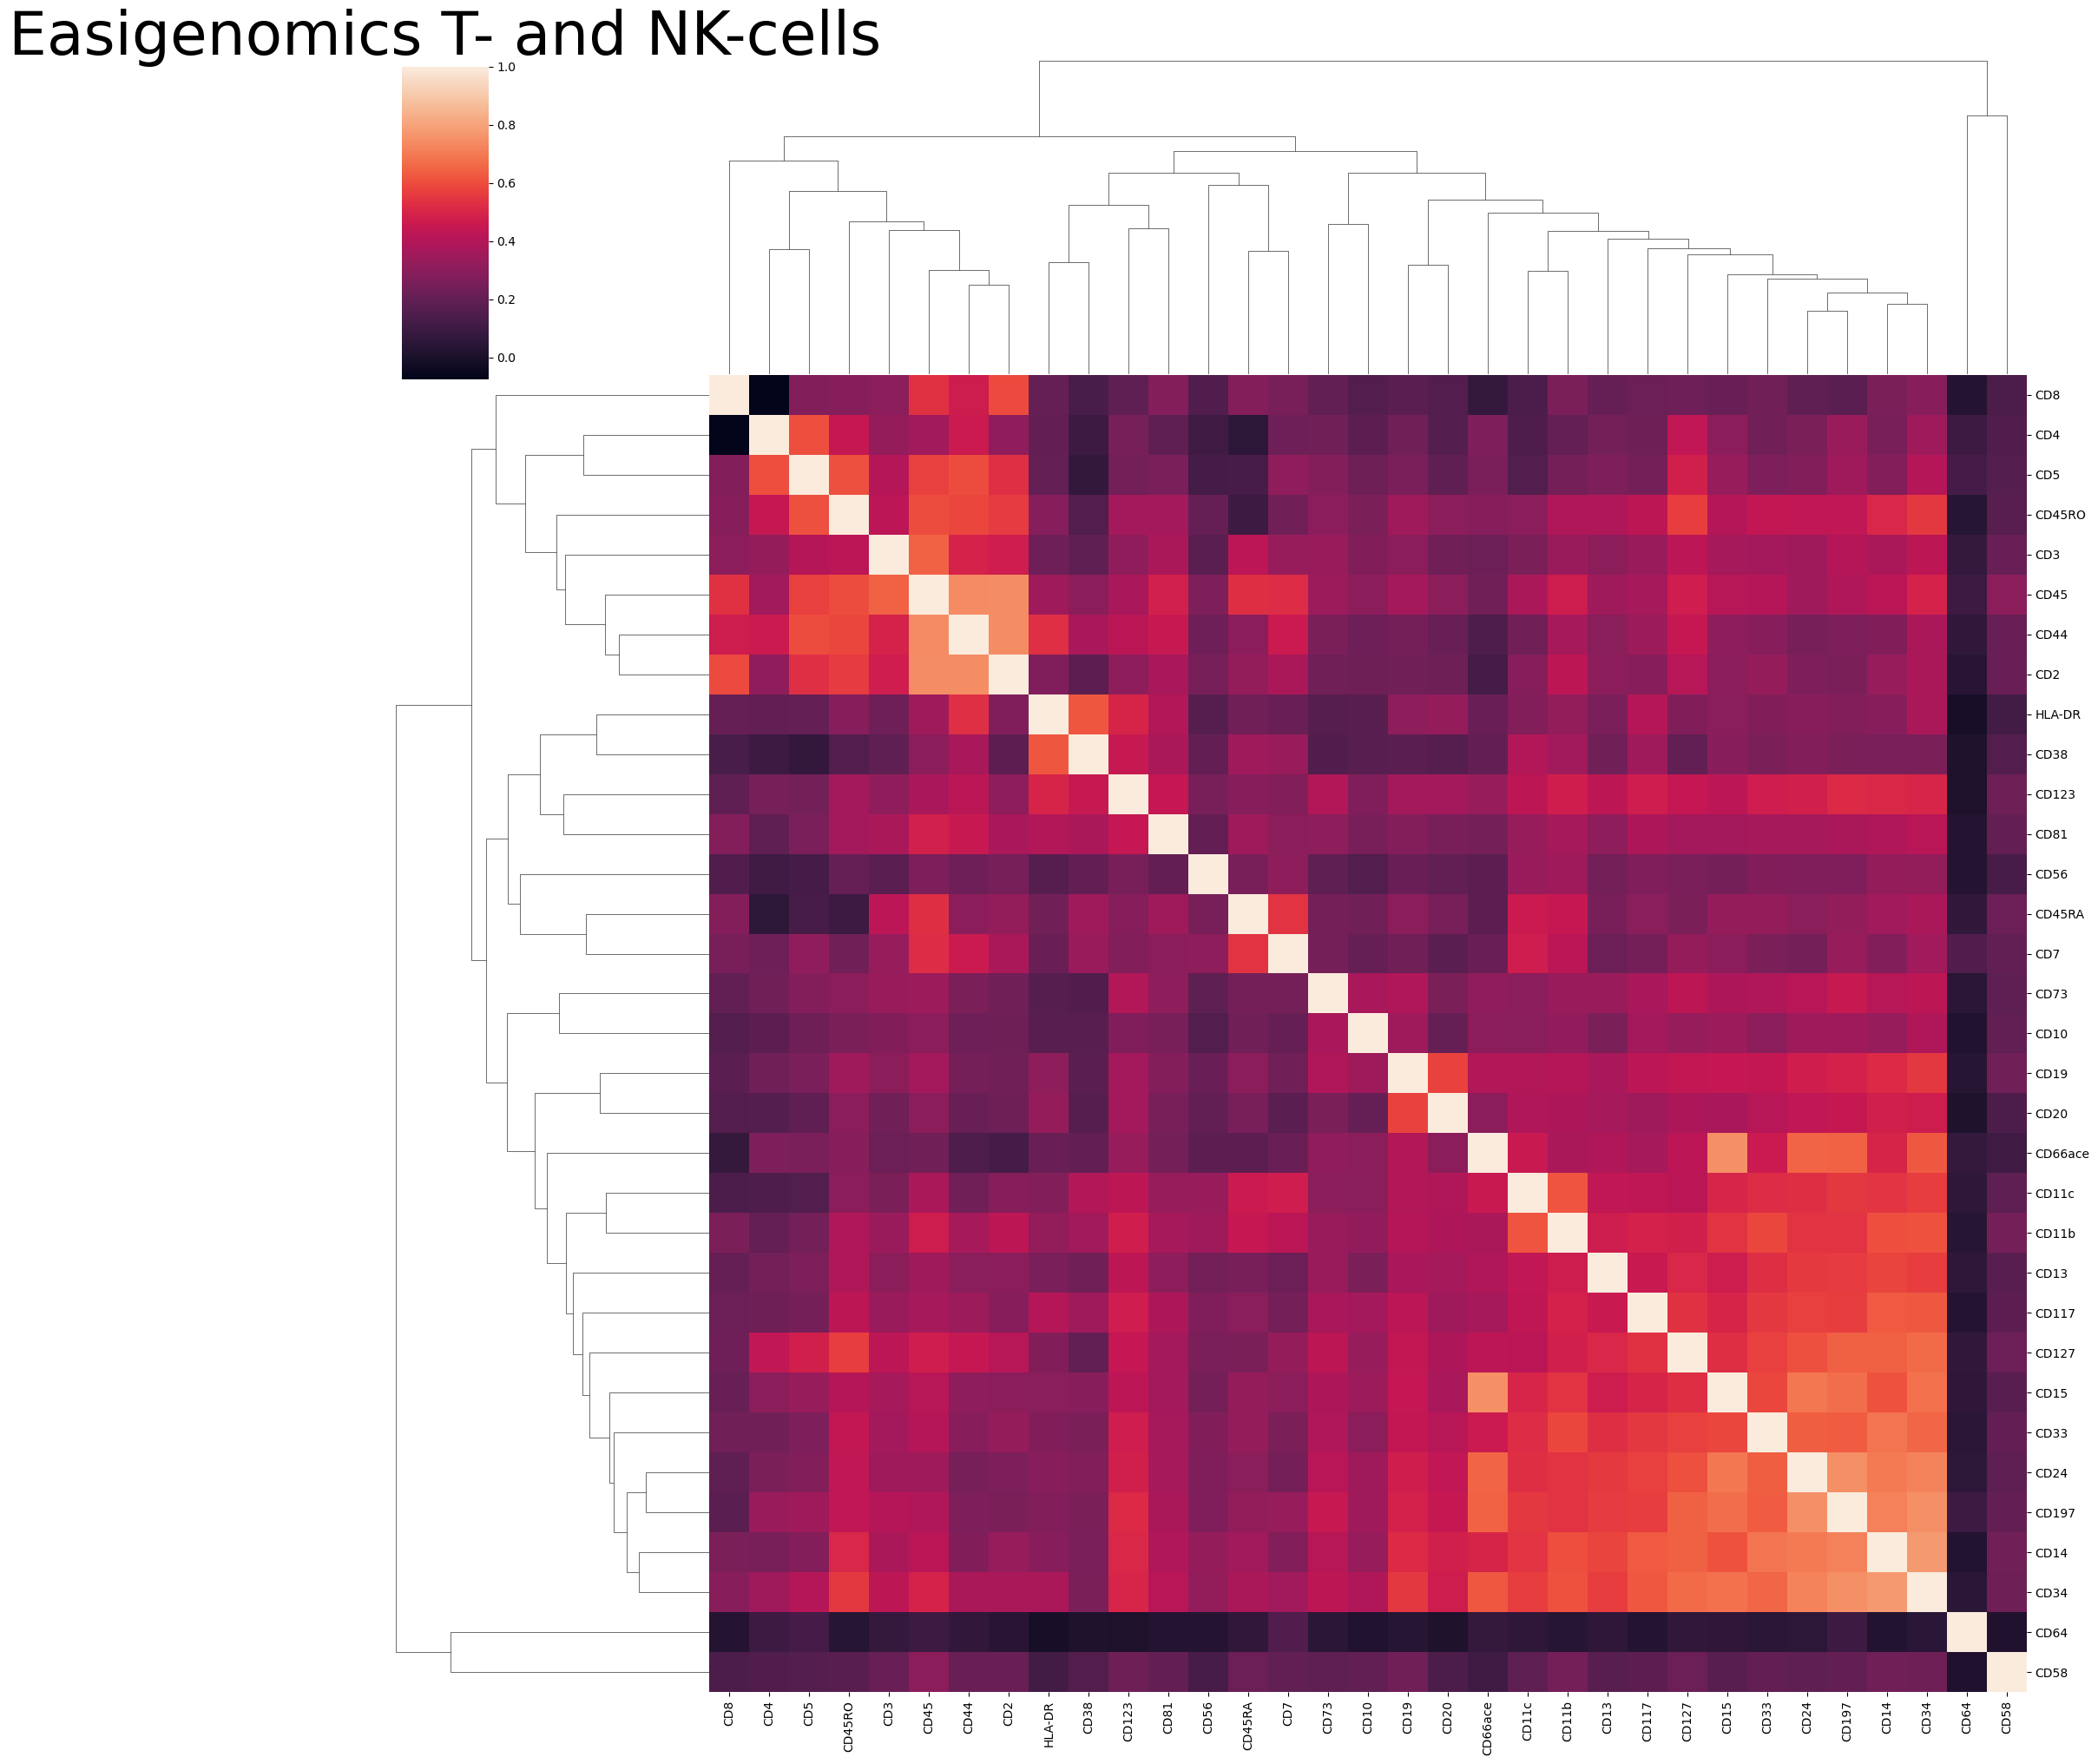

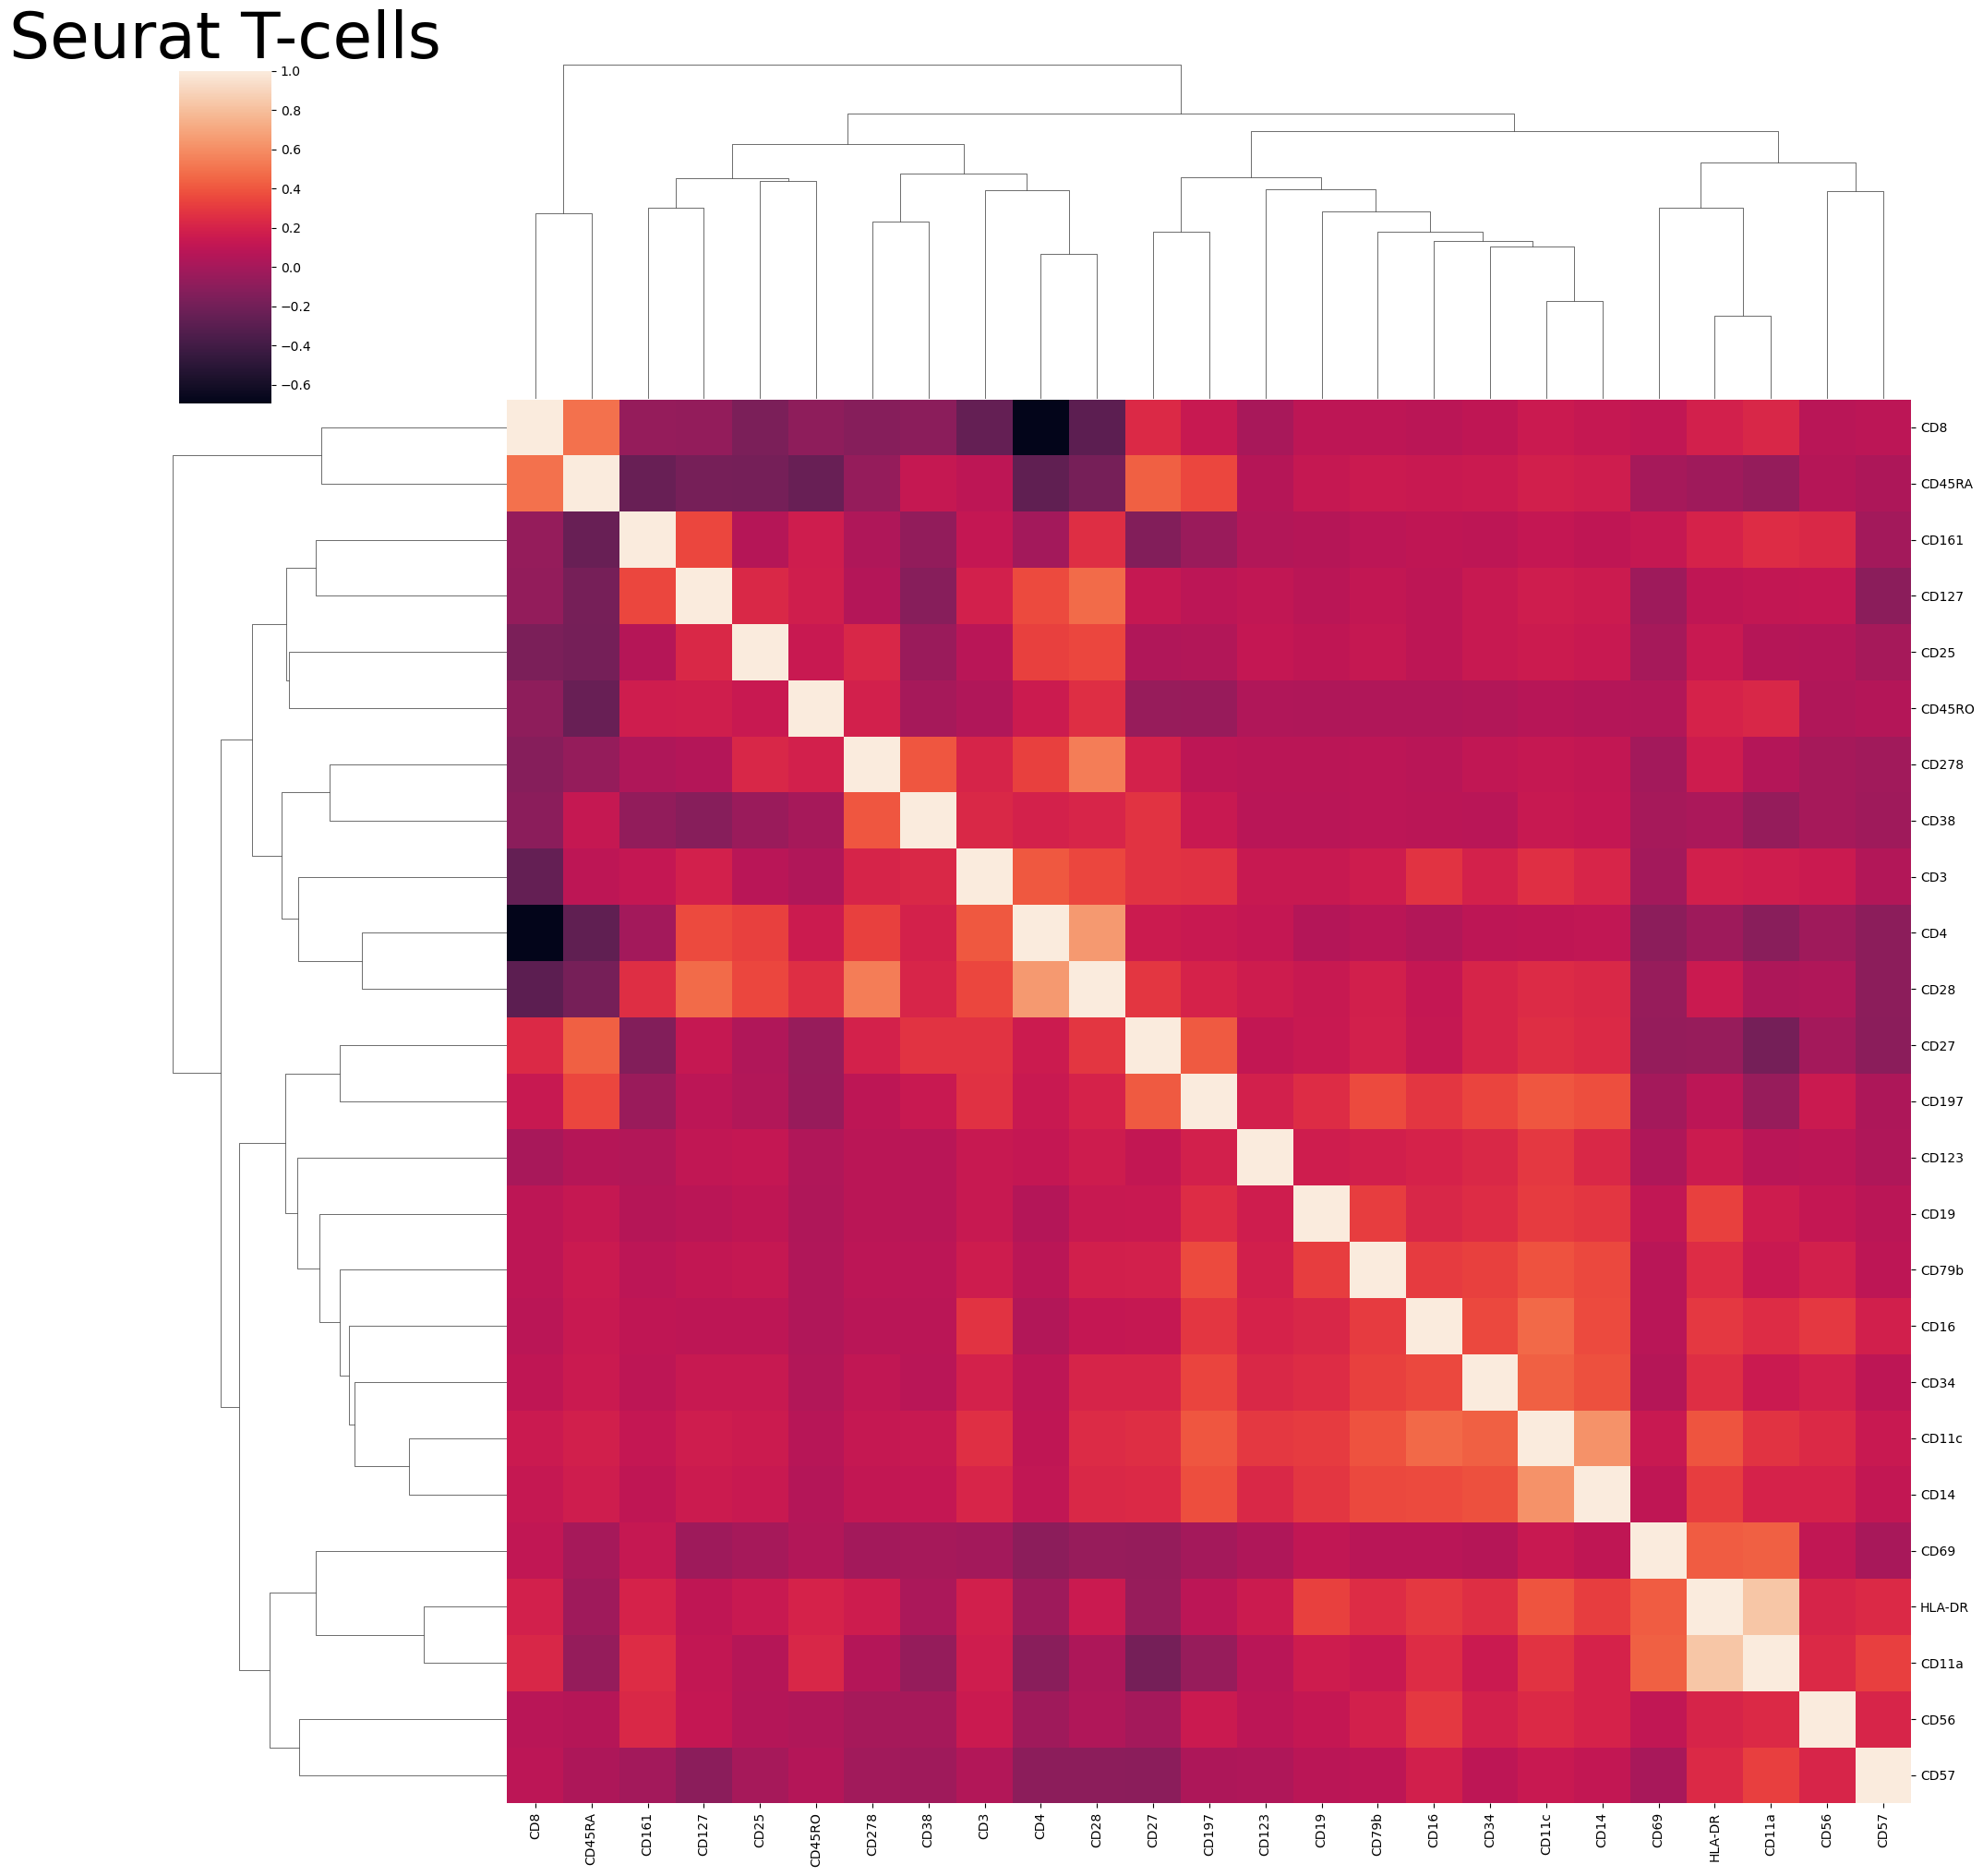

In [113]:
#Neurips
matrix3=neurips_tcell_prot.corr(method='pearson', min_periods=1)
sns.clustermap(matrix3, figsize=(20,20))
plt.title('Neurips T-cells', fontsize = 50) ;


#Granja
matrix4=granja_tcell_prot.corr(method='pearson', min_periods=1)
sns.clustermap(matrix4, figsize=(20,20))
plt.title('Granja T-cells', fontsize = 50) ;

#Easigenomics
matrix5=easi_nkt_prot.corr(method='pearson', min_periods=1) #NK +T
sns.clustermap(matrix5, figsize=(20,20))
plt.title('Easigenomics T- and NK-cells', fontsize = 50) ;

#Seurat
matrix6=seurat_tcell_prot.corr(method='pearson', min_periods=1)
sns.clustermap(matrix6, figsize=(20,20))
plt.title('Seurat T-cells', fontsize = 50) ;


### UMAPS (T-cells)

In [123]:
#Adding protein information to obs for UMAP, Granja
a = granja_tcell.obs
b = granja_tcell_prot

granja_umap_tcell=pd.concat([a, b], axis=1)


cell_type  n_genes  percent_mito  percent_ribo  \
BMMC_D1T1:AAACCCAAGATGCAGC-1  CD4+ T 1     1352           0.0           0.0   
BMMC_D1T1:AAACGAACAGCAGTCC-1  CD4+ T 1     1380           0.0           0.0   
BMMC_D1T1:AAACGAACATGACGAG-1    CD8+ T      993           0.0           0.0   
BMMC_D1T1:AAACGAATCAAGCCAT-1  CD4+ T 1     1416           0.0           0.0   
BMMC_D1T1:AAACGCTAGCCGTAAG-1  CD4+ T 1     1277           0.0           0.0   
...                                ...      ...           ...           ...   
BMMC_D1T2:TTTGGTTGTCTTCATT-1  CD4+ T 1     1476           0.0           0.0   
BMMC_D1T2:TTTGGTTTCACGATCA-1  CD4+ T 1     1241           0.0           0.0   
BMMC_D1T2:TTTGGTTTCCACATAG-1  CD4+ T 1     1226           0.0           0.0   
BMMC_D1T2:TTTGTTGCAGTGGTGA-1    CD8+ T     1004           0.0           0.0   
BMMC_D1T2:TTTGTTGCATGTGTCA-1  CD4+ T 1      951           0.0           0.0   

                              n_counts leiden_r2  leiden_r2_n_genes_MAD_diff  \
BMMC_D1T1:AAACCCAAGATGCAGC-1    2431.0        19                    1.343195   
BMMC_D1T1:AAACGAACAGCAGTCC-1    2783.0         3                    0.075630   
BMMC_D1T1:AAACGAACATGACGAG-1    1899.0         7                    2.400000   
BMMC_D1T1:AAACGAATCAAGCCAT-1    2653.0         3                    0.226891   
BMMC_D1T1:AAACGCTAGCCGTAAG-1    2451.0        13                    1.666667   
...                                ...       ...                         ...   
BMMC_D1T2:TTTGGTTGTCTTCATT-1    2782.0         8                    1.149485   
BMMC_D1T2:TTTGGTTTCACGATCA-1    2256.0         3                    0.981366   
BMMC_D1T2:TTTGGTTTCCACATAG-1    2298.0         4                    0.398625   
BMMC_D1T2:TTTGTTGCAGTGGTGA-1    1660.0         1                    1.010753   
BMMC_D1T2:TTTGTTGCATGTGTCA-1    1630.0         0                    0.500000   

                              leiden_r2_n_counts_MAD_diff  \
BMMC_D1T1:AAACCCAAGATGCAGC-1                     0.485075   
BMMC_D1T1:AAACGAACAGCAGTCC-1                     0.290566   
BMMC_D1T1:AAACGAACATGACGAG-1                     1.789238   
BMMC_D1T1:AAACGAATCAAGCCAT-1                     0.200000   
BMMC_D1T1:AAACGCTAGCCGTAAG-1                     2.240260   
...                                                   ...   
BMMC_D1T2:TTTGGTTGTCTTCATT-1                     0.573427   
BMMC_D1T2:TTTGGTTTCACGATCA-1                     0.590504   
BMMC_D1T2:TTTGGTTTCCACATAG-1                     0.577849   
BMMC_D1T2:TTTGTTGCAGTGGTGA-1                     0.700288   
BMMC_D1T2:TTTGTTGCATGTGTCA-1                     0.754839   

                              leiden_r2_percent_mito_MAD_diff filter  ...  \
BMMC_D1T1:AAACCCAAGATGCAGC-1                              NaN  False  ...   
BMMC_D1T1:AAACGAACAGCAGTCC-1                              NaN  False  ...   
BMMC_D1T1:AAACGAACATGACGAG-1                              NaN  False  ...   
BMMC_D1T1:AAACGAATCAAGCCAT-1                              NaN  False  ...   
BMMC_D1T1:AAACGCTAGCCGTAAG-1                              NaN  False  ...   
...                                                       ...    ...  ...   
BMMC_D1T2:TTTGGTTGTCTTCATT-1                              NaN  False  ...   
BMMC_D1T2:TTTGGTTTCACGATCA-1                              NaN  False  ...   
BMMC_D1T2:TTTGGTTTCCACATAG-1                              NaN  False  ...   
BMMC_D1T2:TTTGTTGCAGTGGTGA-1                              NaN  False  ...   
BMMC_D1T2:TTTGTTGCATGTGTCA-1                              NaN  False  ...   

                             CD45RA   CD4 CD14 CD16 CD25 CD45RO CD279 TIGIT  \
BMMC_D1T1:AAACCCAAGATGCAGC-1     64  4987   38    9   68   1013    39     6   
BMMC_D1T1:AAACGAACAGCAGTCC-1     86  5330   44   15   90    706    24     7   
BMMC_D1T1:AAACGAACATGACGAG-1   3522    29   32   14   18     36    22     9   
BMMC_D1T1:AAACGAATCAAGCCAT-1     71  3494   44   15  233    674    49     6   
BMMC_D1T1:AAACGCTAGCCGTAAG-1    672  3416   34   11   53     72   

In [130]:
#Adding protein information to obs for UMAP, Easigenomics 

a = easi_nkt.obs
b = easi_nkt_prot

easi_umap_nkt=pd.concat([a, b], axis=1)

easi_nkt.obs=easi_umap_tcell

In [132]:
#Adding protein information to obs for UMAP, Easigenomics 

a = neurips_tcell.obs
b = neurips_tcell_prot

neurips_umap_tcell=pd.concat([a, b], axis=1)

neurips_tcell.obs=neurips_umap_tcell

In [136]:
#Adding protein information to obs for UMAP, Easigenomics 

a = seurat_tcell.obs
b = seurat_tcell_prot

seurat_umap_tcell=pd.concat([a, b], axis=1)

seurat_tcell.obs=seurat_umap_tcell

In [144]:
#T-cell markers

killer_t= ['CD8']
helper_t = ['CD4']
reg_t = ['CD4','CD127']



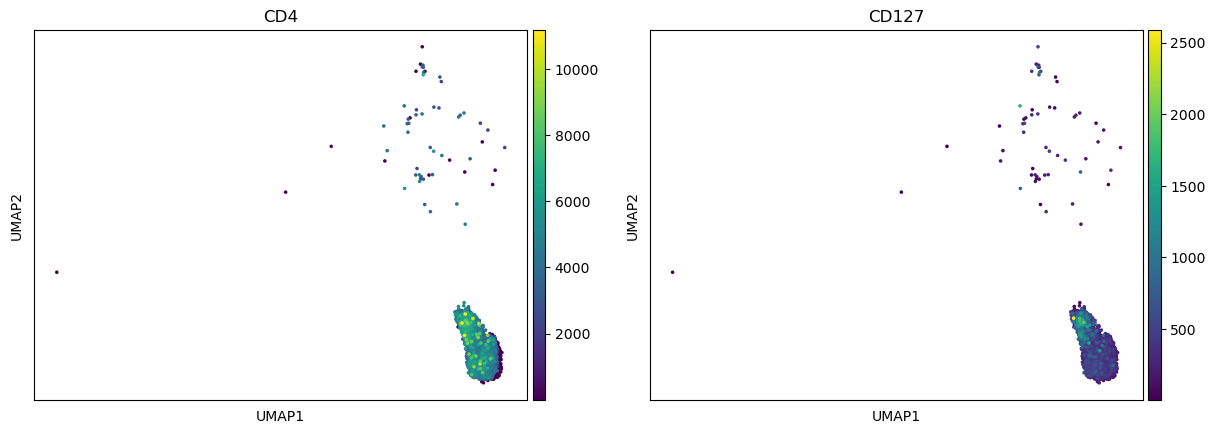

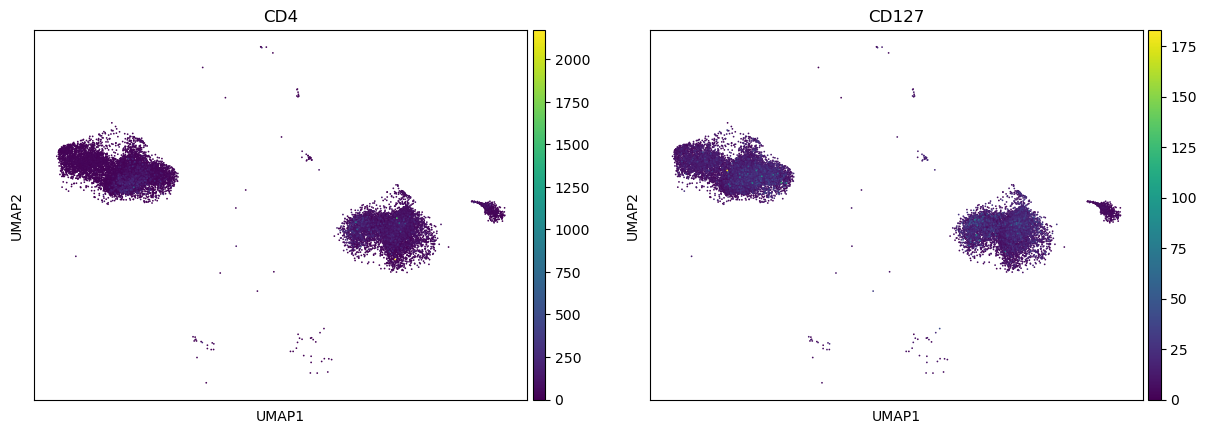

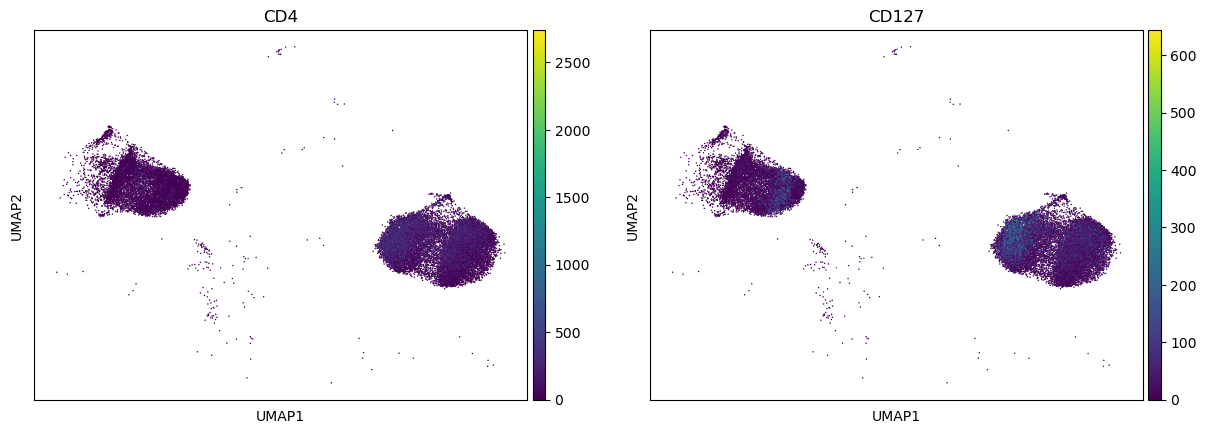

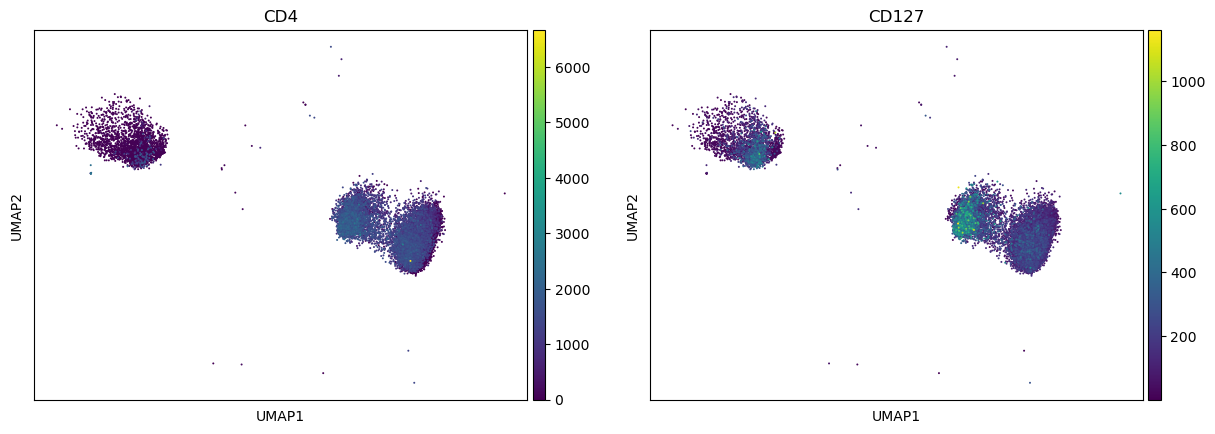

In [185]:
#Regulatory T-cells

sc.pl.umap(granja_tcell, color = reg_t, color_map = 'viridis',)

sc.pl.umap(easi_nkt, color = reg_t, color_map = 'viridis')

sc.pl.umap(neurips_tcell, color = reg_t, color_map = 'viridis')

sc.pl.umap(seurat_tcell, color = reg_t, color_map = 'viridis')

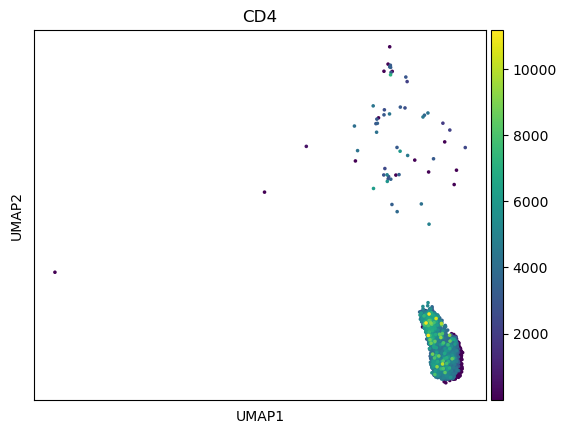

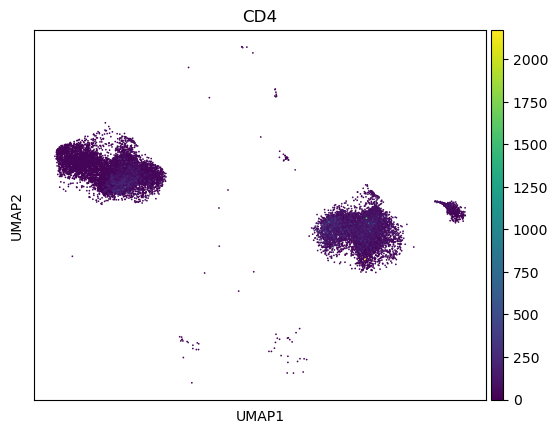

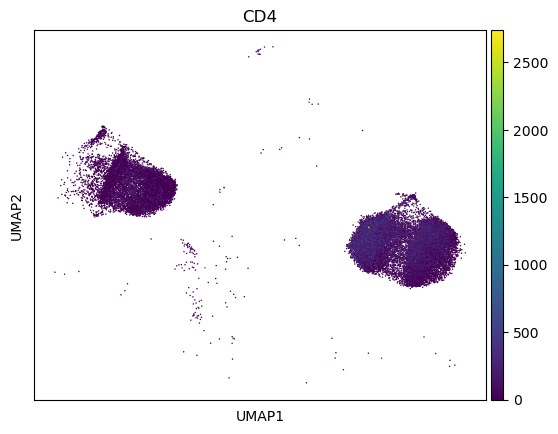

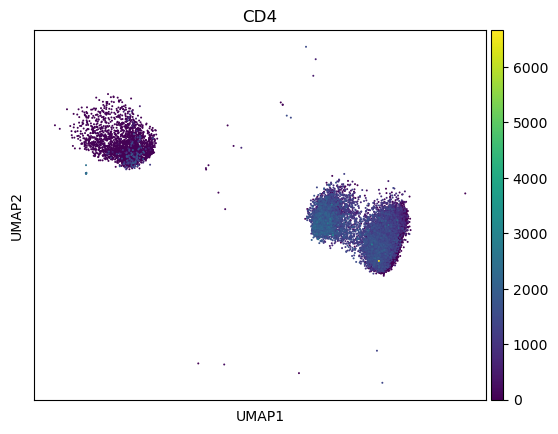

In [141]:
#Helper T-cells

sc.pl.umap(granja_tcell, color = helper_t, color_map = 'viridis')

sc.pl.umap(easi_nkt, color = helper_t, color_map = 'viridis')

sc.pl.umap(neurips_tcell, color = helper_t, color_map = 'viridis')

sc.pl.umap(seurat_tcell, color = helper_t, color_map = 'viridis')

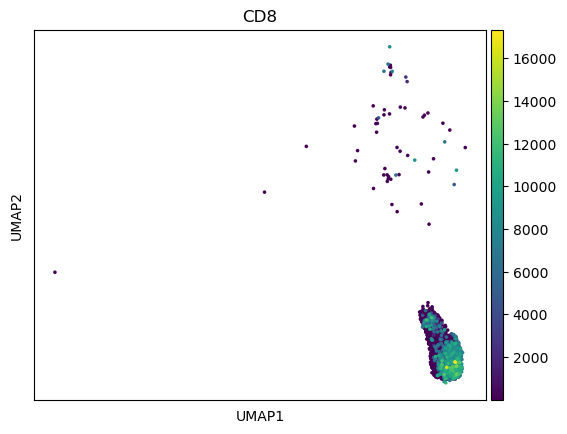

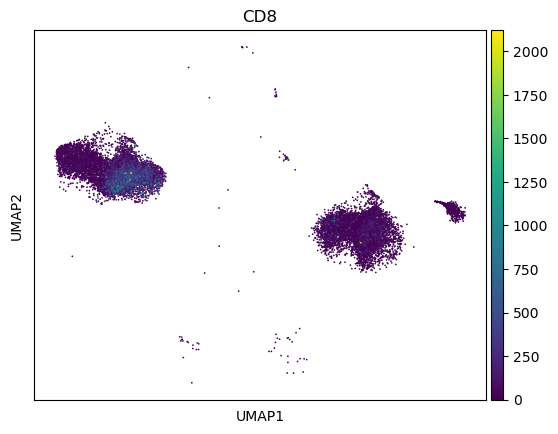

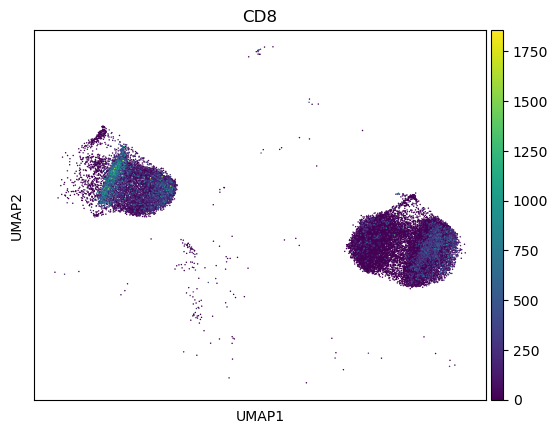

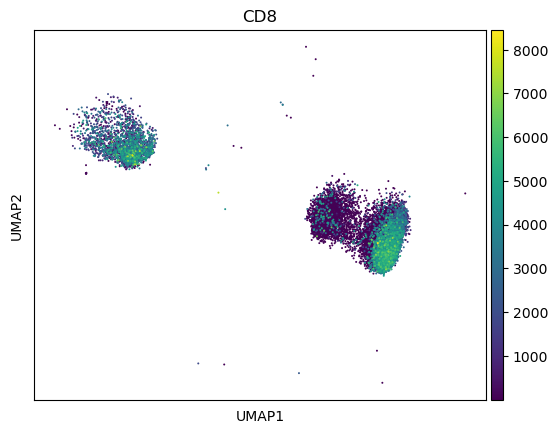

In [140]:
#Killer T-cells

sc.pl.umap(granja_tcell, color = killer_t, color_map = 'viridis')

sc.pl.umap(easi_nkt, color = killer_t, color_map = 'viridis')

sc.pl.umap(neurips_tcell, color = killer_t, color_map = 'viridis')

sc.pl.umap(seurat_tcell, color = killer_t, color_map = 'viridis')



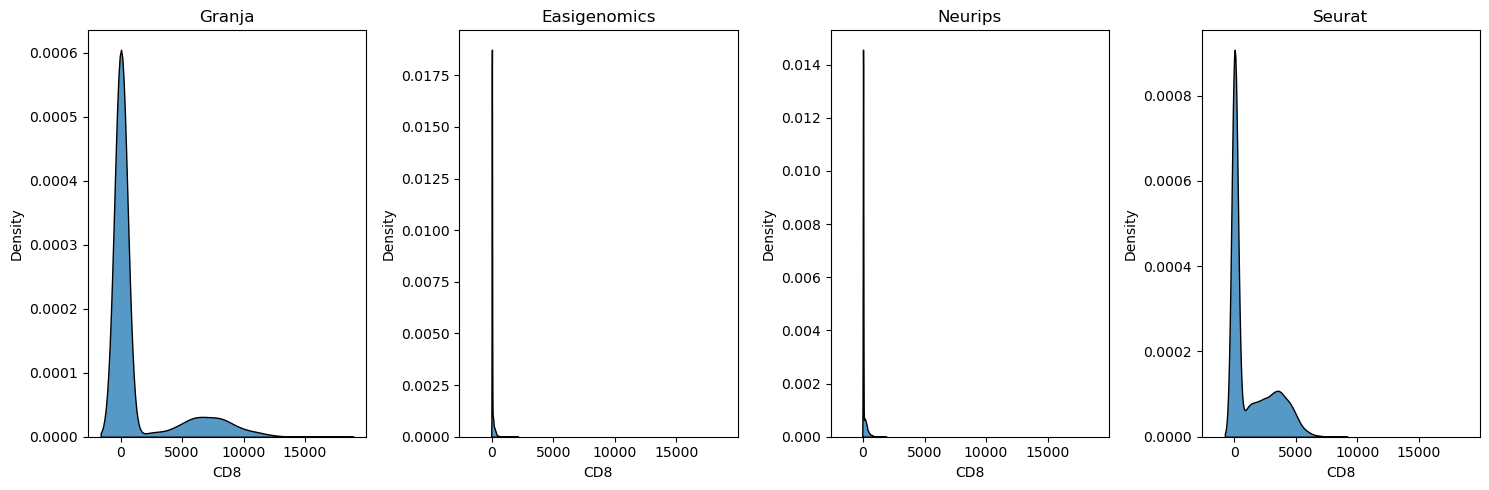

In [203]:
#Killer T-cells
markers = killer_t

for column_name in markers:
    fig, ax =plt.subplots(1,4 ,tight_layout=True, figsize=(15, 5), sharex=True)
    fig.show()

    ax1 = sns.kdeplot(data=granja_tcell_prot, x=column_name, multiple="stack", ax=ax[0]) ;
    ax2 = sns.kdeplot(data=easi_nkt_prot, x=column_name, multiple="stack", ax=ax[1]) ;
    ax3 = sns.kdeplot(data=neurips_tcell_prot, x=column_name, multiple="stack", ax=ax[2]) ;
    ax4 = sns.kdeplot(data=seurat_tcell_prot, x=column_name, multiple="stack", ax=ax[3]) ;

    ax1.title.set_text('Granja')    
    ax2.title.set_text('Easigenomics')
    ax3.title.set_text('Neurips')
    ax4.title.set_text('Seurat')
    
    plt.show()

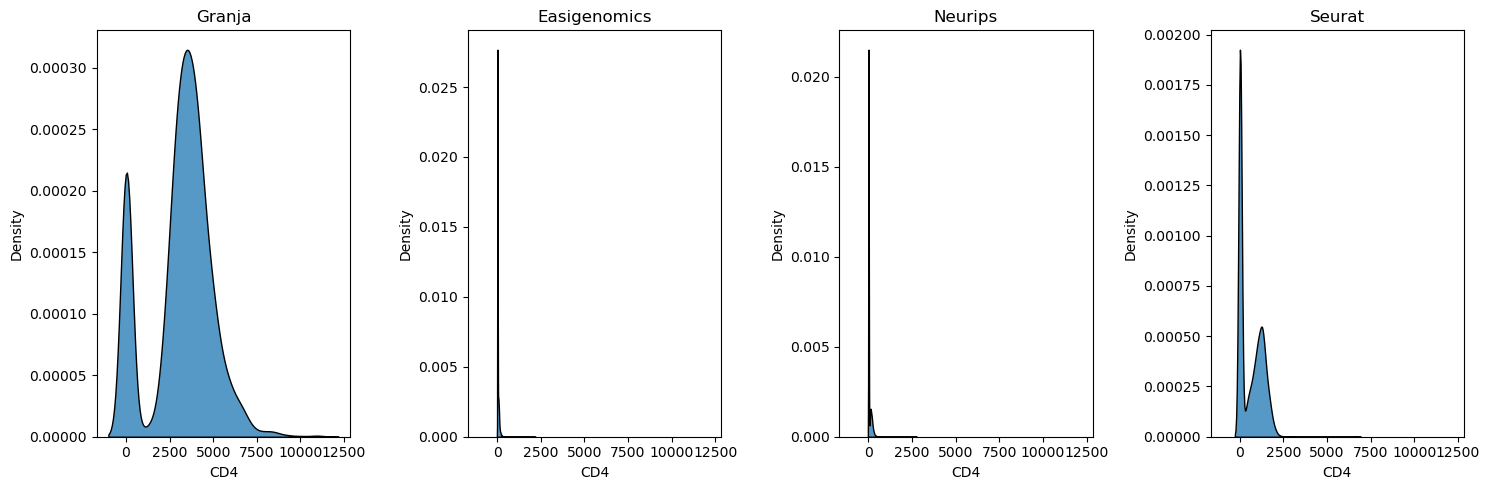

In [204]:
#Helper T-cells

markers = helper_t

for column_name in markers:
    fig, ax =plt.subplots(1,4 ,tight_layout=True, figsize=(15, 5), sharex=True)
    fig.show()

    ax1 = sns.kdeplot(data=granja_tcell_prot, x=column_name, multiple="stack", ax=ax[0]) ;
    ax2 = sns.kdeplot(data=easi_nkt_prot, x=column_name, multiple="stack", ax=ax[1]) ;
    ax3 = sns.kdeplot(data=neurips_tcell_prot, x=column_name, multiple="stack", ax=ax[2]) ;
    ax4 = sns.kdeplot(data=seurat_tcell_prot, x=column_name, multiple="stack", ax=ax[3]) ;

    ax1.title.set_text('Granja')    
    ax2.title.set_text('Easigenomics')
    ax3.title.set_text('Neurips')
    ax4.title.set_text('Seurat')
    
    plt.show()

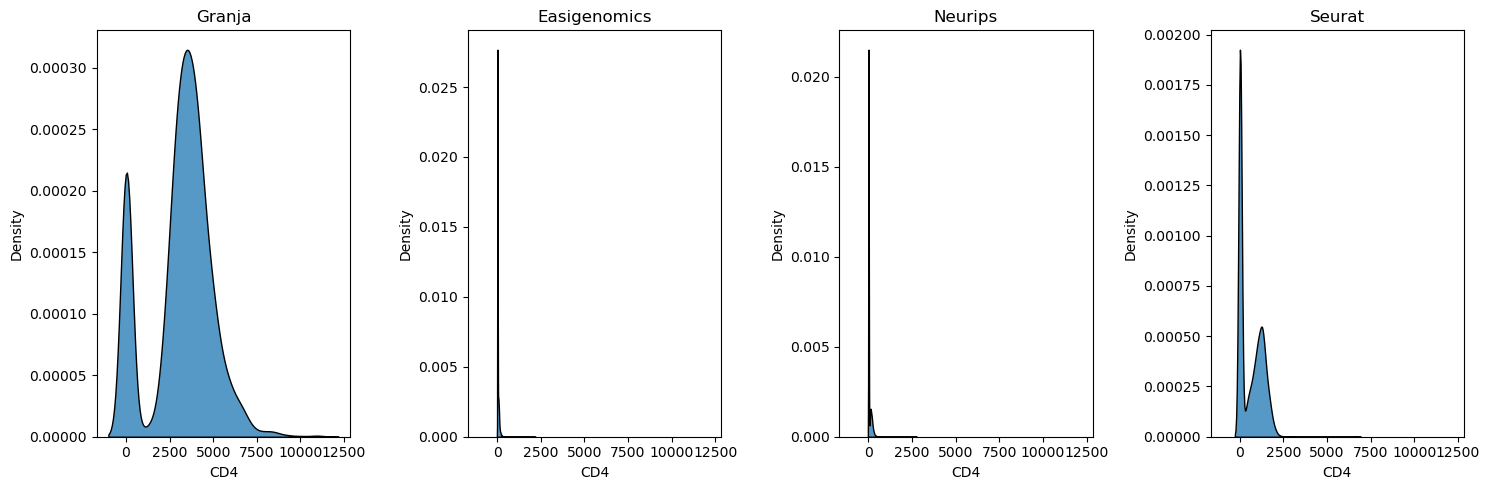

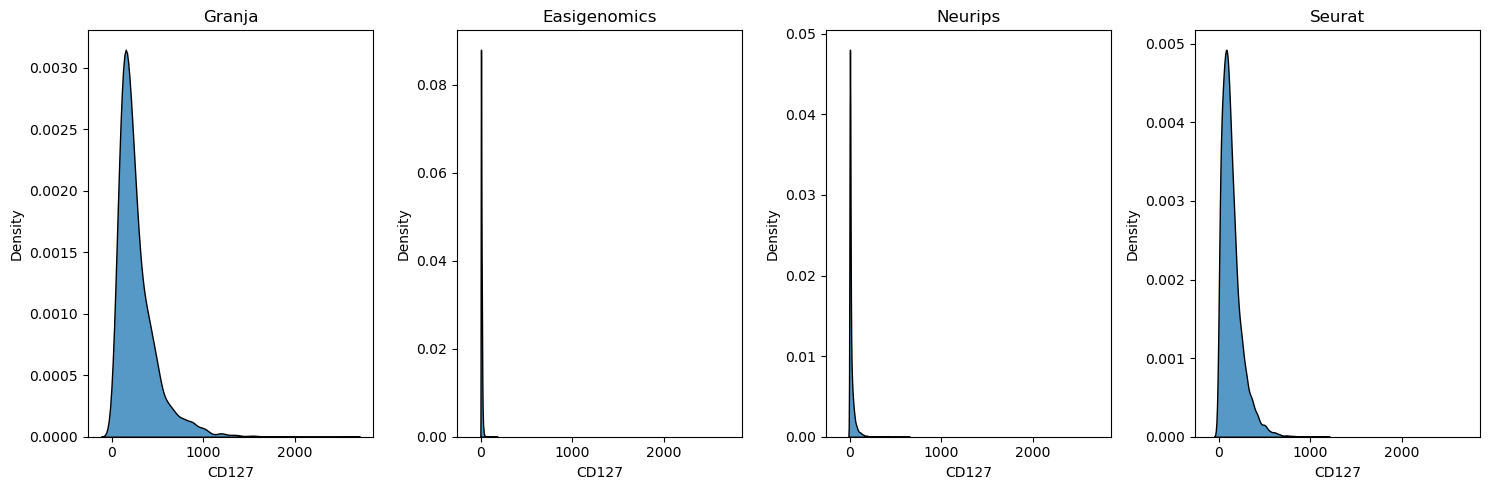

In [205]:
#Regulatory T-cells

markers = reg_t

for column_name in markers:
    fig, ax =plt.subplots(1,4 ,tight_layout=True, figsize=(15, 5), sharex=True)
    fig.show()

    ax1 = sns.kdeplot(data=granja_tcell_prot, x=column_name, multiple="stack", ax=ax[0]) ;
    ax2 = sns.kdeplot(data=easi_nkt_prot, x=column_name, multiple="stack", ax=ax[1]) ;
    ax3 = sns.kdeplot(data=neurips_tcell_prot, x=column_name, multiple="stack", ax=ax[2]) ;
    ax4 = sns.kdeplot(data=seurat_tcell_prot, x=column_name, multiple="stack", ax=ax[3]) ;

    ax1.title.set_text('Granja')    
    ax2.title.set_text('Easigenomics')
    ax3.title.set_text('Neurips')
    ax4.title.set_text('Seurat')
    
    plt.show()

In [192]:
granja_col=granja_tcell_prot.columns

granja_col

Index(['CD3', 'CD8', 'CD56', 'CD19', 'CD45RA', 'CD4', 'CD14', 'CD16', 'CD25',
       'CD45RO', 'CD279', 'TIGIT', 'CD127', 'CD15'],
      dtype='object')

In [194]:
easi_col=easi_nkt_prot.columns

easi_col

Index(['CD3', 'CD8', 'CD56', 'CD19', 'CD33', 'CD11c', 'CD45RA', 'CD123', 'CD7',
       'CD4', 'CD44', 'CD14', 'CD45RO', 'CD20', 'CD5', 'HLA-DR', 'CD11b',
       'CD64', 'CD58', 'CD24', 'CD13', 'CD2', 'CD81', 'CD38', 'CD127', 'CD45',
       'CD73', 'CD197', 'CD34', 'CD10', 'CD15', 'CD117', 'CD66ace'],
      dtype='object')

In [196]:
neurips_col = neurips_tcell_prot.columns

neurips_col

Index(['CD86', 'CD274', 'CD270', 'CD155', 'CD112', 'CD47', 'CD48', 'CD40',
       'CD154', 'CD52',
       ...
       'CD94', 'CD162', 'CD85j', 'CD23', 'CD328', 'HLA-E', 'CD82', 'CD101',
       'CD88', 'CD224'],
      dtype='object', length=134)

In [198]:
seurat_col=seurat_tcell_prot.columns

seurat_col

Index(['CD3', 'CD8', 'CD56', 'CD19', 'CD11c', 'CD45RA', 'CD123', 'CD4', 'CD14',
       'CD16', 'CD25', 'CD45RO', 'CD69', 'CD161', 'CD27', 'HLA-DR', 'CD57',
       'CD278', 'CD11a', 'CD79b', 'CD28', 'CD38', 'CD127', 'CD197', 'CD34'],
      dtype='object')

In [200]:
#Finding common markers from all lists

markers_all=set(granja_col).intersection(easi_col, neurips_col, seurat_col)

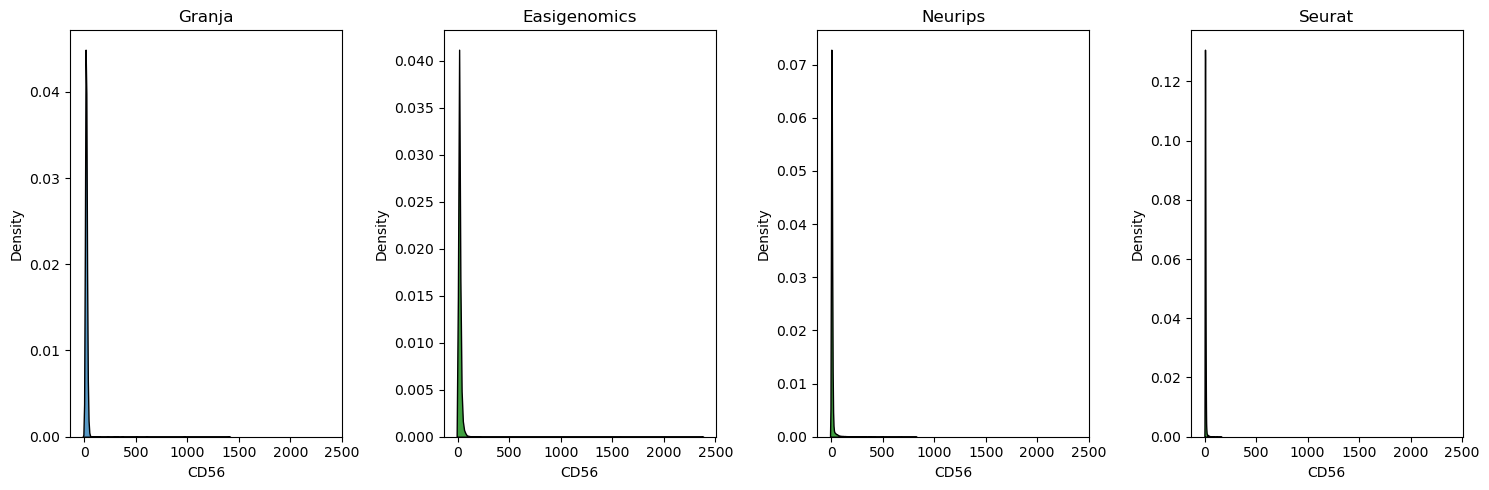

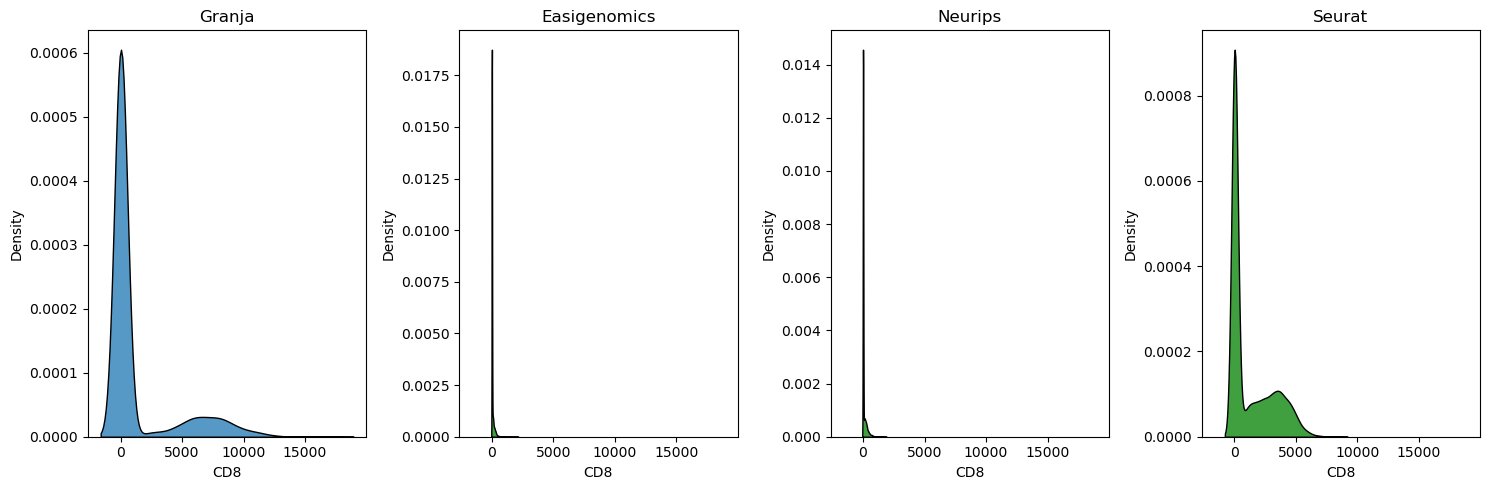

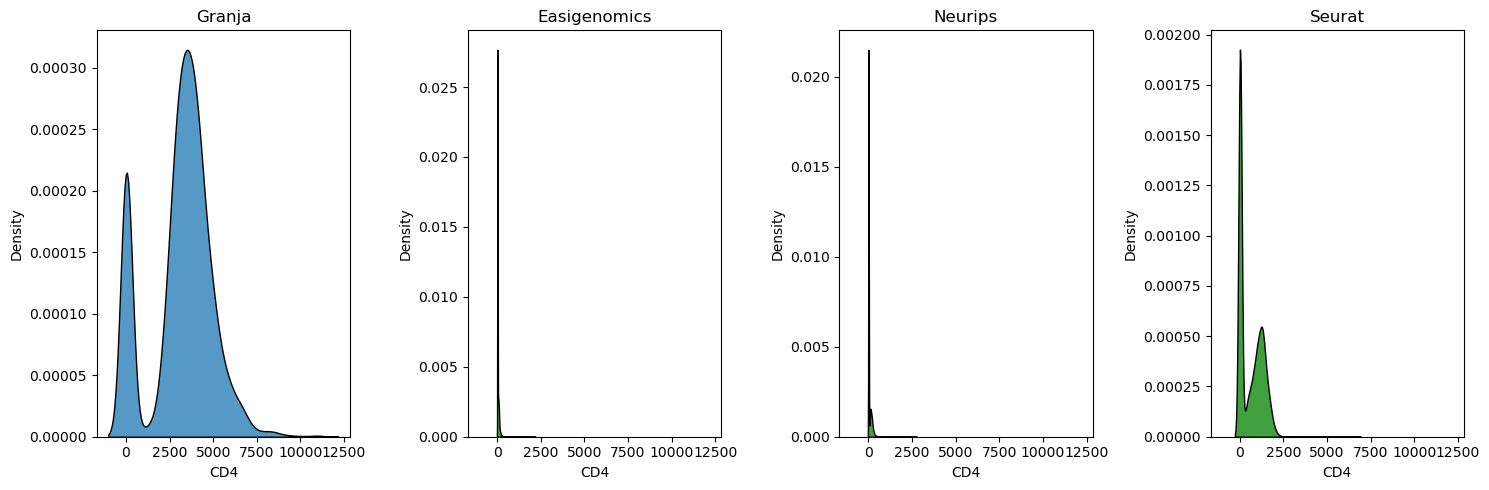

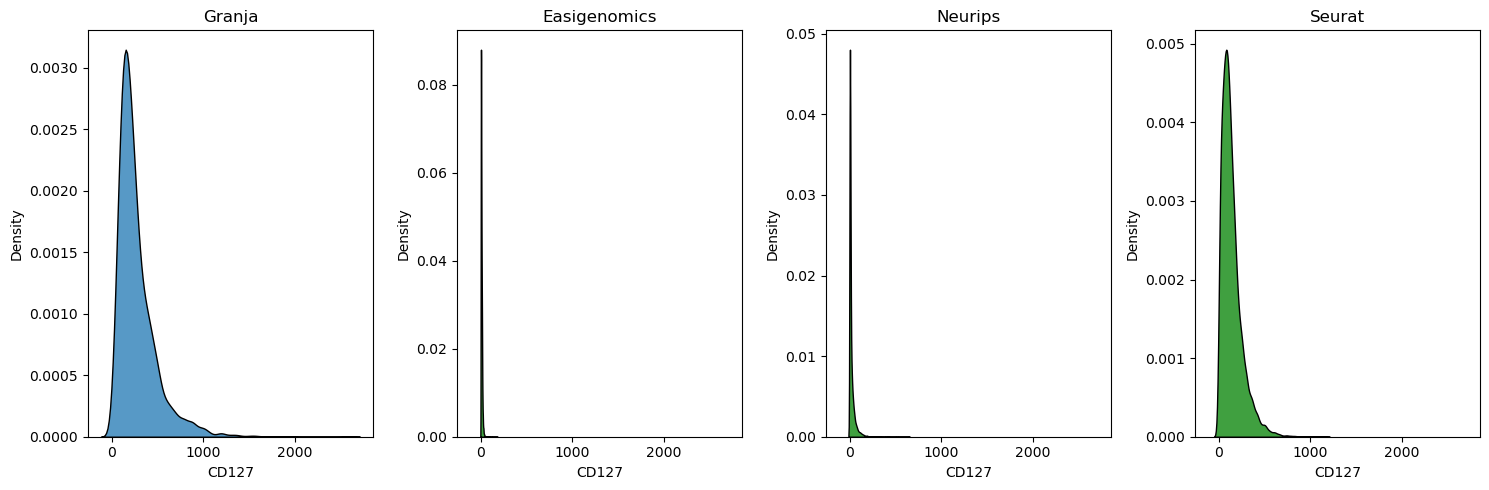

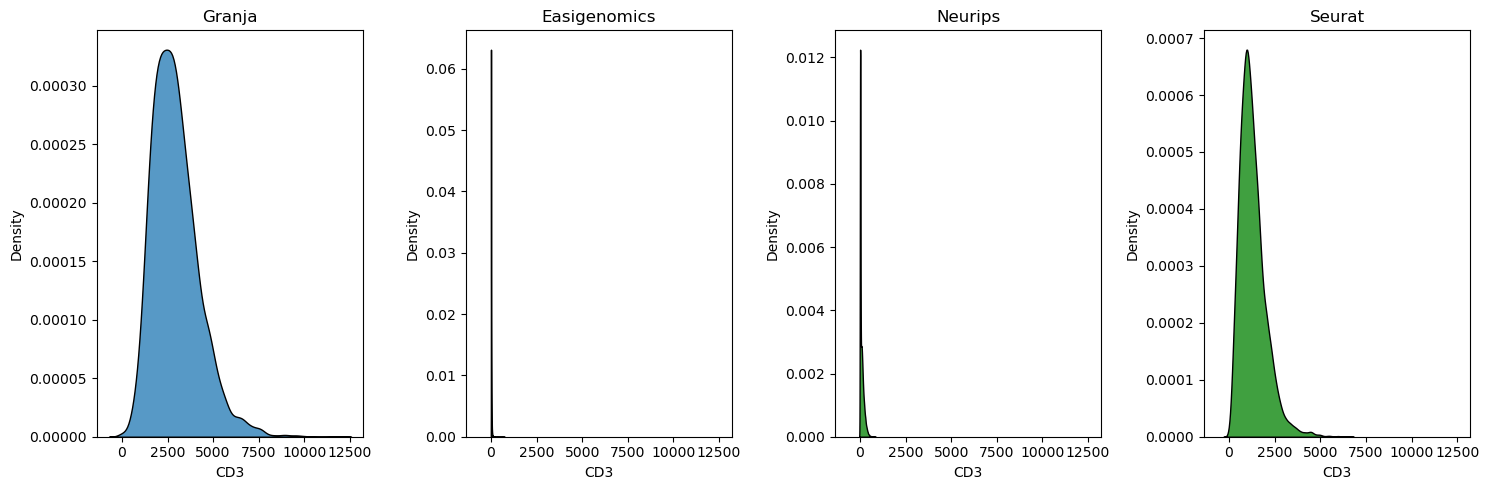

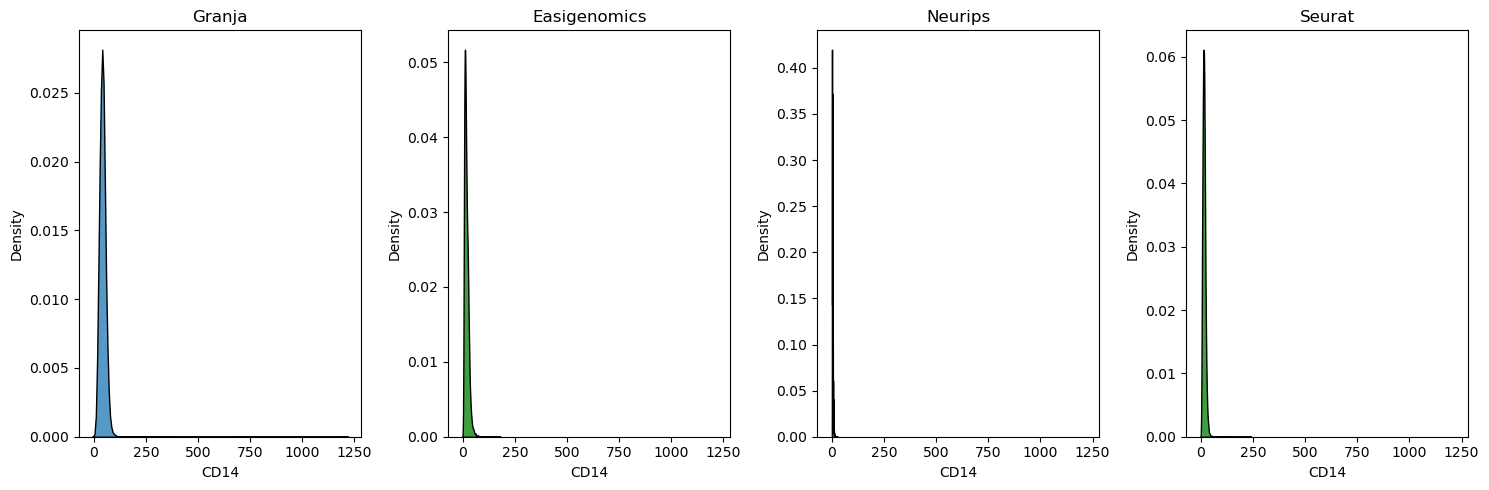

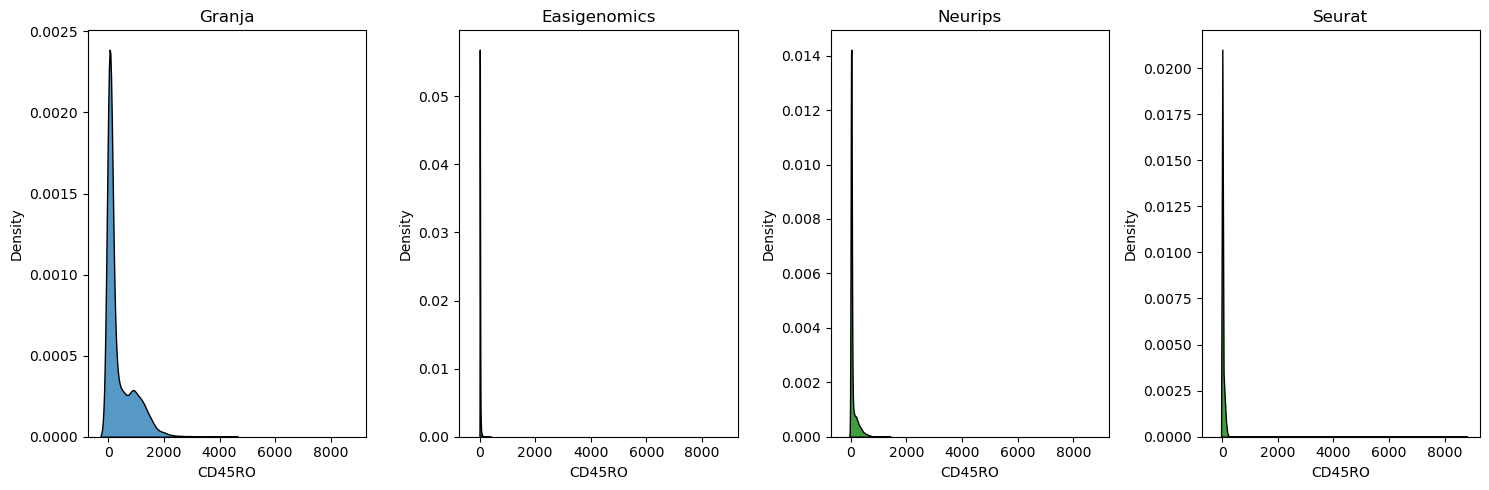

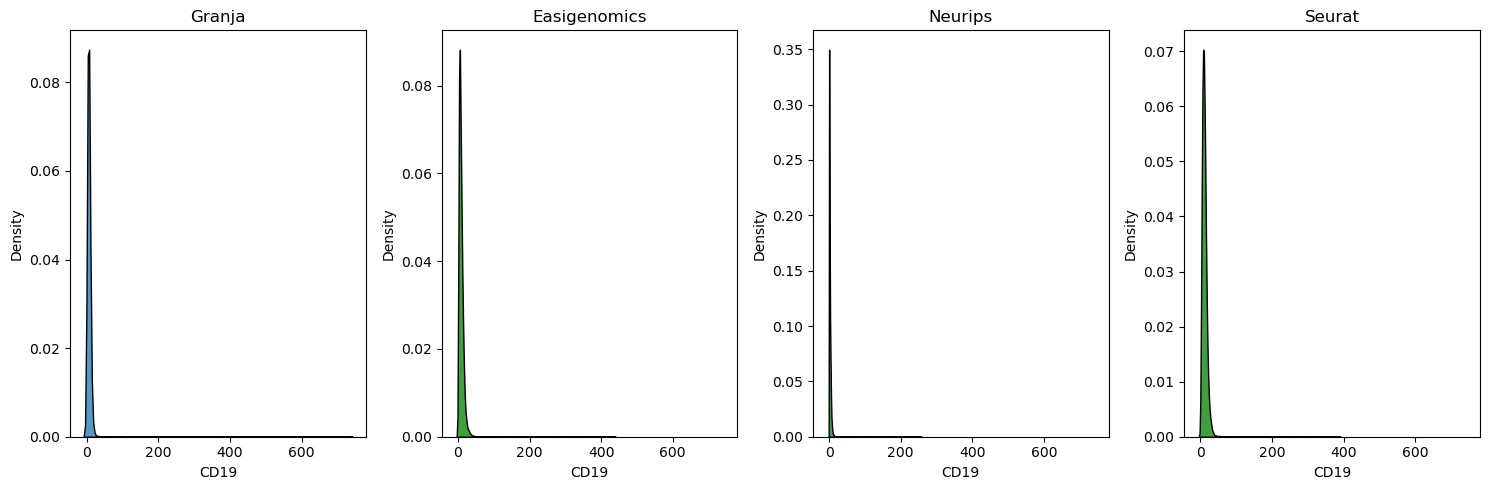

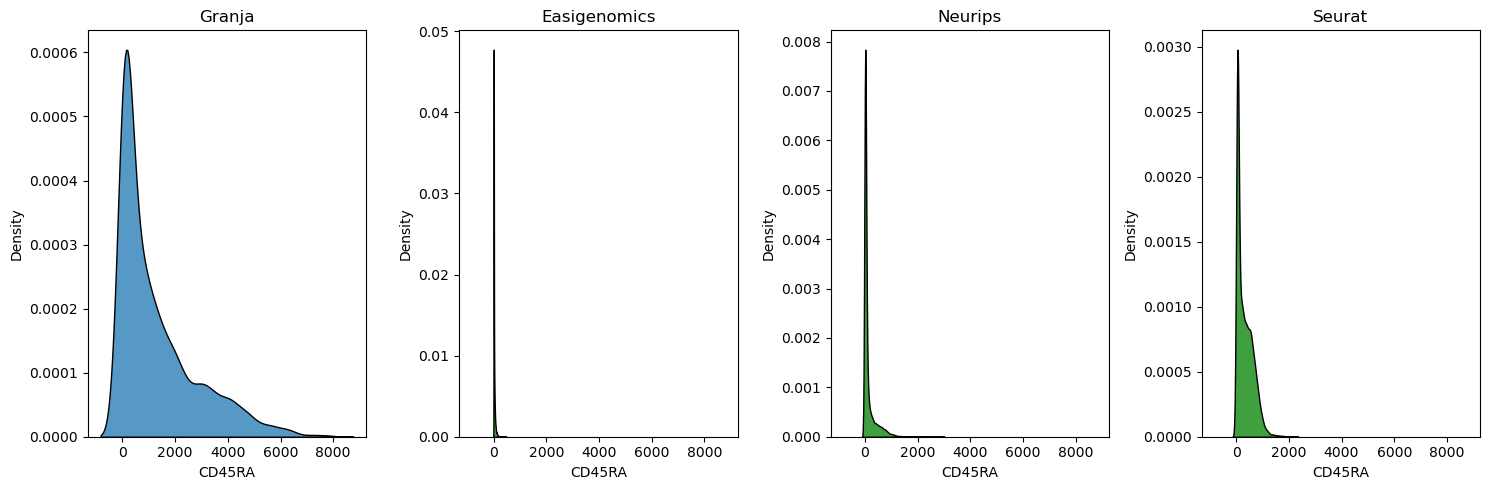

In [201]:
#All markers that are common between datasets, shared x-axis
markers = markers_all

for column_name in markers:
    fig, ax =plt.subplots(1,4 ,tight_layout=True, figsize=(15, 5), sharex=True)
    fig.show()

    ax1 = sns.kdeplot(data=granja_tcell_prot, x=column_name, multiple="stack", ax=ax[0]) ;
    ax2 = sns.kdeplot(data=easi_nkt_prot, x=column_name, multiple="stack", color="g", ax=ax[1]) ;
    ax3 = sns.kdeplot(data=neurips_tcell_prot, x=column_name, multiple="stack", color="g", ax=ax[2]) ;
    ax4 = sns.kdeplot(data=seurat_tcell_prot, x=column_name, multiple="stack", color="g", ax=ax[3]) ;

    ax1.title.set_text('Granja')    
    ax2.title.set_text('Easigenomics')
    ax3.title.set_text('Neurips')
    ax4.title.set_text('Seurat')
    
    plt.show()

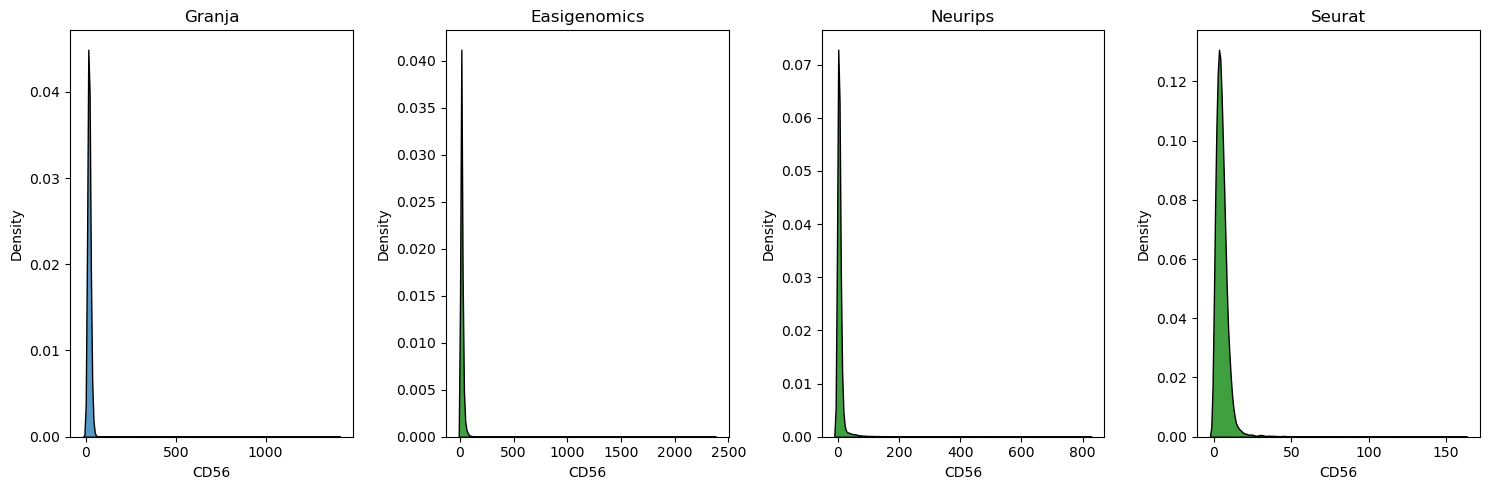

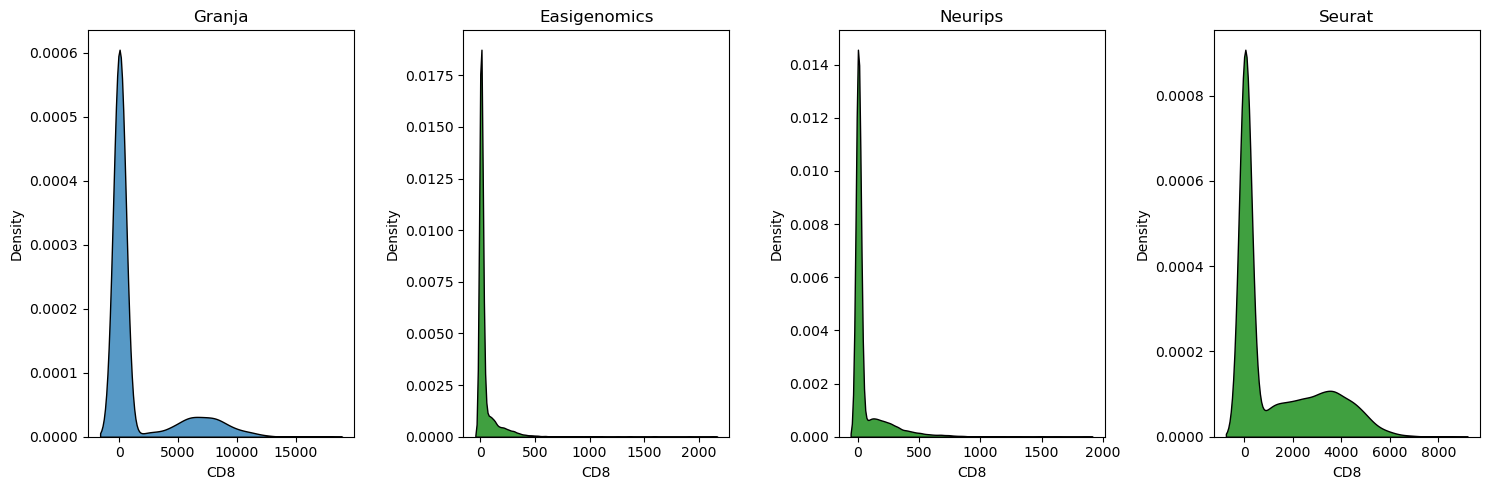

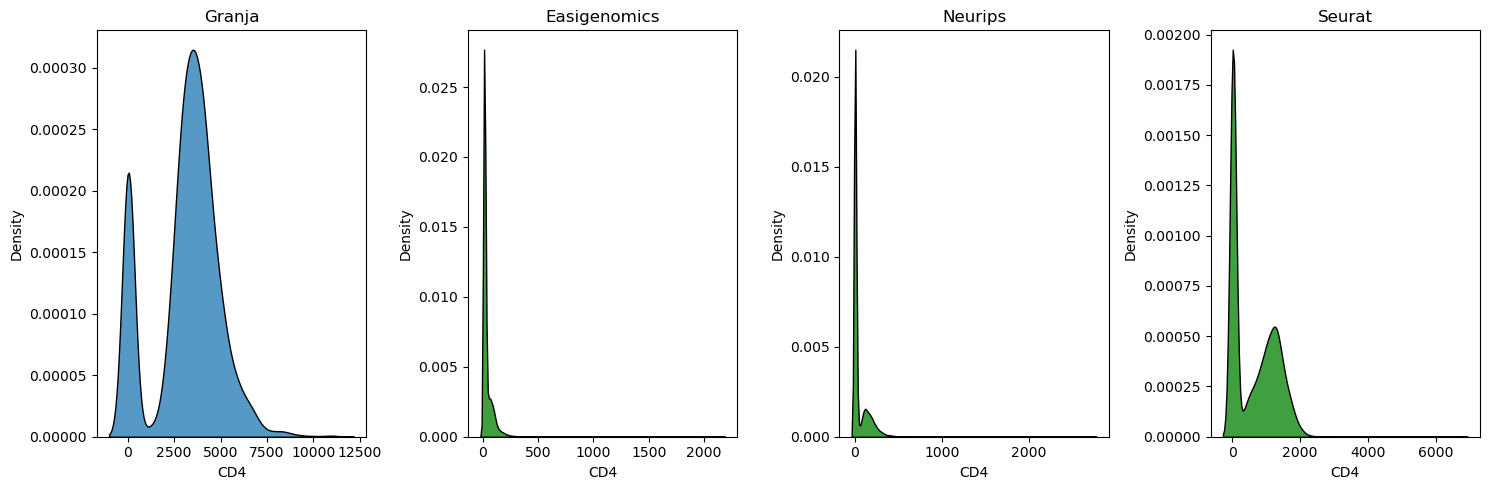

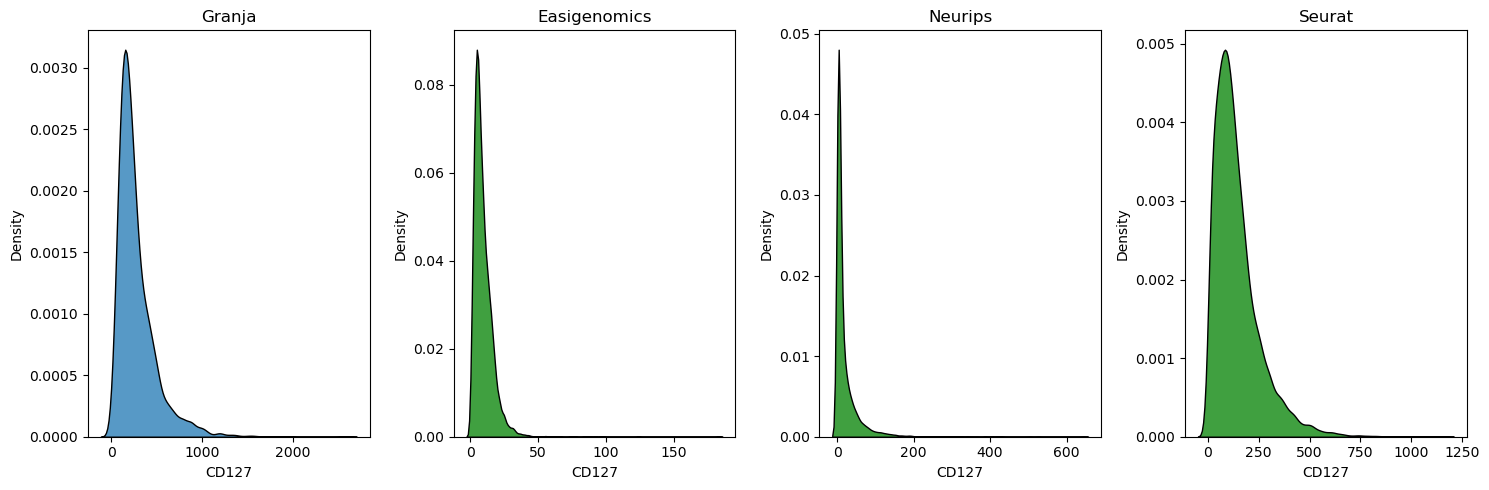

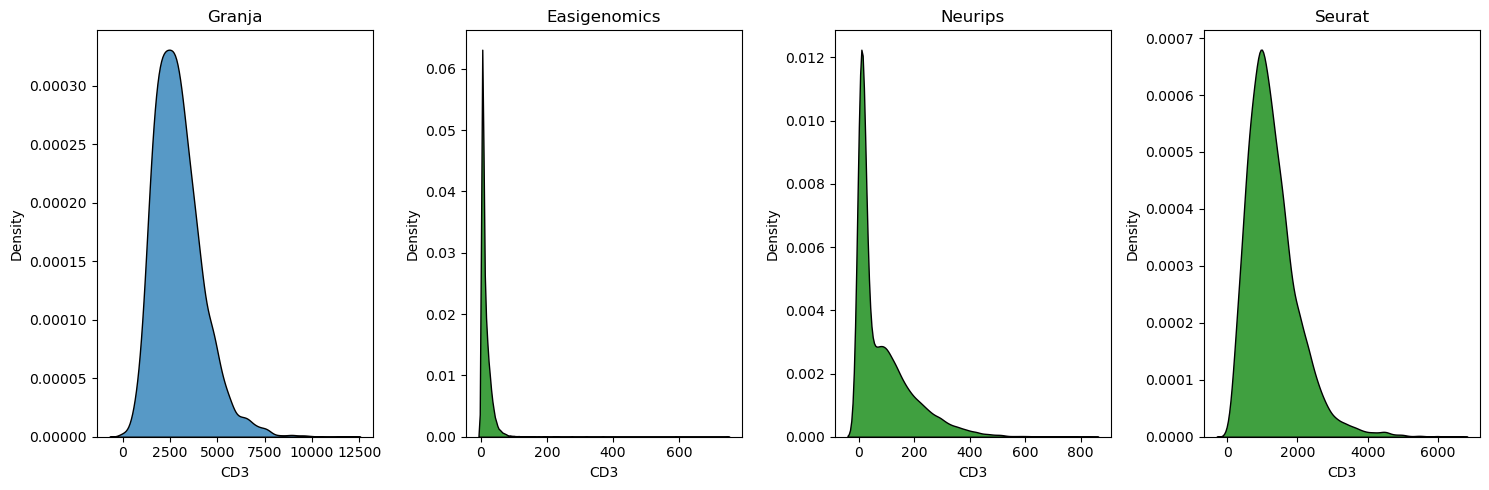

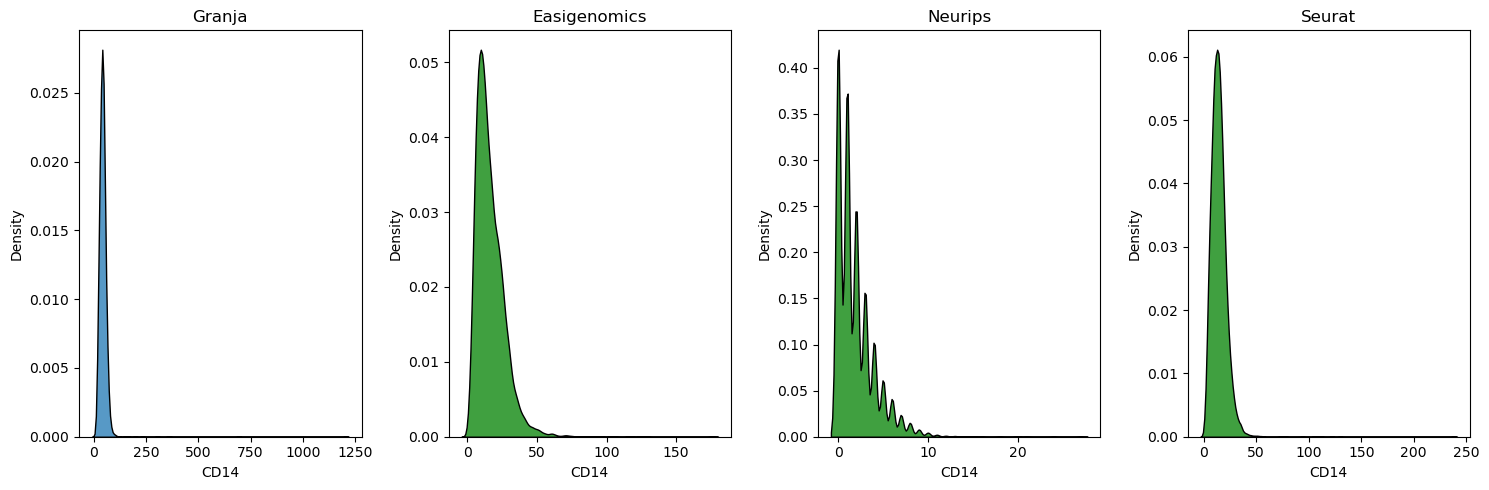

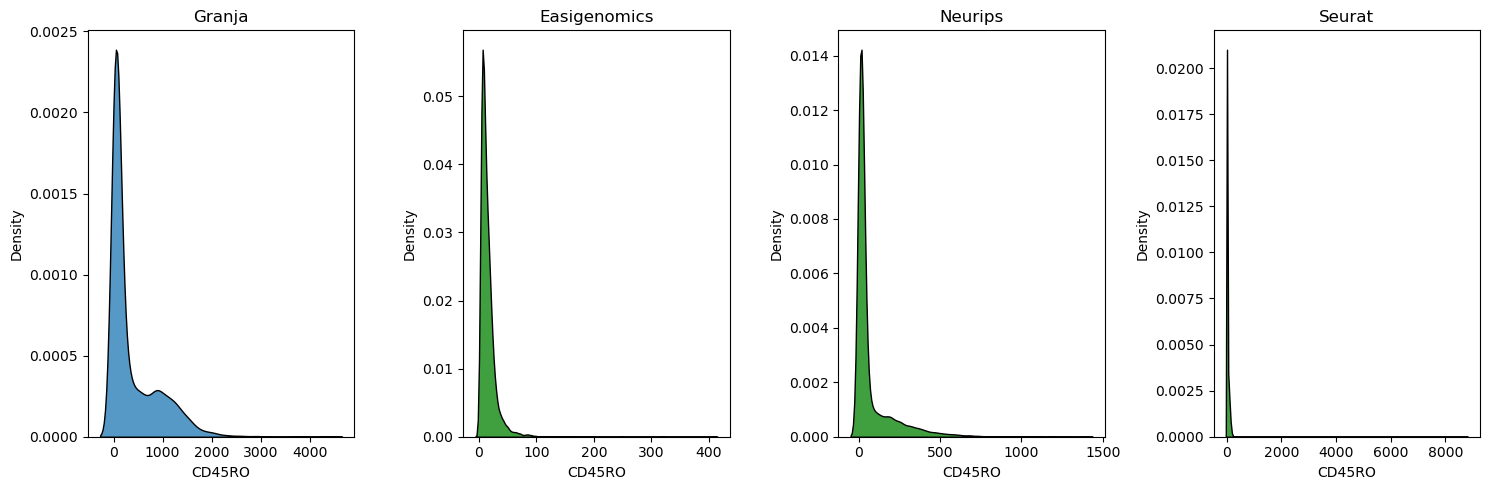

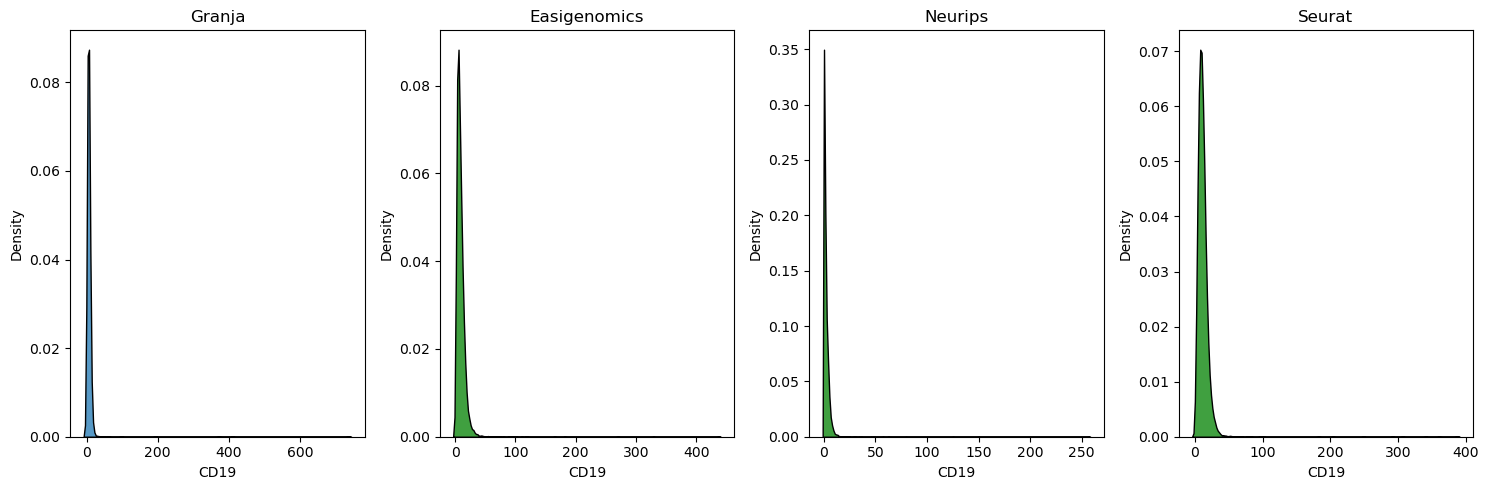

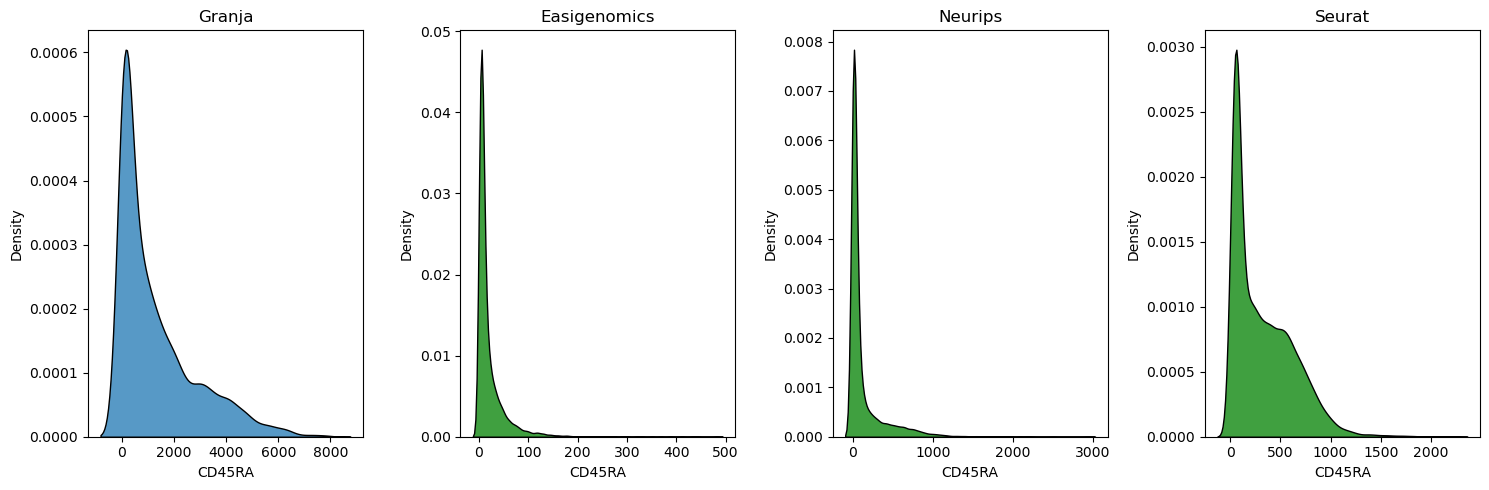

In [202]:
#All markers that are common between datasets, not shared x-axis
markers = markers_all

for column_name in markers:
    fig, ax =plt.subplots(1,4 ,tight_layout=True, figsize=(15, 5))
    fig.show()

    ax1 = sns.kdeplot(data=granja_tcell_prot, x=column_name, multiple="stack", ax=ax[0]) ;
    ax2 = sns.kdeplot(data=easi_nkt_prot, x=column_name, multiple="stack", color="g", ax=ax[1]) ;
    ax3 = sns.kdeplot(data=neurips_tcell_prot, x=column_name, multiple="stack", color="g", ax=ax[2]) ;
    ax4 = sns.kdeplot(data=seurat_tcell_prot, x=column_name, multiple="stack", color="g", ax=ax[3]) ;

    ax1.title.set_text('Granja')    
    ax2.title.set_text('Easigenomics')
    ax3.title.set_text('Neurips')
    ax4.title.set_text('Seurat')
    
    plt.show()

In [232]:
x=granja_tcell_prot[markers_all]
x["dataset"]="Granja"

y=easi_nkt_prot[markers_all]
y["dataset"]="Easigenomics"

z=neurips_tcell_prot[markers_all]
z["dataset"]="Neurips"

å=seurat_tcell_prot[markers_all]
å["dataset"]="Seurat"

df_tcells=pd.concat([x,y,z,å])

df_tcells

CD56   CD8   CD4  CD127   CD3  CD14  CD45RO  \
BMMC_D1T1:AAACCCAAGATGCAGC-1    12    45  4987    582  3056    38    1013   
BMMC_D1T1:AAACGAACAGCAGTCC-1    13    30  5330    485  1976    44     706   
BMMC_D1T1:AAACGAACATGACGAG-1    20  7929    29    152  2454    32      36   
BMMC_D1T1:AAACGAATCAAGCCAT-1    15    35  3494    591  3800    44     674   
BMMC_D1T1:AAACGCTAGCCGTAAG-1    10    25  3416    116  2104    34      72   
...                            ...   ...   ...    ...   ...   ...     ...   
b_TTTGTCATCATAGCAC-1             3    17  1225    155  1527     9      77   
b_TTTGTCATCCGAGCCA-1             7    17  1462    327  1437    25      46   
b_TTTGTCATCCGTAGGC-1             3    23   842     77  2122    12       6   
b_TTTGTCATCGCCGTGA-1             4    47  1079    140  1720    13      27   
b_TTTGTCATCGTTTGCC-1             0  1215   191     72   598     9       5   

                              CD19  CD45RA dataset  
BMMC_D1T1:AAACCCAAGATGCAGC-1     8      64  Granja  
BMMC_D1T1:AAACGAACAGCAGTCC-1     5      86  Granja  
BMMC_D1T1:AAACGAACATGACGAG-1     0    3522  Granja  
BMMC_D1T1:AAACGAATCAAGCCAT-1     2      71  Granja  
BMMC_D1T1:AAACGCTAGCCGTAAG-1     3     672  Granja  
...                            ...     ...     ...  
b_TTTGTCATCATAGCAC-1            15      49  Seurat  
b_TTTGTCATCCGAGCCA-1            17      51  Seurat  
b_TTTGTCATCCGTAGGC-1            12     473  Seurat  
b_TTTGTCATCGCCGTGA-1            27     358  Seurat  
b_TTTGTCATCGTTTGCC-1             7     285  Seurat  

[65065 rows x 10 columns]

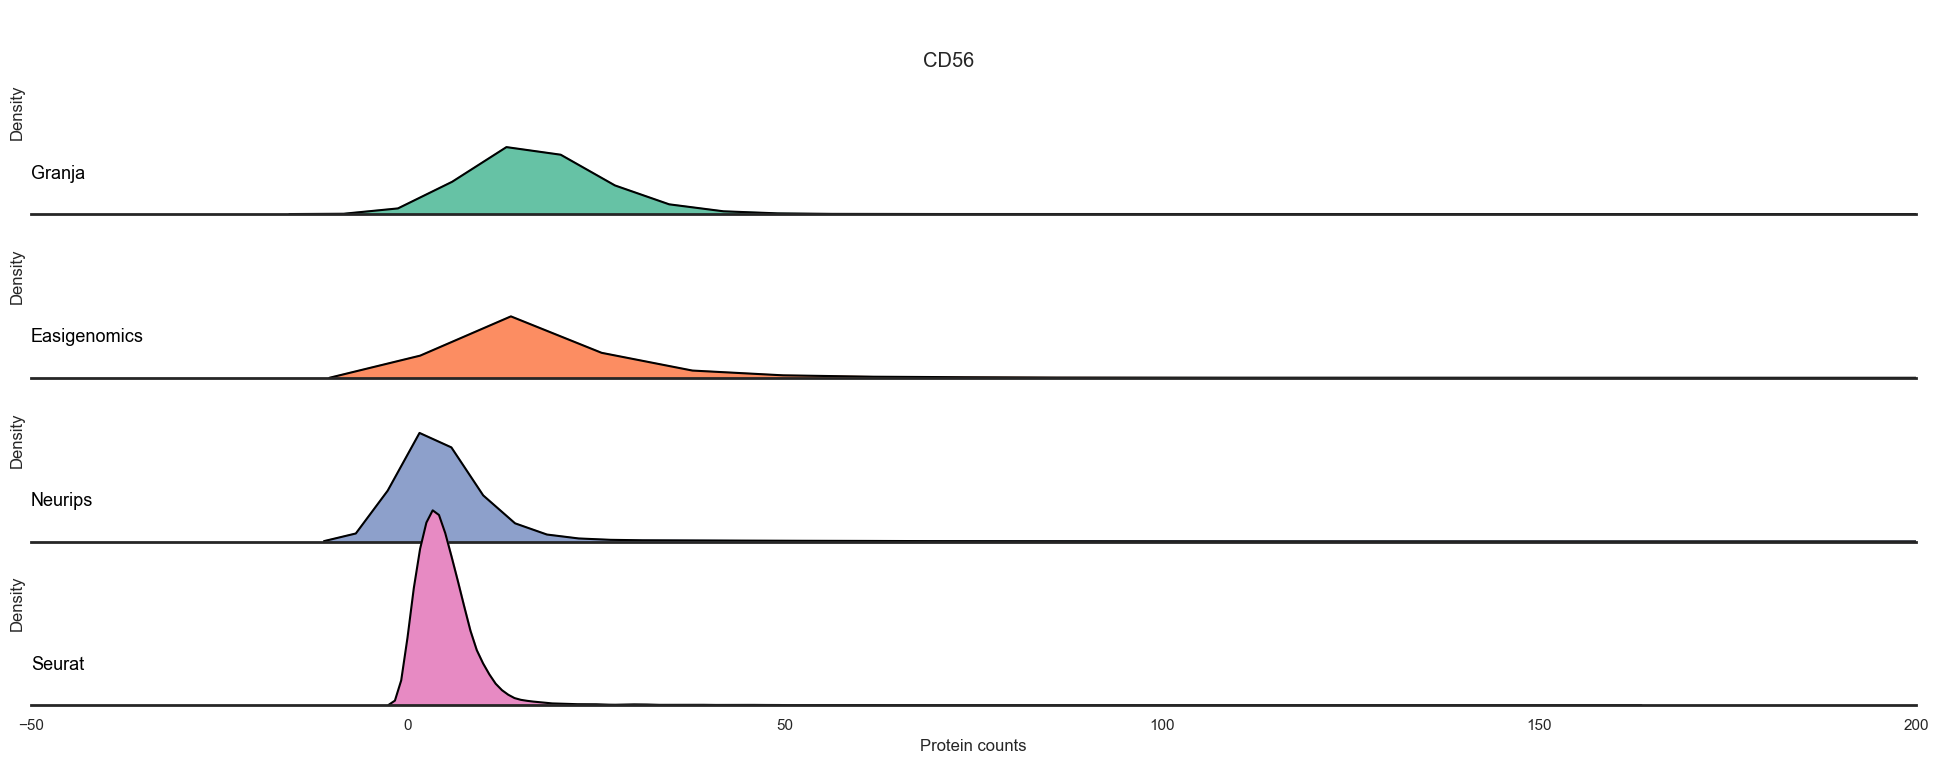

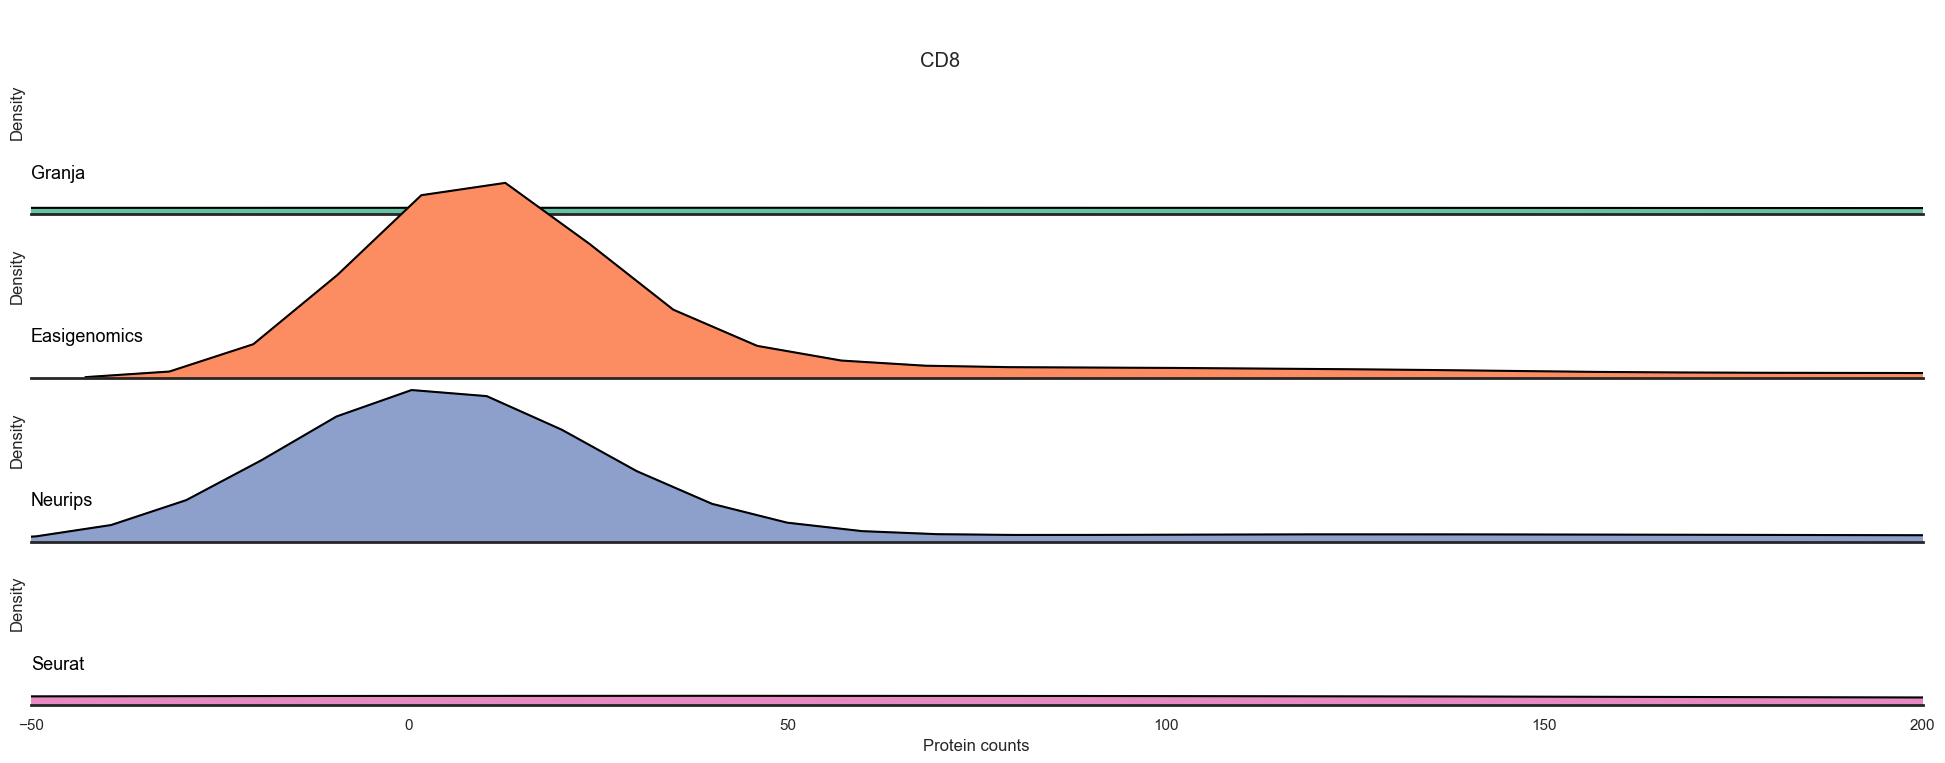

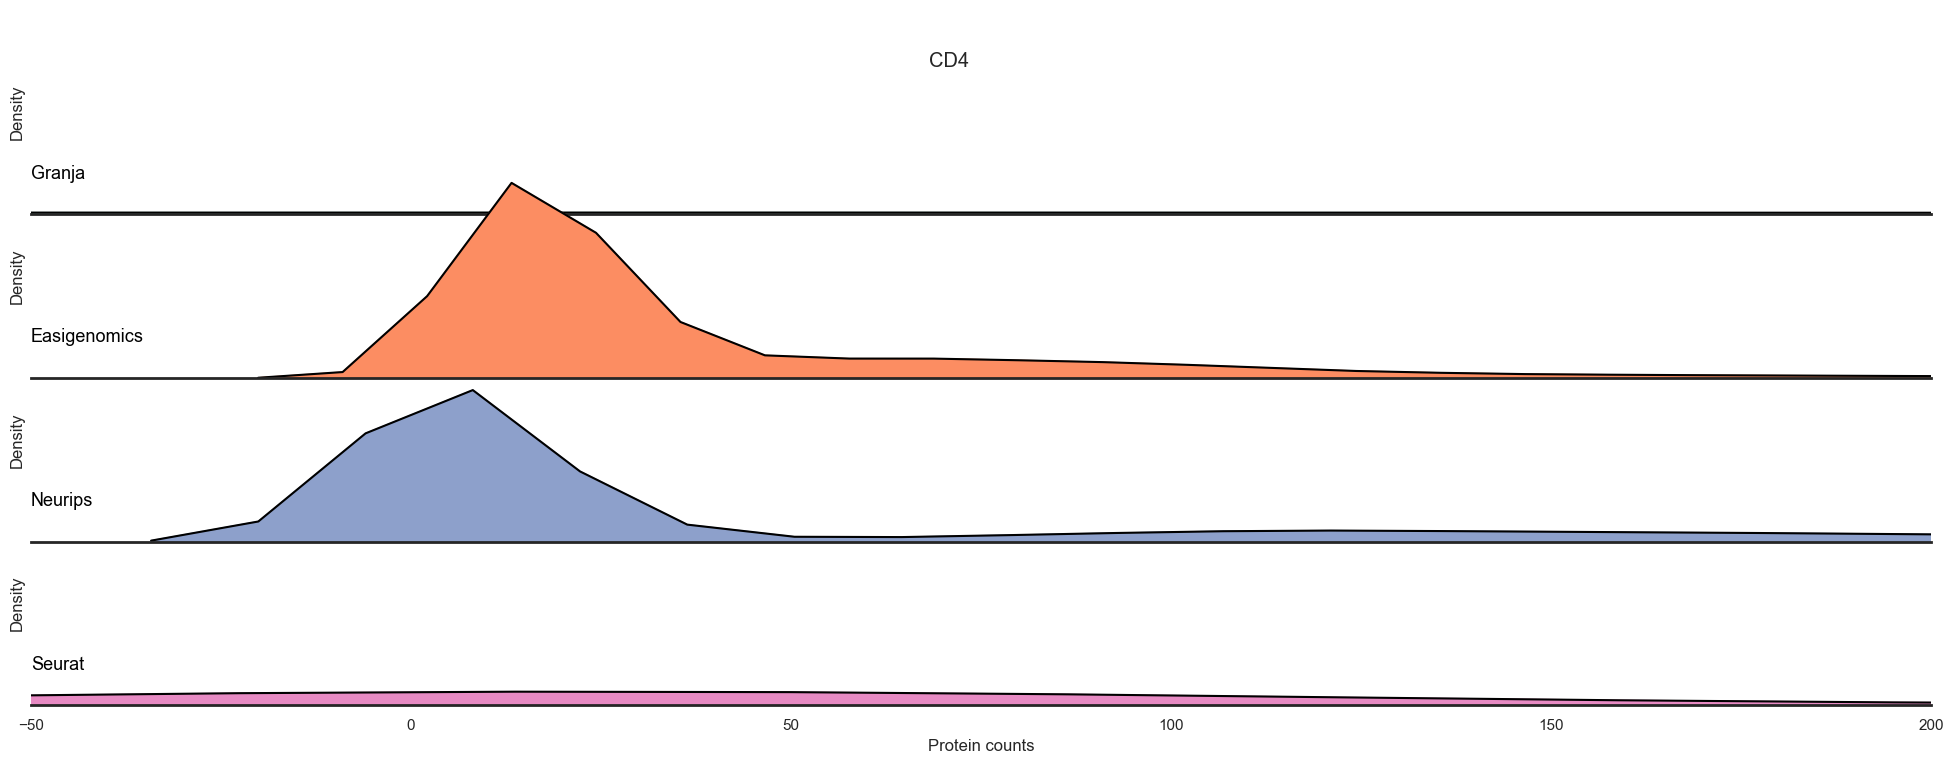

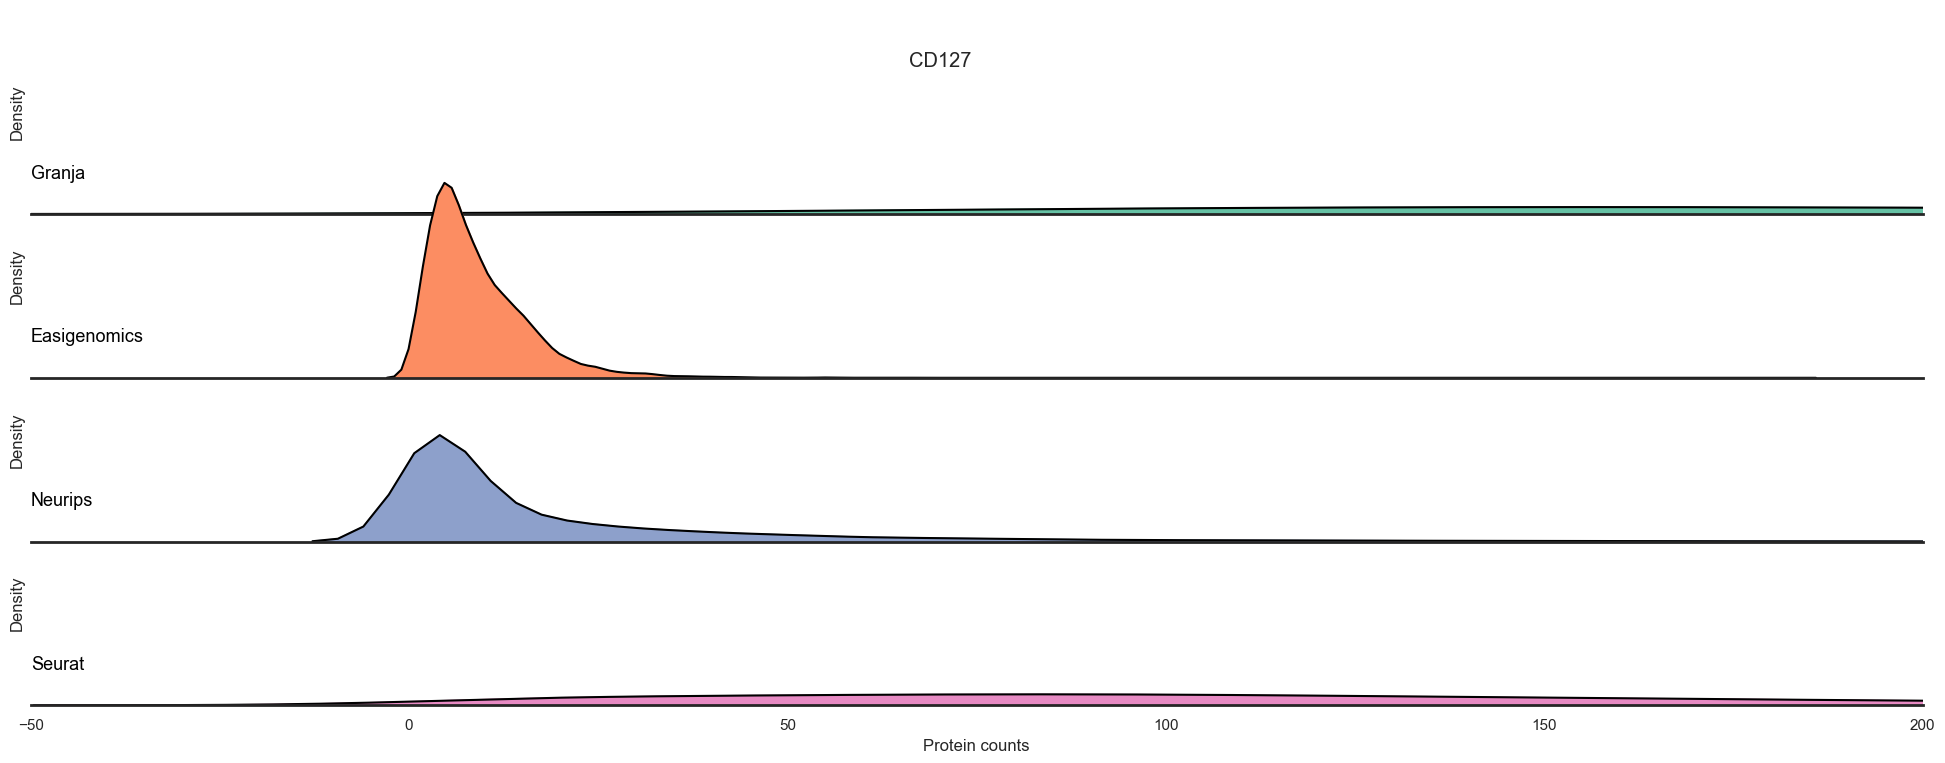

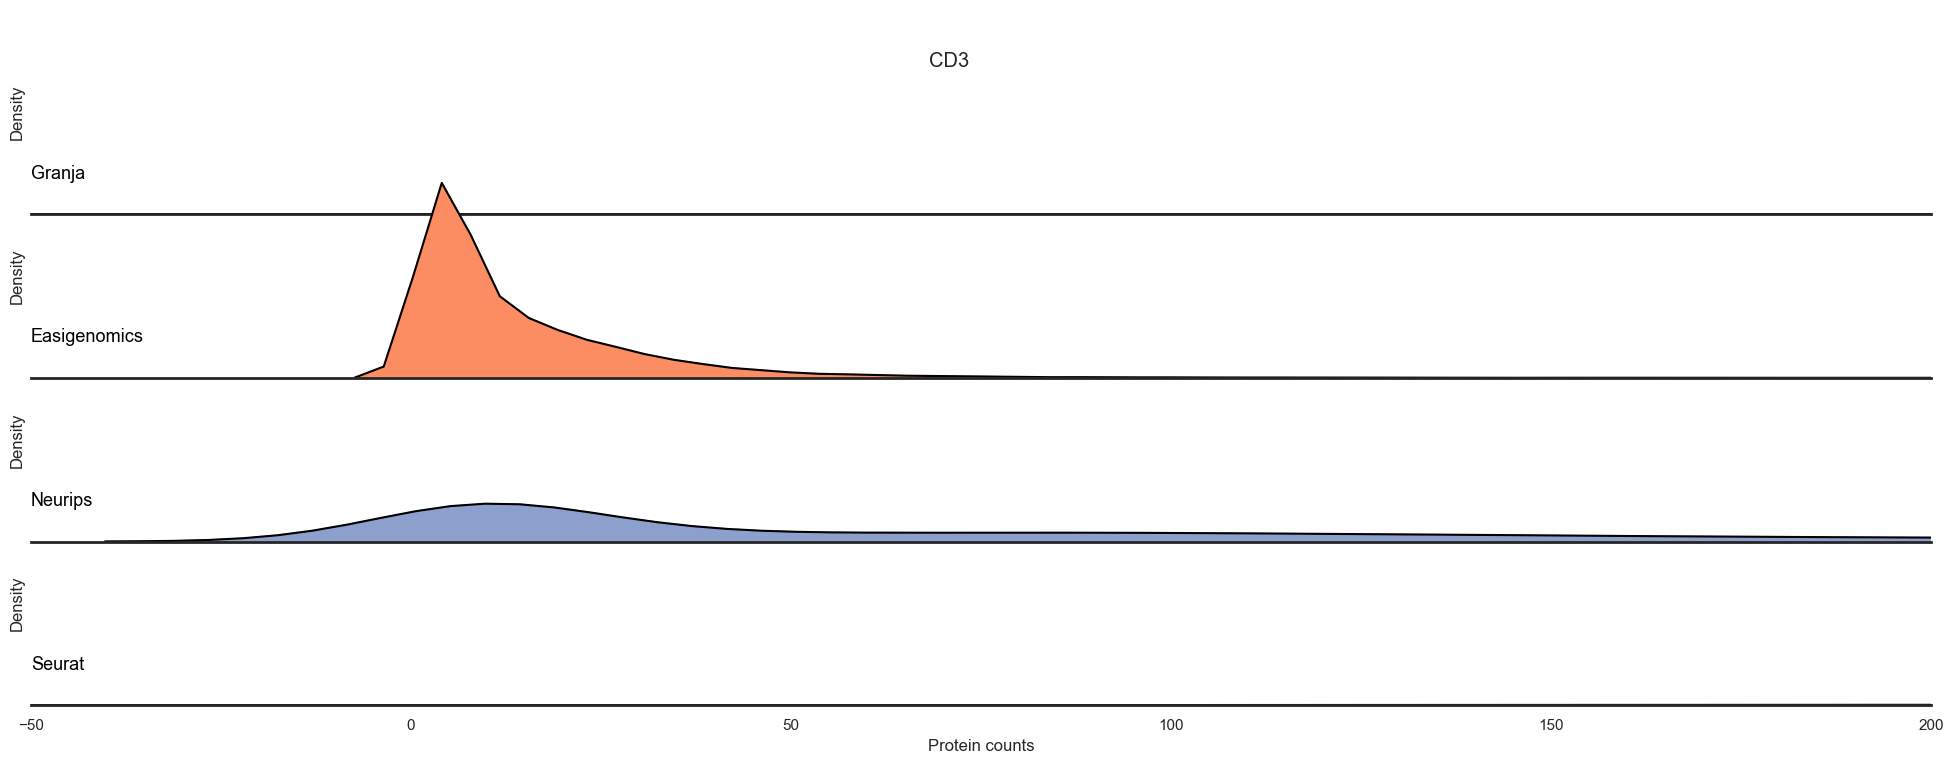

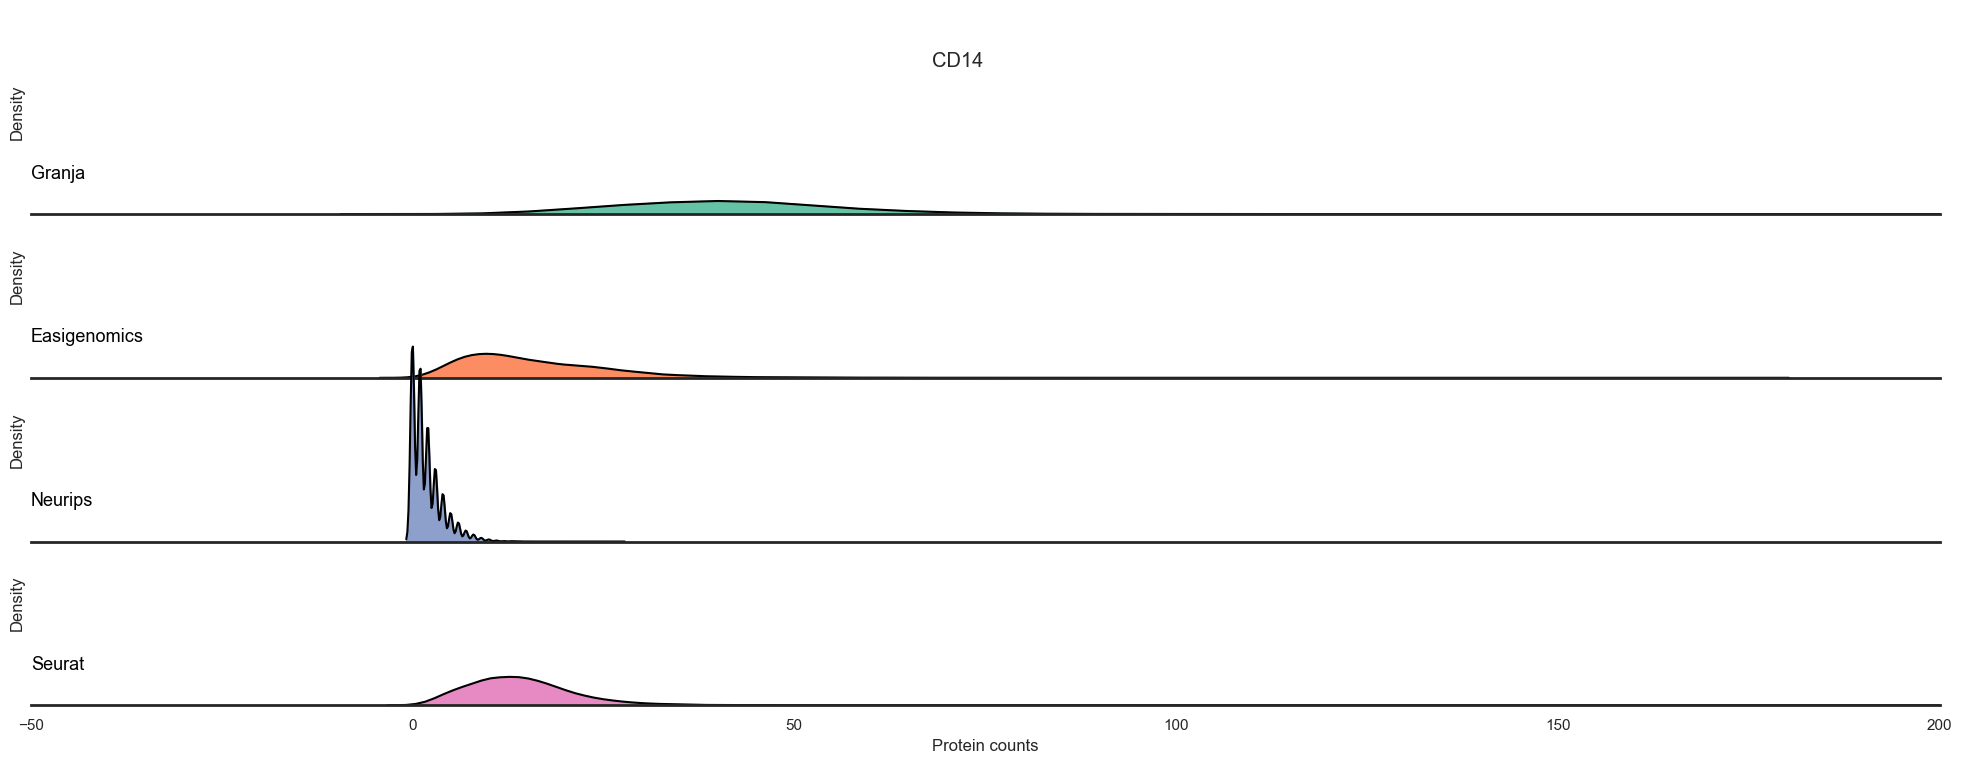

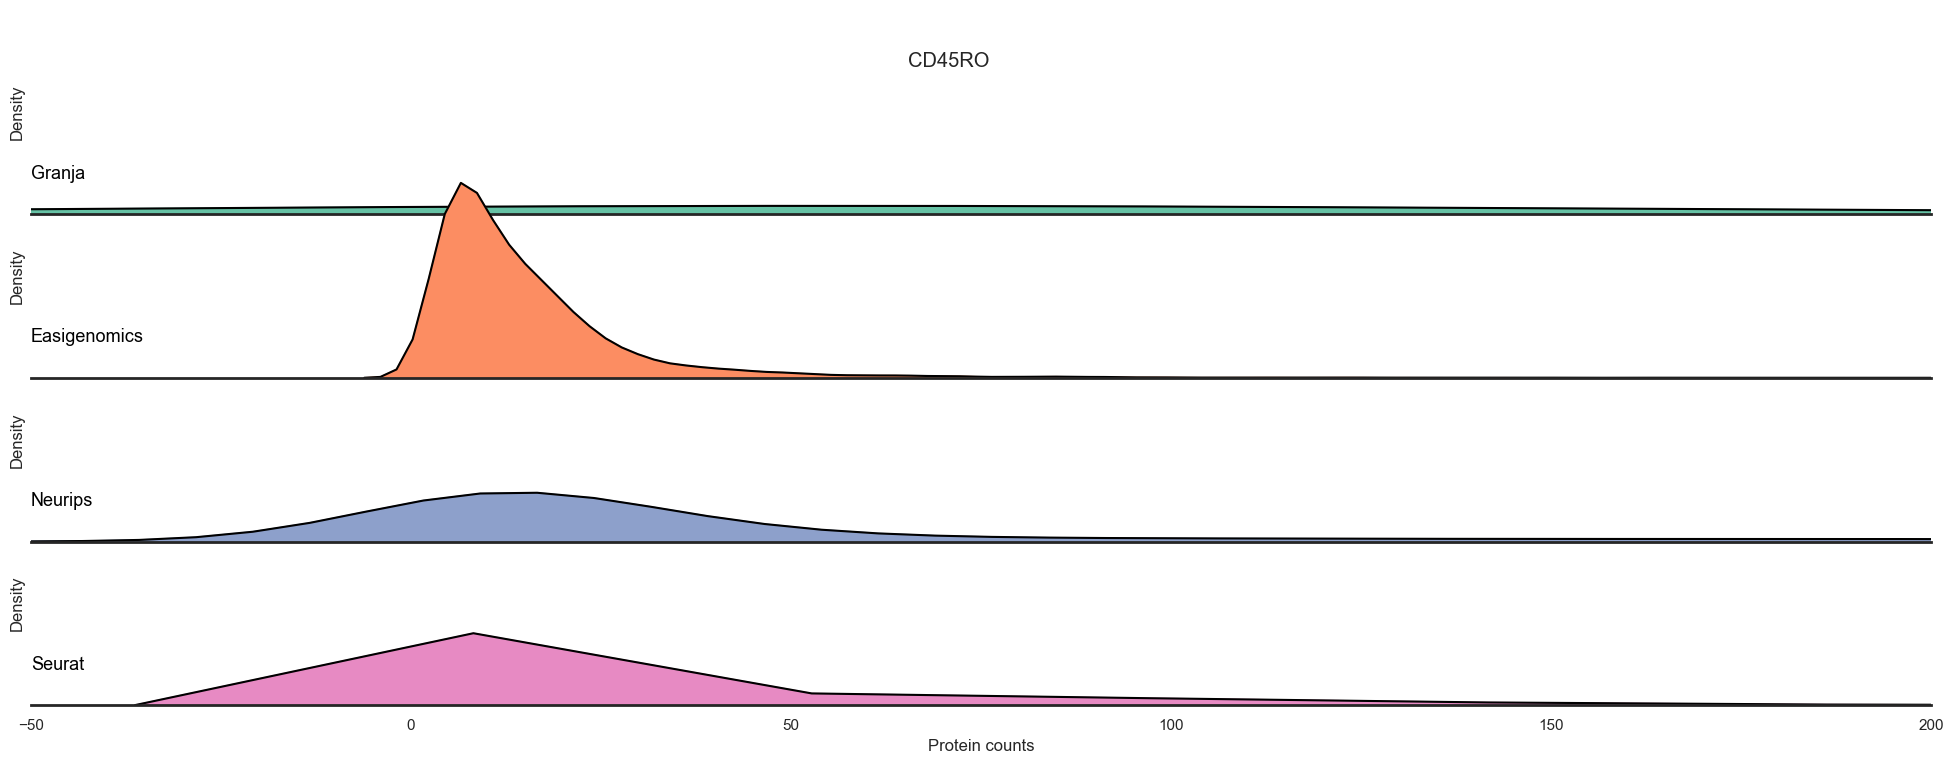

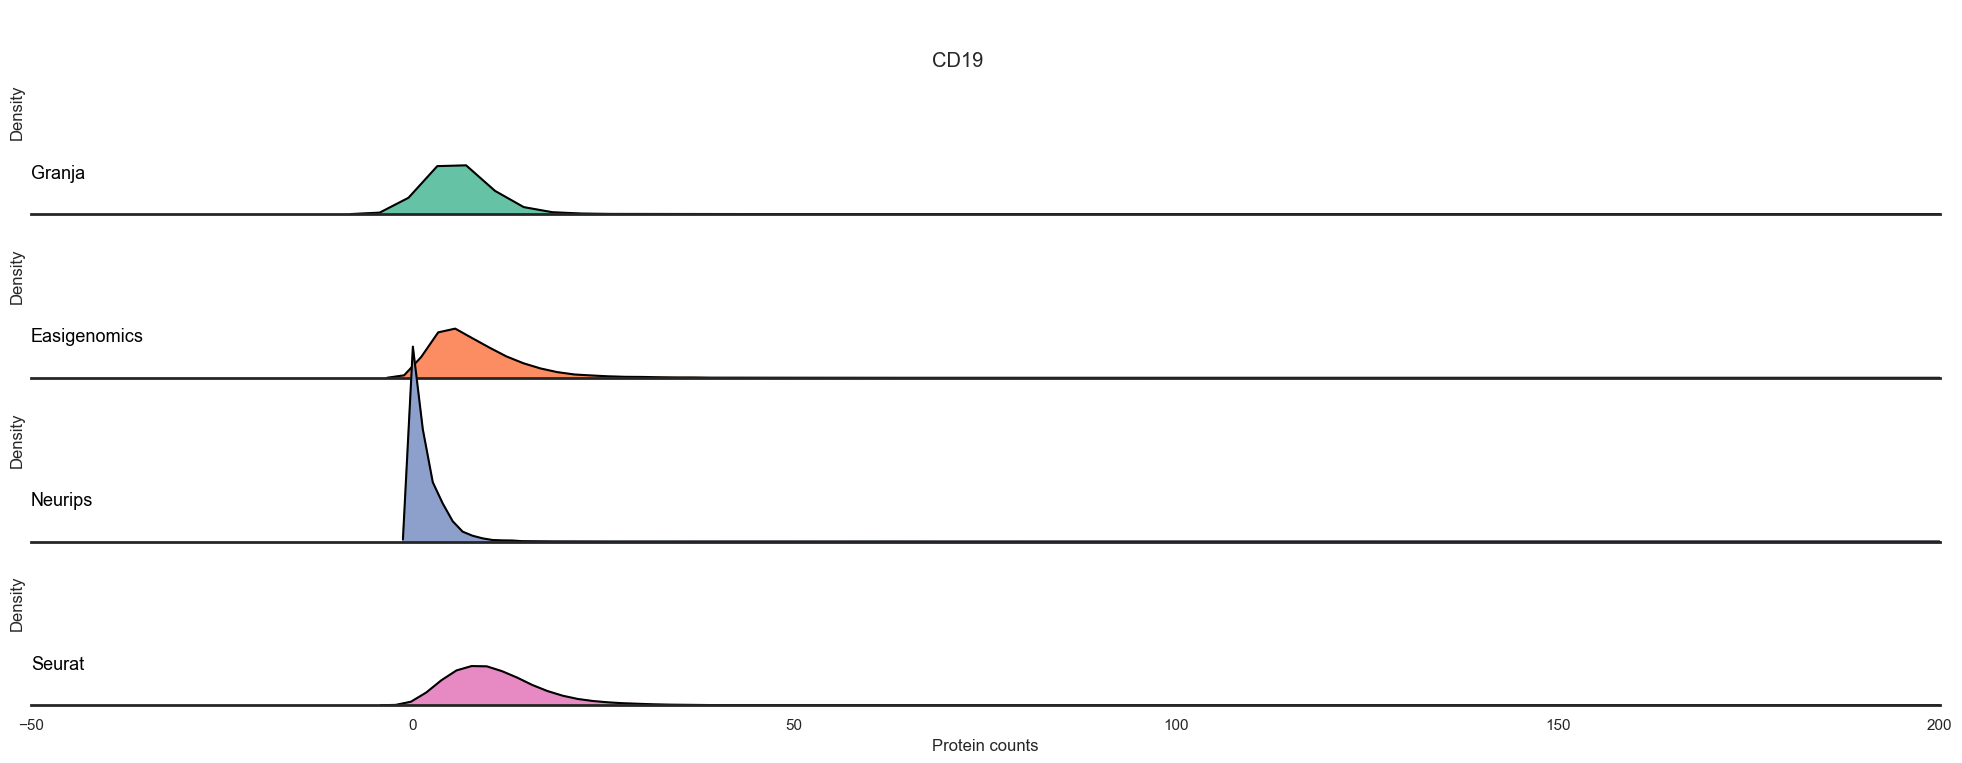

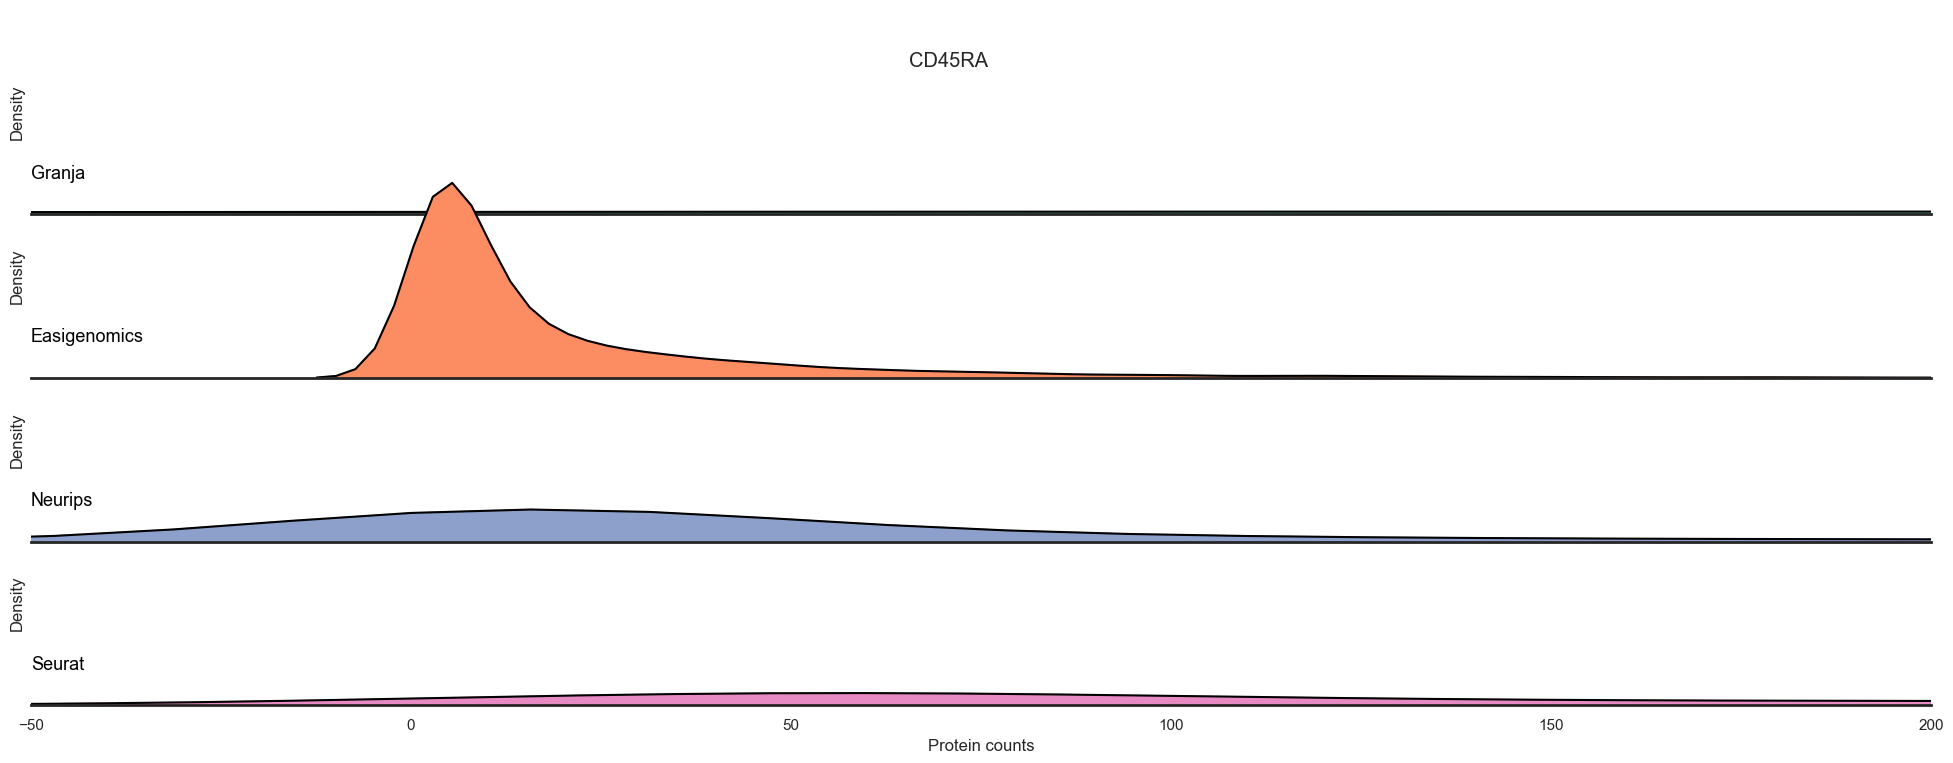

In [243]:
for marker in markers_all:
    g = sns.FacetGrid(df_tcells, palette=palette, row="dataset", hue="dataset", aspect=10, height=2)

    g.map_dataframe(sns.kdeplot, x=marker, fill=True, alpha=1)
    g.map_dataframe(sns.kdeplot, x=marker, color="black")

    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
    
    g.map(label, "dataset")
    g.fig.subplots_adjust(hspace=-.2)
    g.set_titles("")
    g.set(yticks=[], xlabel="Protein counts")
    g.despine( left=True)

    plt.suptitle(marker, y=0.9)
    
    g.set(xlim=(-50, 200))